In [1]:
import numpy as np
import scipy.special as spe
import pickle
from pathlib import Path
from matplotlib import cm

from robust_motifs.data import load_sparse_matrix_from_pkl
from robust_motifs.plot import (compare_graphs, compare_graphs_normalized, compare_graphs_percent, 
                                plot_biedge_cumulative, plot_simplex_counts, plot_biedge_counts, 
                                compare_graphs_diff, compare_graphs_diff_normalized, compare_graphs_diff_percent)

import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def draw_all_graphs(dictionary, n_instances):
    for elem in dictionary.values():
        fig = plt.figure()
        ax = fig.add_subplot()
        sns.heatmap(np.tril(elem)/ n_instances,ax = ax, annot = True, cmap = 'Reds')

In [4]:
a = pickle.load(open(Path("data/bcounts/column/seed_0/bcounts.pkl"),'rb'))
b = pickle.load(open(Path("data/worm/full/bcounts.pkl"),'rb'))
c = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/bcounts.pkl"),'rb'))

In [5]:
amax = pickle.load(open(Path("data/bcounts/column/seed_0/mbcounts.pkl"),'rb'))
bmax = pickle.load(open(Path("data/worm/full/mbcounts.pkl"),'rb'))
cmax = pickle.load(open(Path("data/bcounts/bshuffled/seed_0/mbcounts.pkl"),'rb'))
amax[6] = a[6]
bmax[7] = b[7]
cmax[6] = c[6]

In [6]:
def get_position(row, col, dictionary_list, normalized = False):
    if normalized:
        return [m[row][col]/m[0][1] for m in dictionary_list.values()]
    else:
        return [m[row][col] for m in a.values()]

In [7]:
def extract_normalized_edges_pos(dictionary):
    edges_01 = [m[1][0]/m[0][1] for m in dictionary.values()]
    edges_last = [m[-1][-2]/m[0][1] for m in dictionary.values()]
    edges_0n = [m[-1][0]/m[0][1] for m in dictionary.values()]
    return edges_01, edges_last, edges_0n

def extract_percent_edges_pos(dictionary):
    edges_01 = [m[1][0]/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_last = [m[-1][-2]/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_0n = [m[-1][0]/np.sum(np.tril(m)) for m in dictionary.values()]
    return edges_01, edges_last, edges_0n

def extract_edges_pos(dictionary):
    edges_01 = [m[1][0] for m in dictionary.values()]
    edges_last = [m[-1][-2] for m in dictionary.values()]
    edges_0n = [m[-1][0] for m in dictionary.values()]
    return edges_01, edges_last, edges_0n

def cumul_edges_pos(dictionary):
    edges_spine = [np.sum(np.diag(m,-1))/m[0][1] for m in dictionary.values()]
    edges_other = [np.sum(np.tril(m,-2))/m[0][1] for m in dictionary.values()]
    edges_ratio = [np.sum(np.diag(m,-1))/np.sum(np.tril(m,-2)) for m in dictionary.values()]
    return edges_spine, edges_other, edges_ratio

def group_edges_pos(dictionary):
    edges_g1 = [np.sum(np.diag(m,-2))/m[0][1] for m in dictionary.values()]
    edges_g2 = [(m[1][0] + m[-1][0] + m[-1][-2])/m[0][1] for m in dictionary.values()]
    edges_g3 = [np.sum(np.tril(m, -m.shape[0]+2))/m[0][1] for m in dictionary.values()]
    return edges_g1, edges_g2, edges_g3

def group_edges_pos_percent(dictionary):
    edges_g1 = [np.sum(np.diag(m,-2))/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_g2 = [(m[1][0] + m[-1][0] + m[-1][-2])/np.sum(np.tril(m)) for m in dictionary.values()]
    edges_g3 = [np.sum(np.tril(m, -m.shape[0]+2))/np.sum(np.tril(m)) for m in dictionary.values()]
    return edges_g1, edges_g2, edges_g3

In [8]:
def get_position_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_01, edges_last, edges_0n = extract_normalized_edges_pos(bcounts_dictionary)
            for i, elem in enumerate(edges_01):
                bcounts.append([elem, i+1, '01', name])
            for i, elem in enumerate(edges_last):
                bcounts.append([elem, i+1, 'nn-1', name])
            for i, elem in enumerate(edges_0n):
                bcounts.append([elem, i+1, '0n', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [9]:
def get_cumul_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_spine, edges_other, edges_ratio = cumul_edges_pos(bcounts_dictionary)
            for i, elem in enumerate(edges_spine):
                bcounts.append([elem, i+1, 'spine', name])
            for i, elem in enumerate(edges_other):
                bcounts.append([elem, i+1, 'other', name])
            for i, elem in enumerate(edges_ratio):
                bcounts.append([elem, i+1, 'ratio', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [10]:
def get_group_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_g1, edges_g2, edges_g3 = group_edges_pos(bcounts_dictionary)
            for i, elem in enumerate(edges_g1):
                bcounts.append([elem, i+1, 'Group 1', name])
            for i, elem in enumerate(edges_g2):
                bcounts.append([elem, i+1, 'Group 2', name])
            for i, elem in enumerate(edges_g3):
                bcounts.append([elem, i+1, 'Group 3', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

In [11]:
def get_percent_group_dataframe(folder_list, name):
    bcounts = []
    for group in folder_list:
        for file in group.glob("*/bcounts.pkl"):
            bcounts_dictionary = pickle.load(open(file, 'rb'))
            edges_g1, edges_g2, edges_g3 = group_edges_pos_percent(bcounts_dictionary)
            for i, elem in enumerate(edges_g1):
                bcounts.append([elem, i+1, 'Group 1', name])
            for i, elem in enumerate(edges_g2):
                bcounts.append([elem, i+1, 'Group 2', name])
            for i, elem in enumerate(edges_g3):
                bcounts.append([elem, i+1, 'Group 3', name])
    dataframe = pd.DataFrame(bcounts, columns = ['count', 'dim','position', 'group'])
    return dataframe

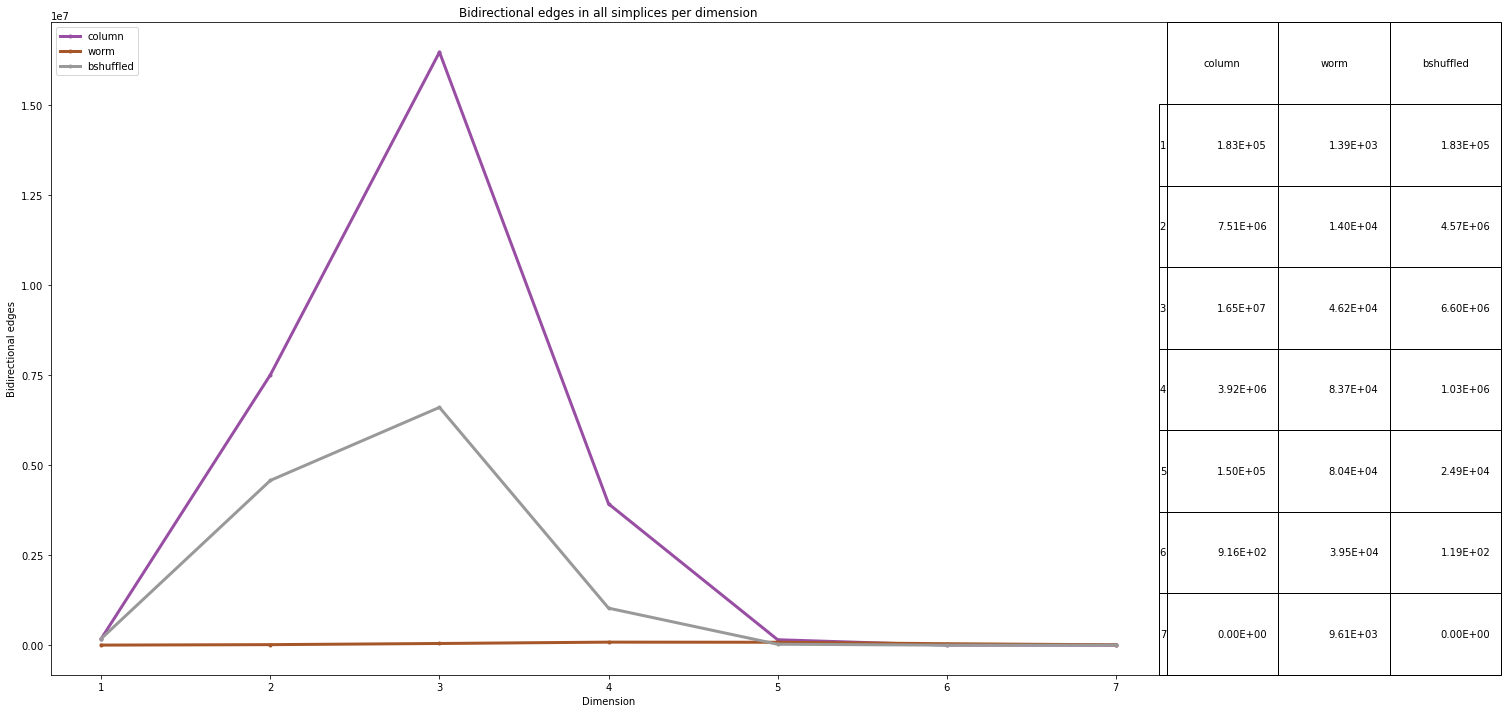

In [12]:
plot_biedge_counts([a,b,c], 6, 3, ["column", "worm", "bshuffled"], "worm_bcount",
                  figtitle = "Bidirectional edges in all simplices per dimension")

<ipython-input-13-8f612e1401a4>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


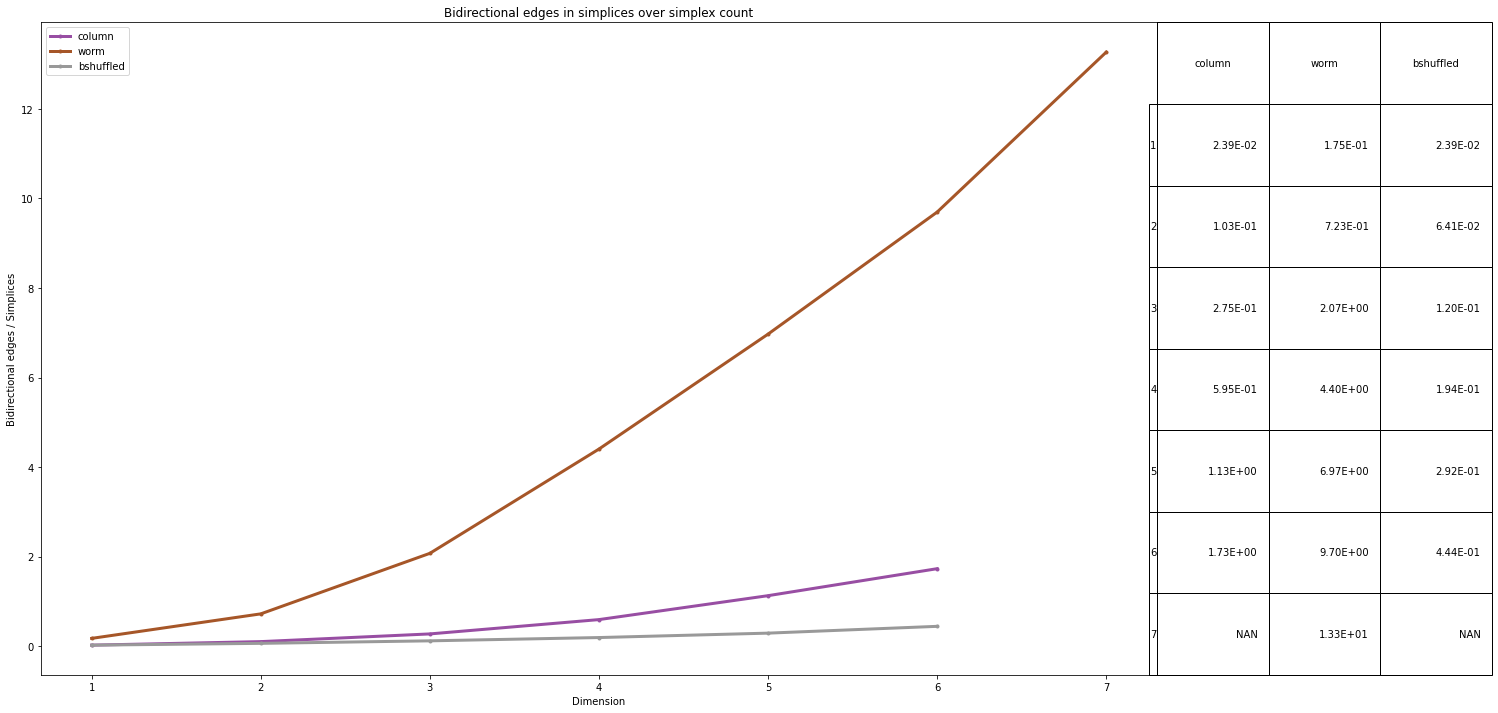

In [13]:
normalized_list = []
for x in [a, b, c]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "worm", "bshuffled"], "worm_bcount_normalized",
                  ylabel = "Bidirectional edges / Simplices", 
                  figtitle = "Bidirectional edges in simplices over simplex count")

<ipython-input-14-92b156da277e>:5: RuntimeWarning: invalid value encountered in true_divide
  dictionary[key] = x[key]/x[key][0][-1]


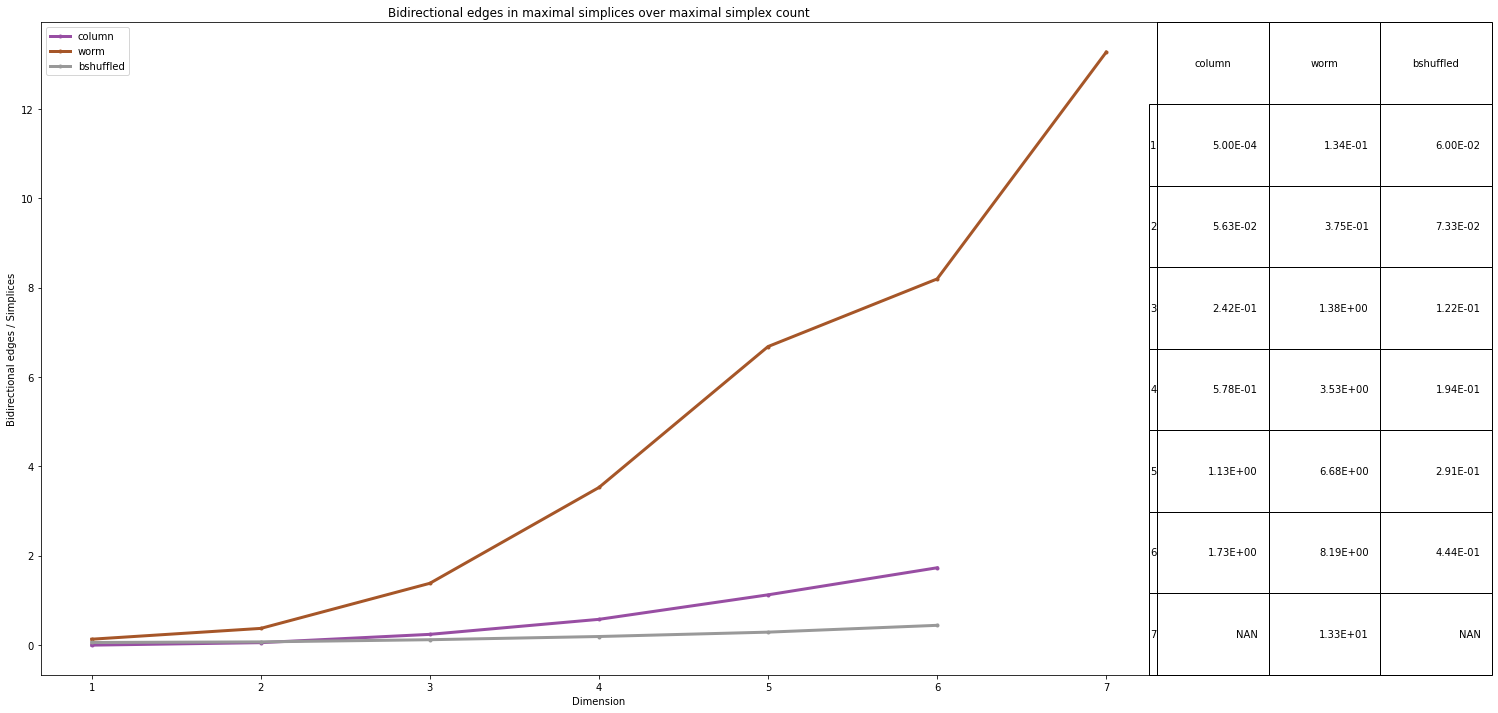

In [14]:
normalized_list = []
for x in [amax, bmax, cmax]:
    dictionary = {}
    for key in x.keys():
        dictionary[key] = x[key]/x[key][0][-1]
    normalized_list.append(dictionary)
plot_biedge_counts(normalized_list, 6, 2, ["column", "worm", "bshuffled"], "worm_mbcount_normalized",
                  ylabel = "Bidirectional edges / Simplices", 
                  figtitle = "Bidirectional edges in maximal simplices over maximal simplex count")

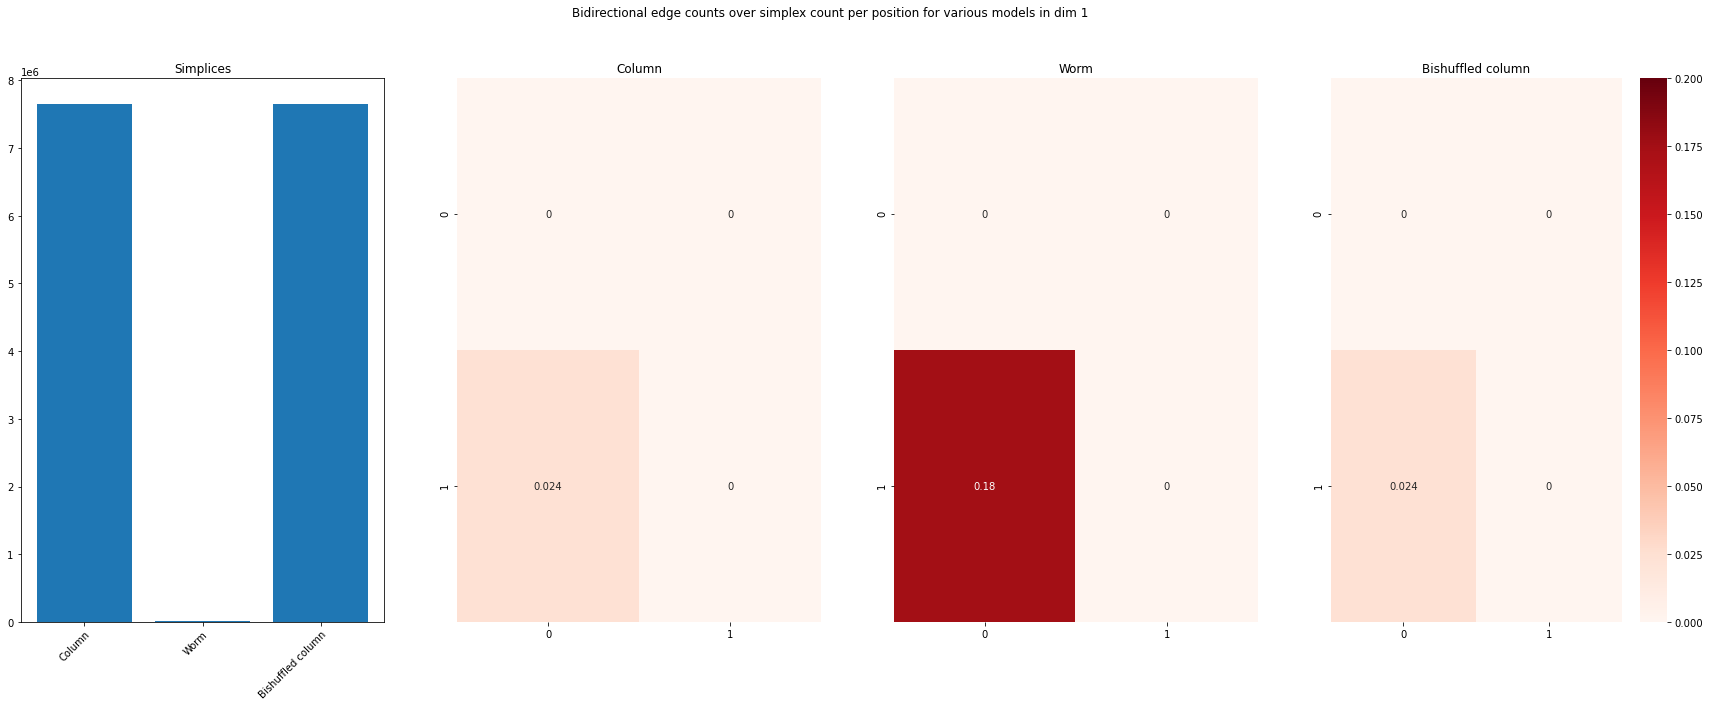

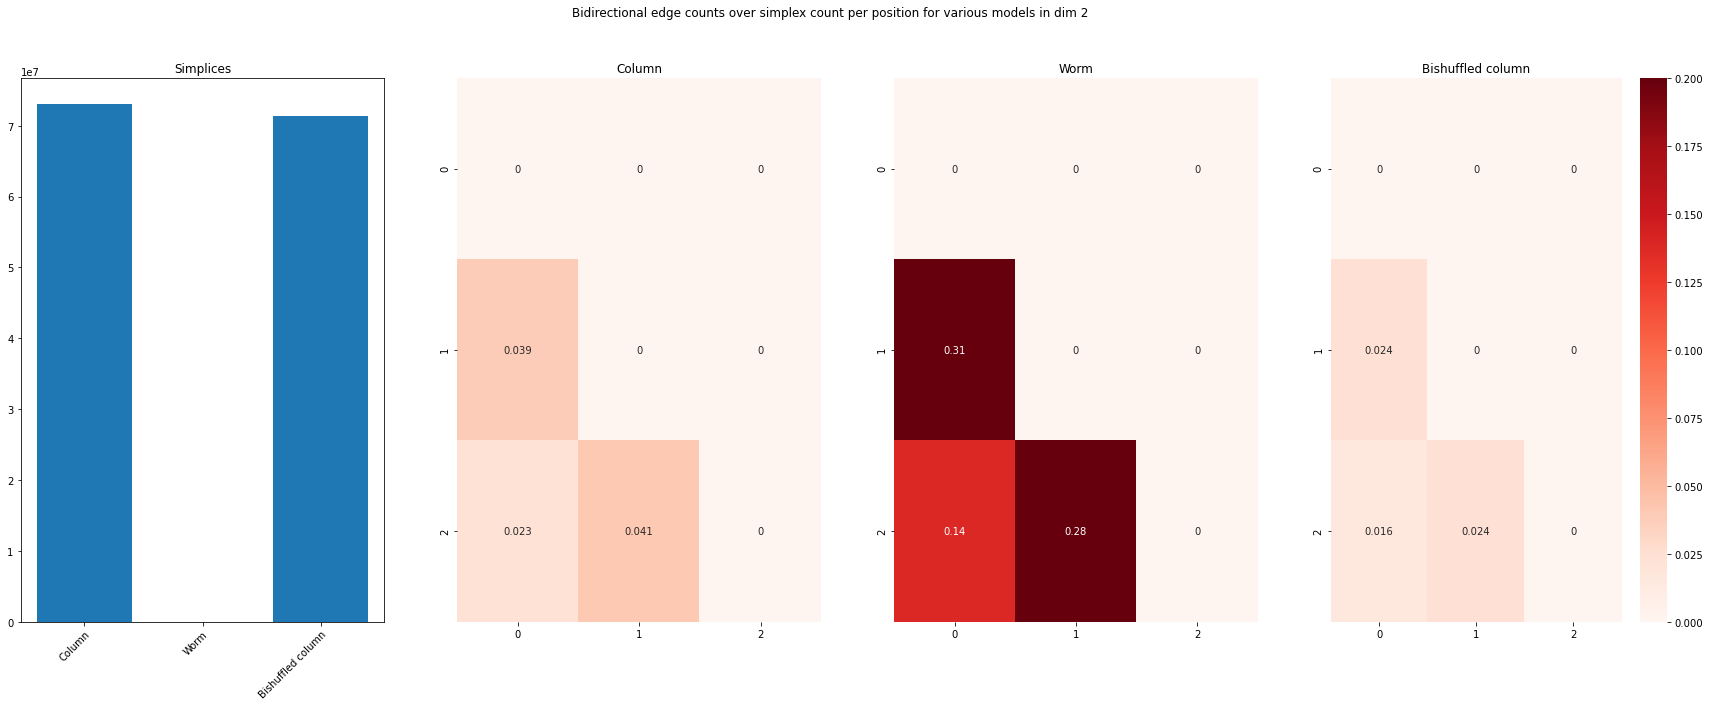

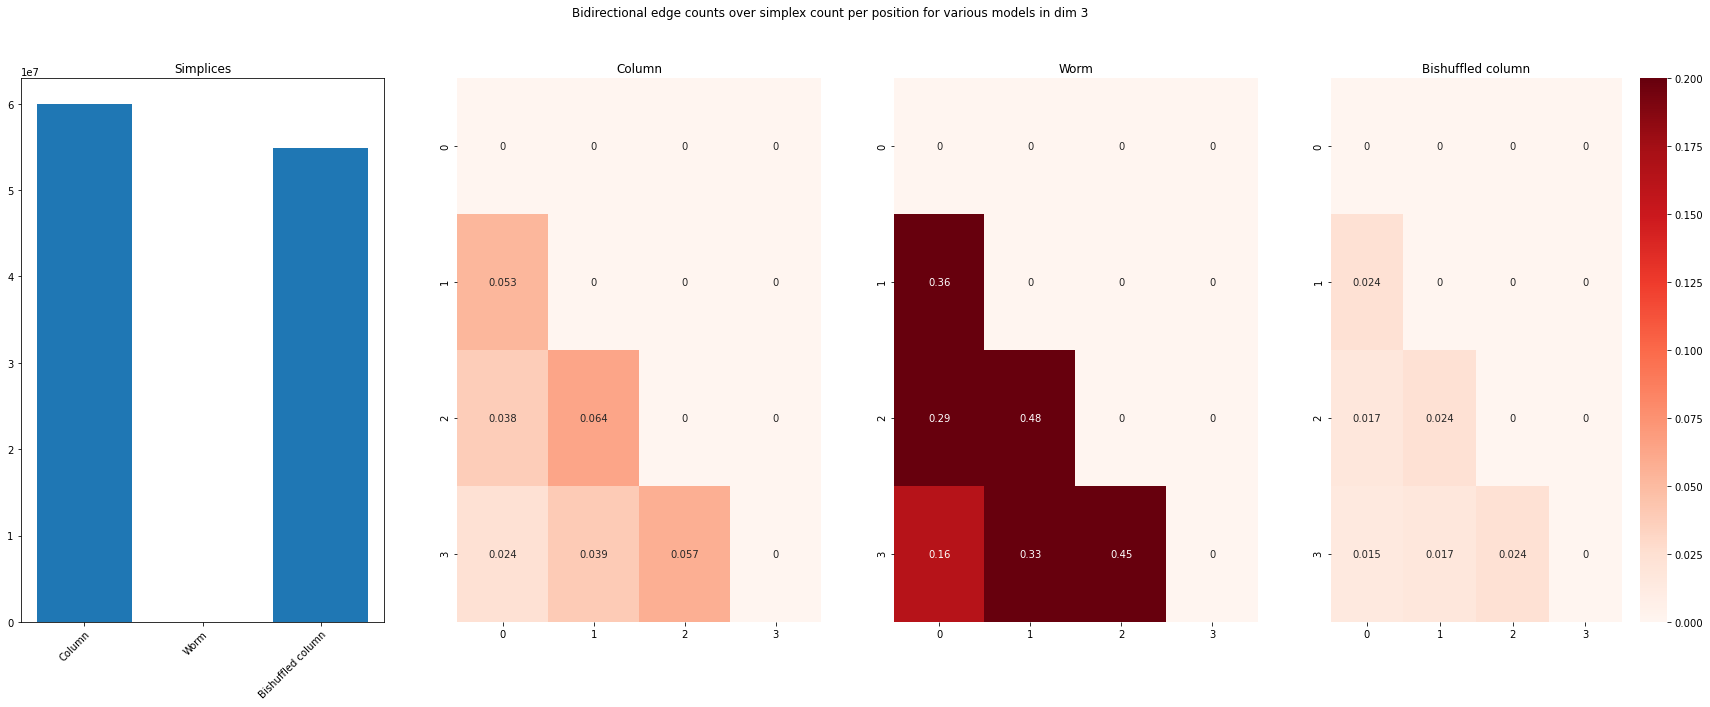

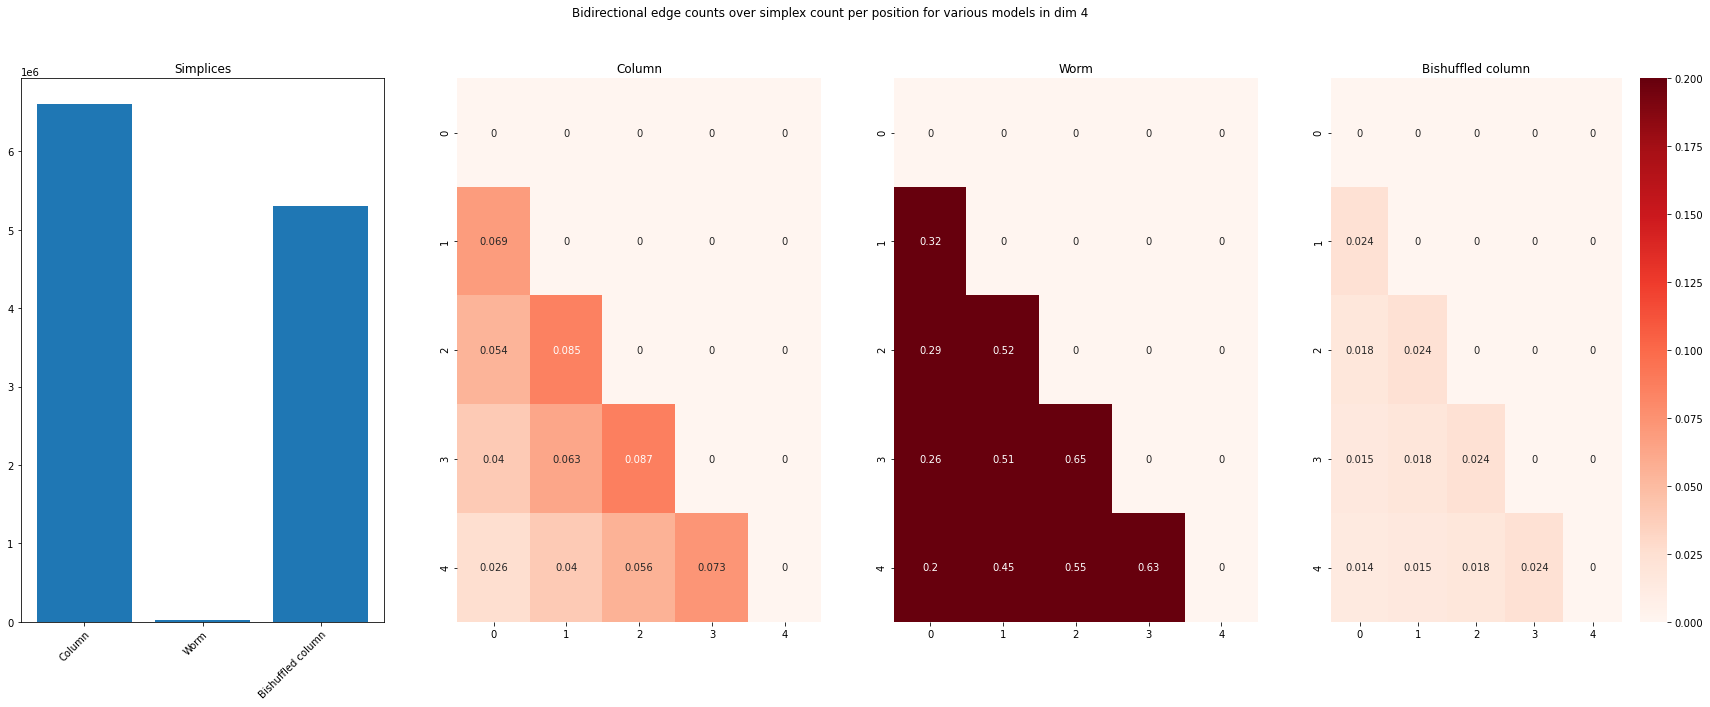

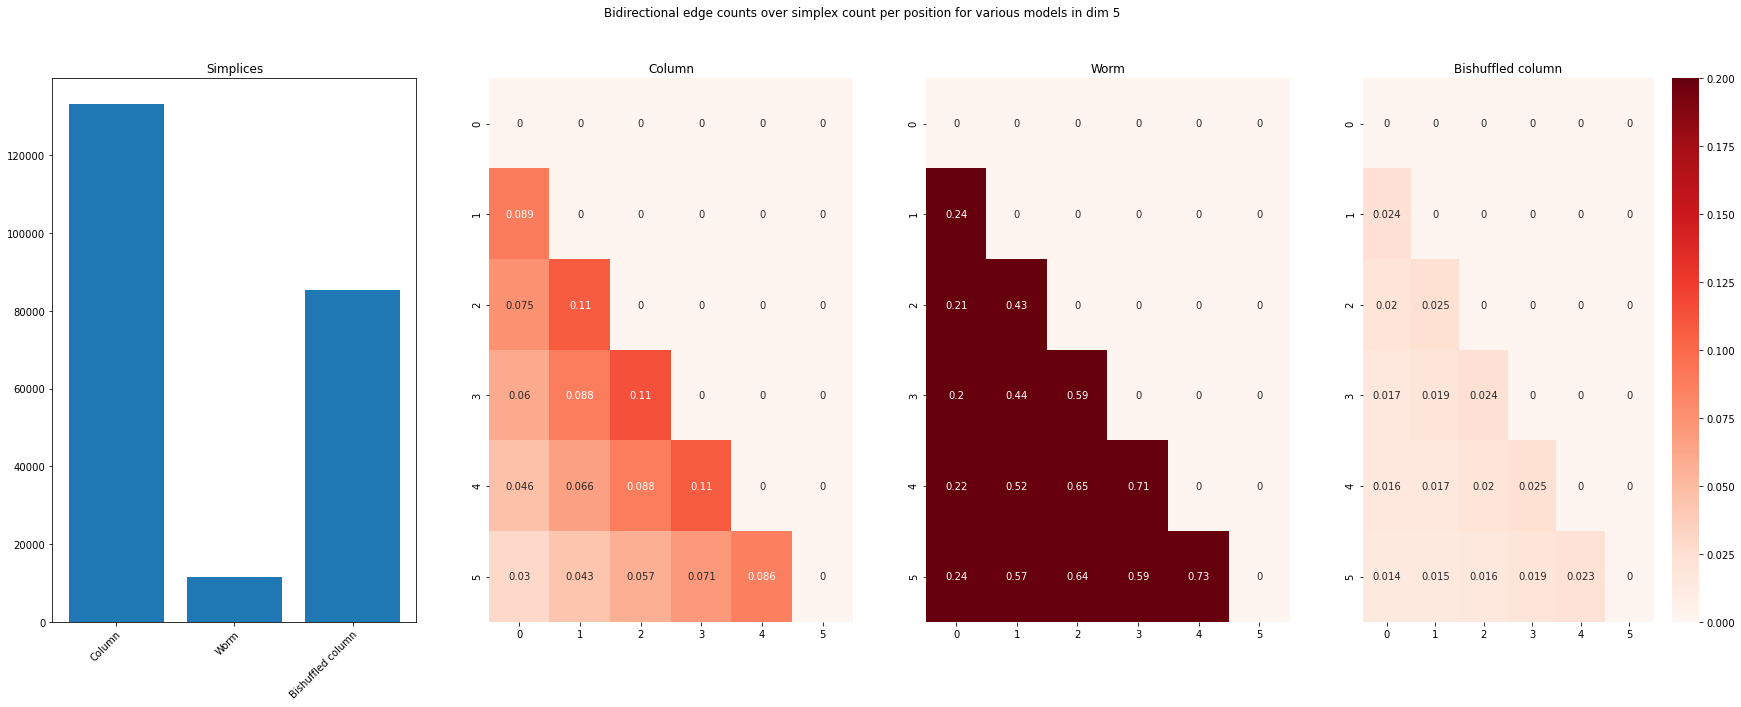

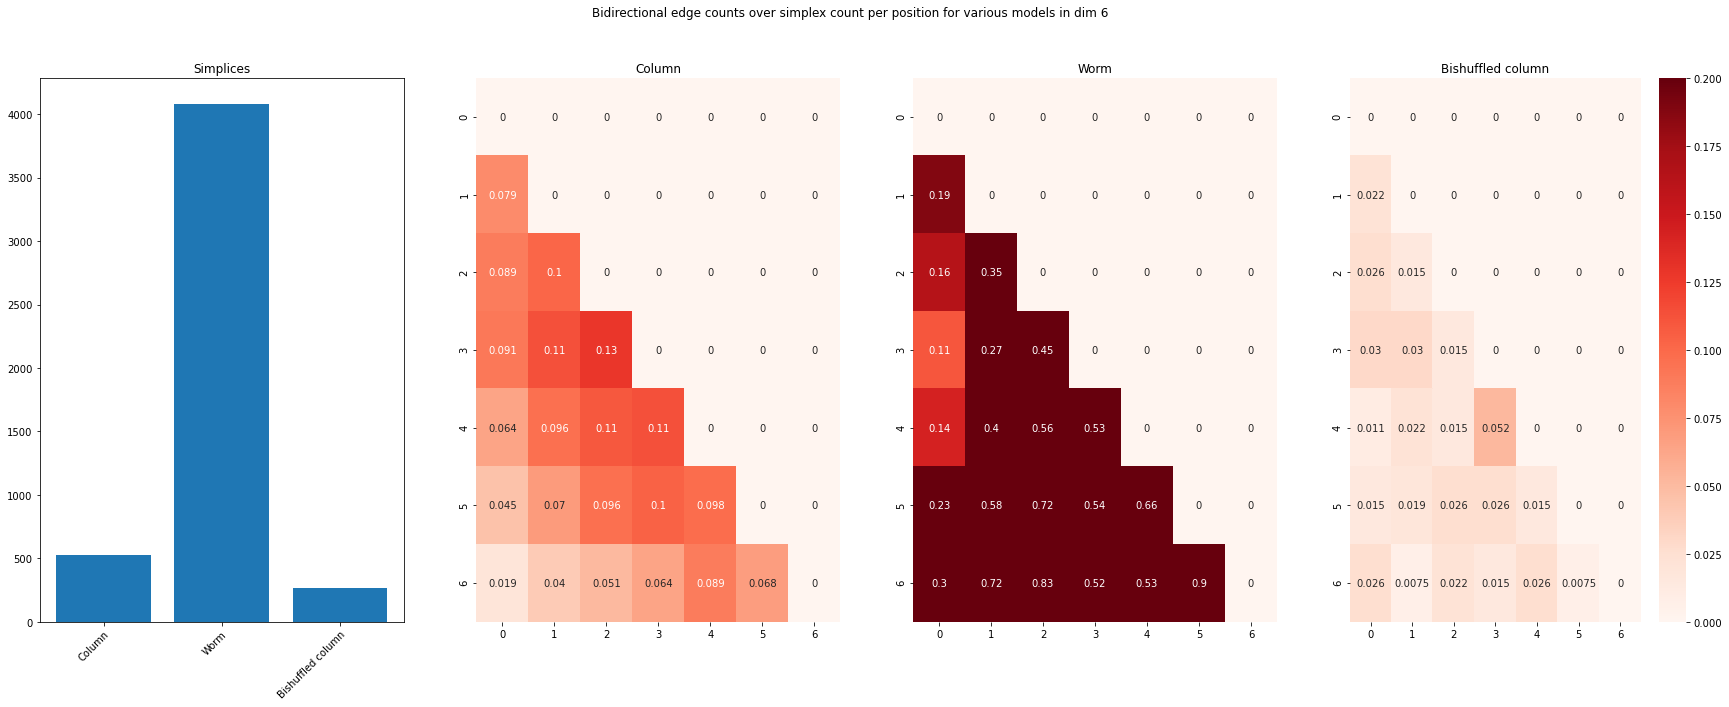

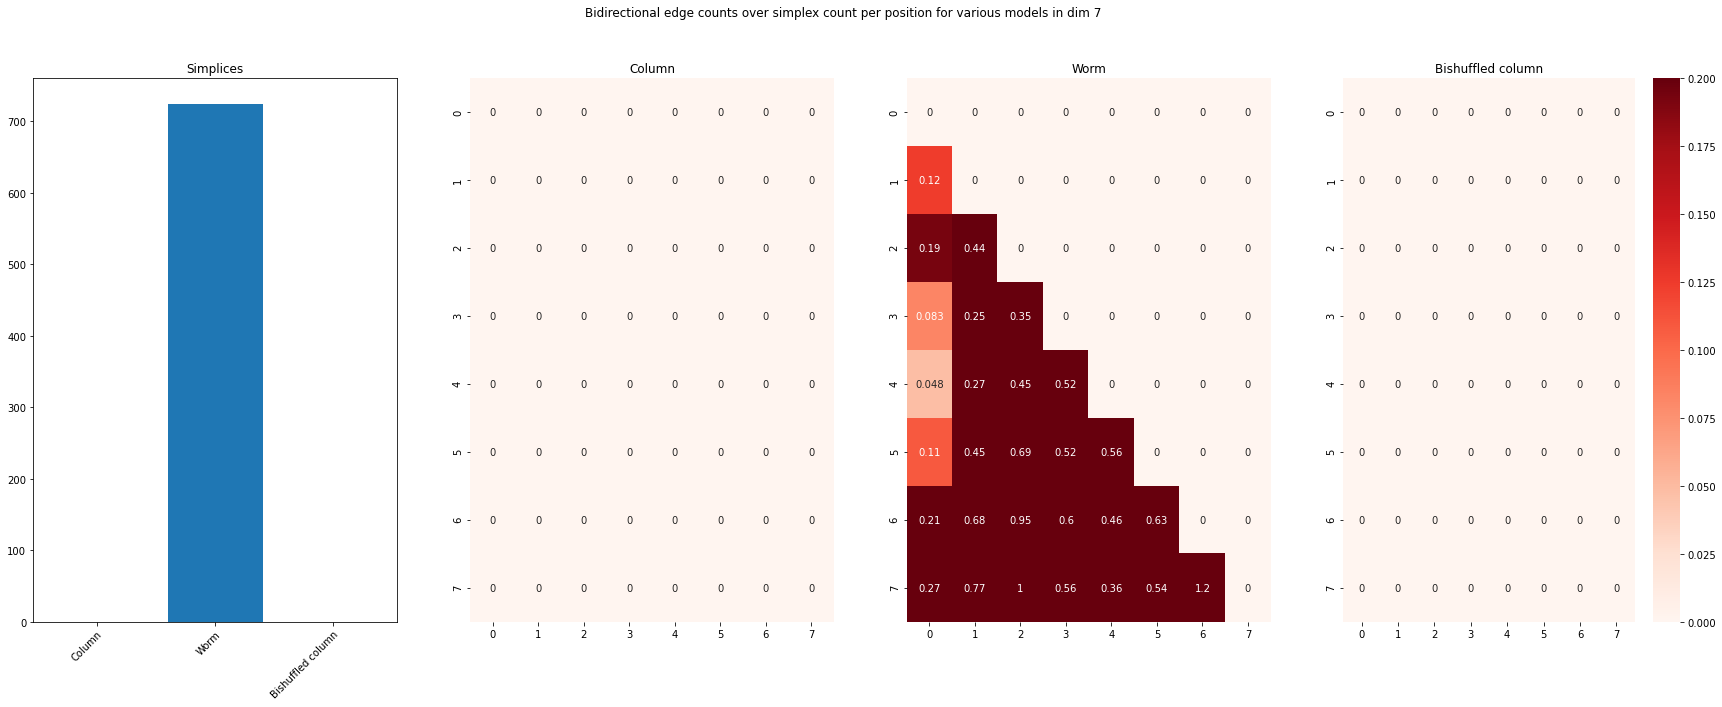

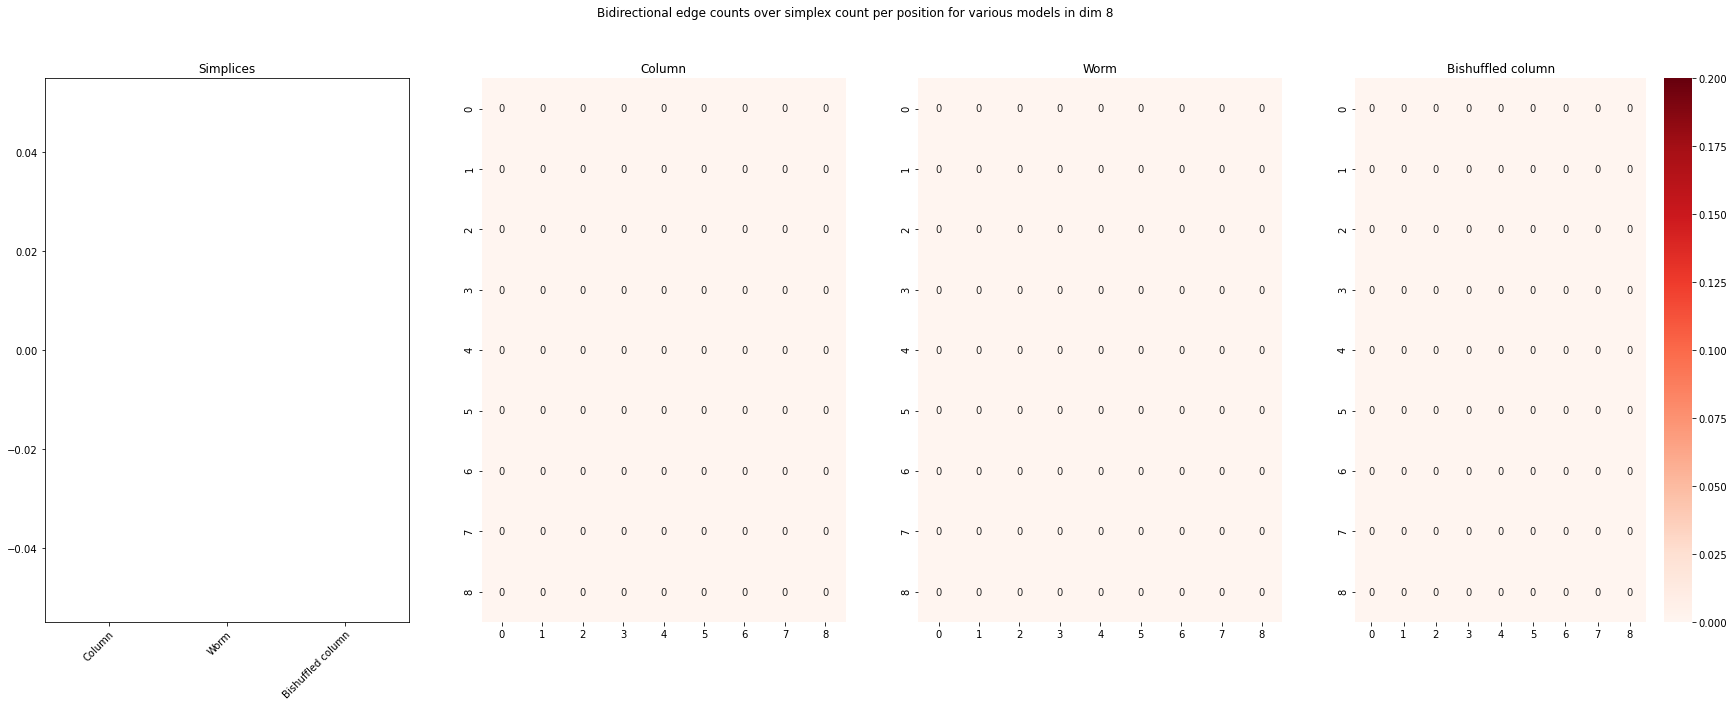

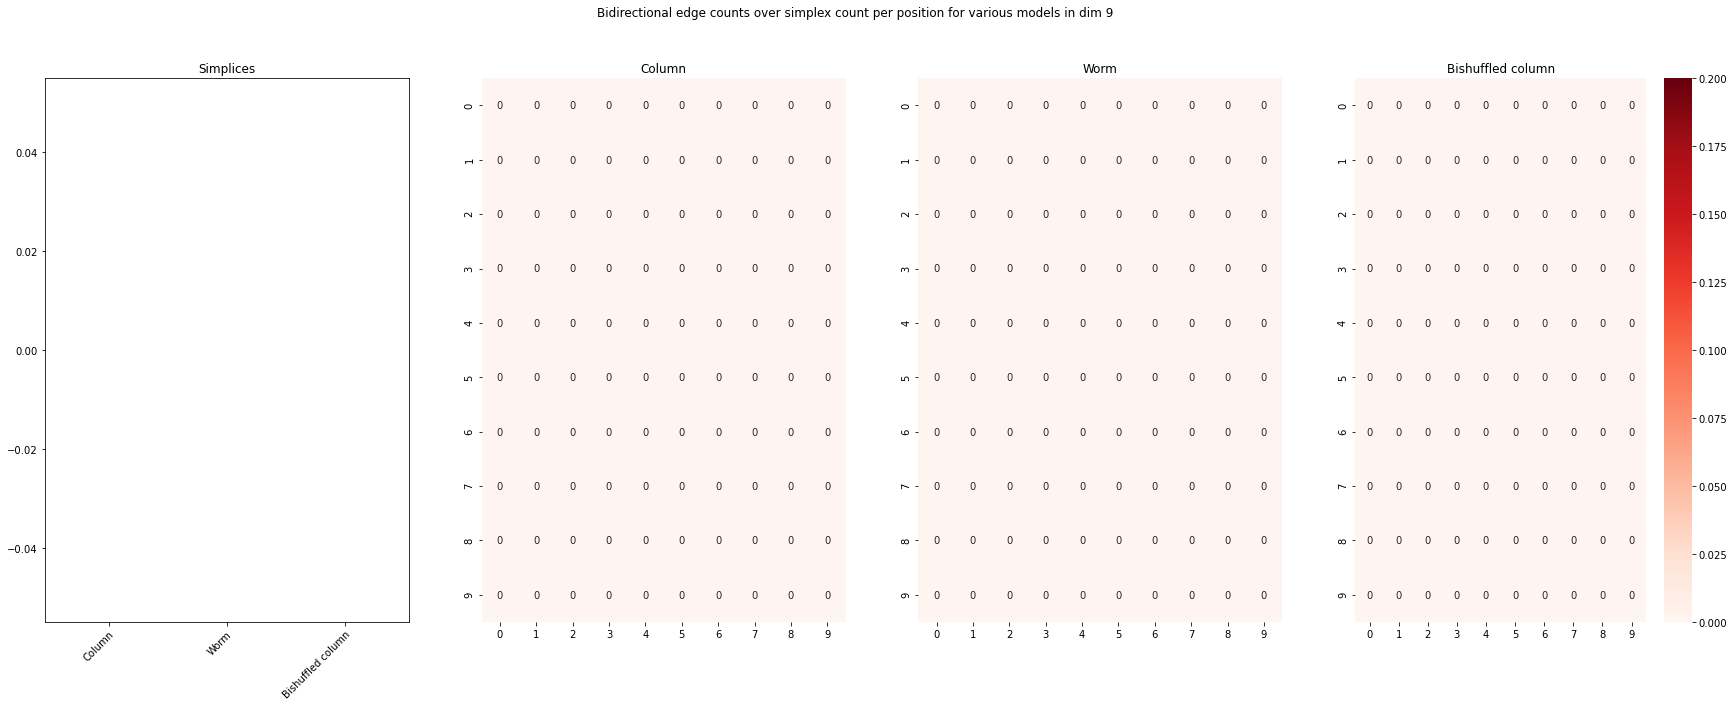

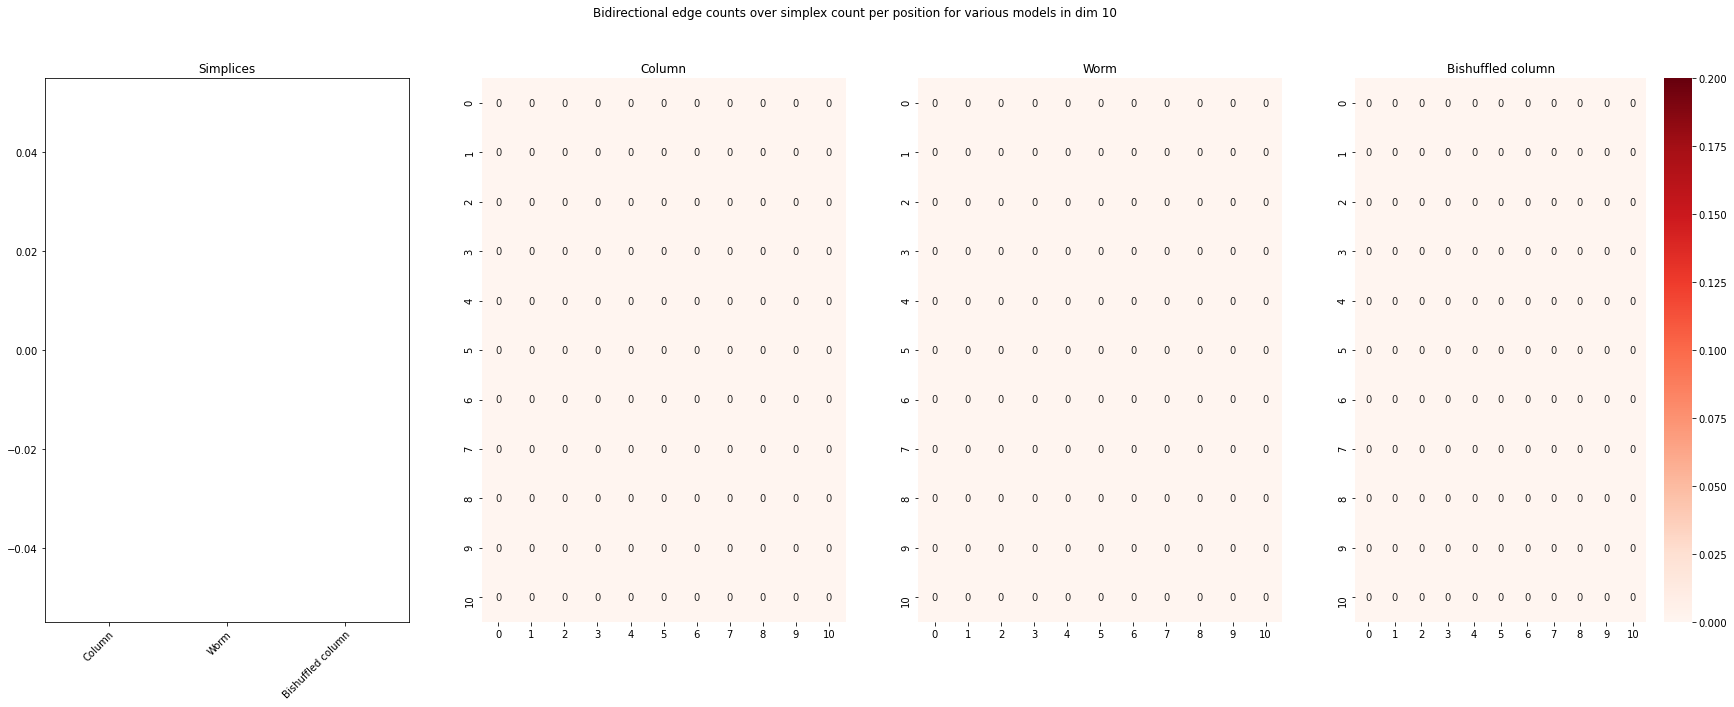

In [15]:
compare_graphs_normalized([a,b,c], 1, "worm_bcounts_norm", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

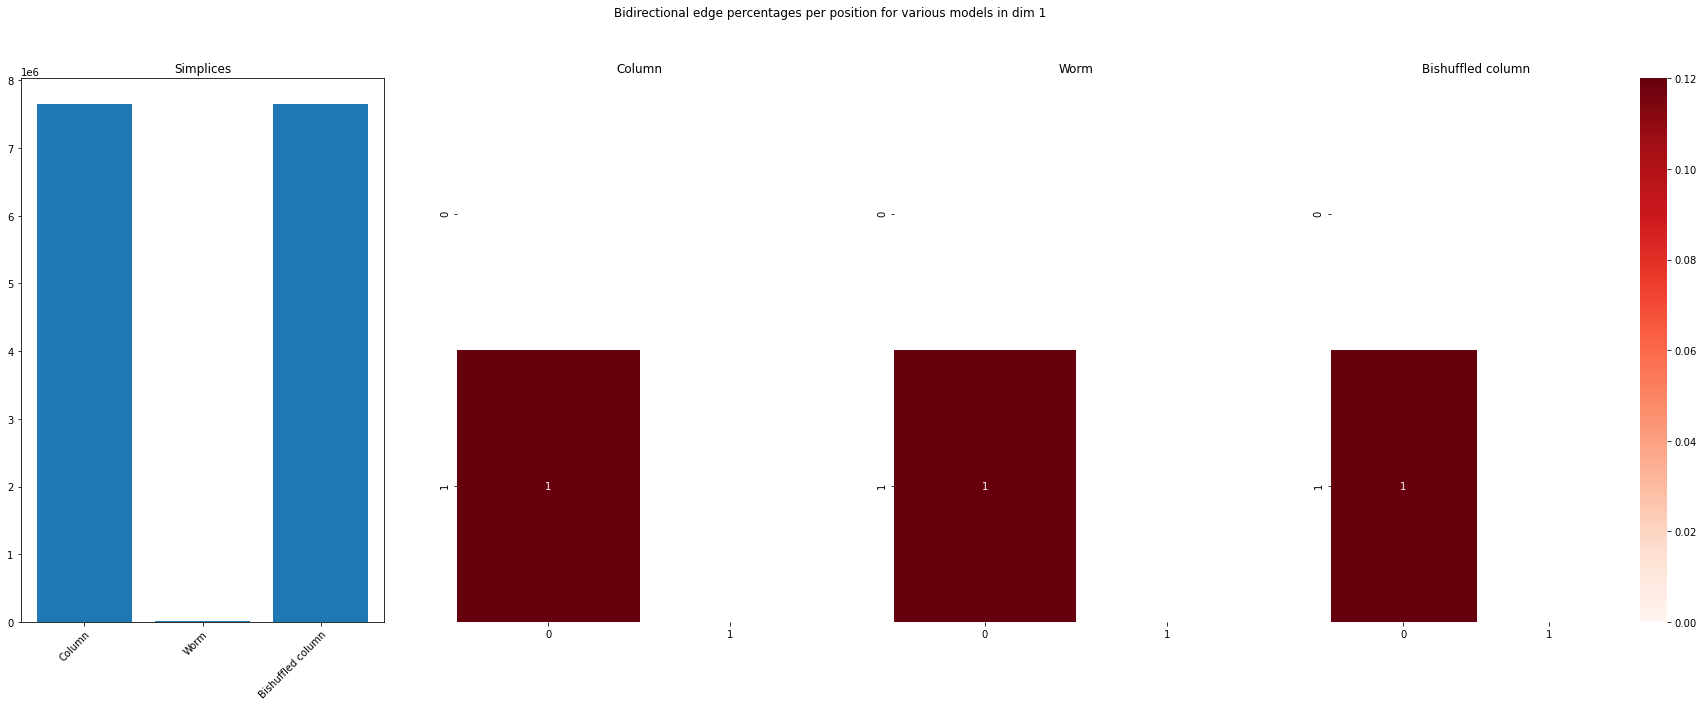

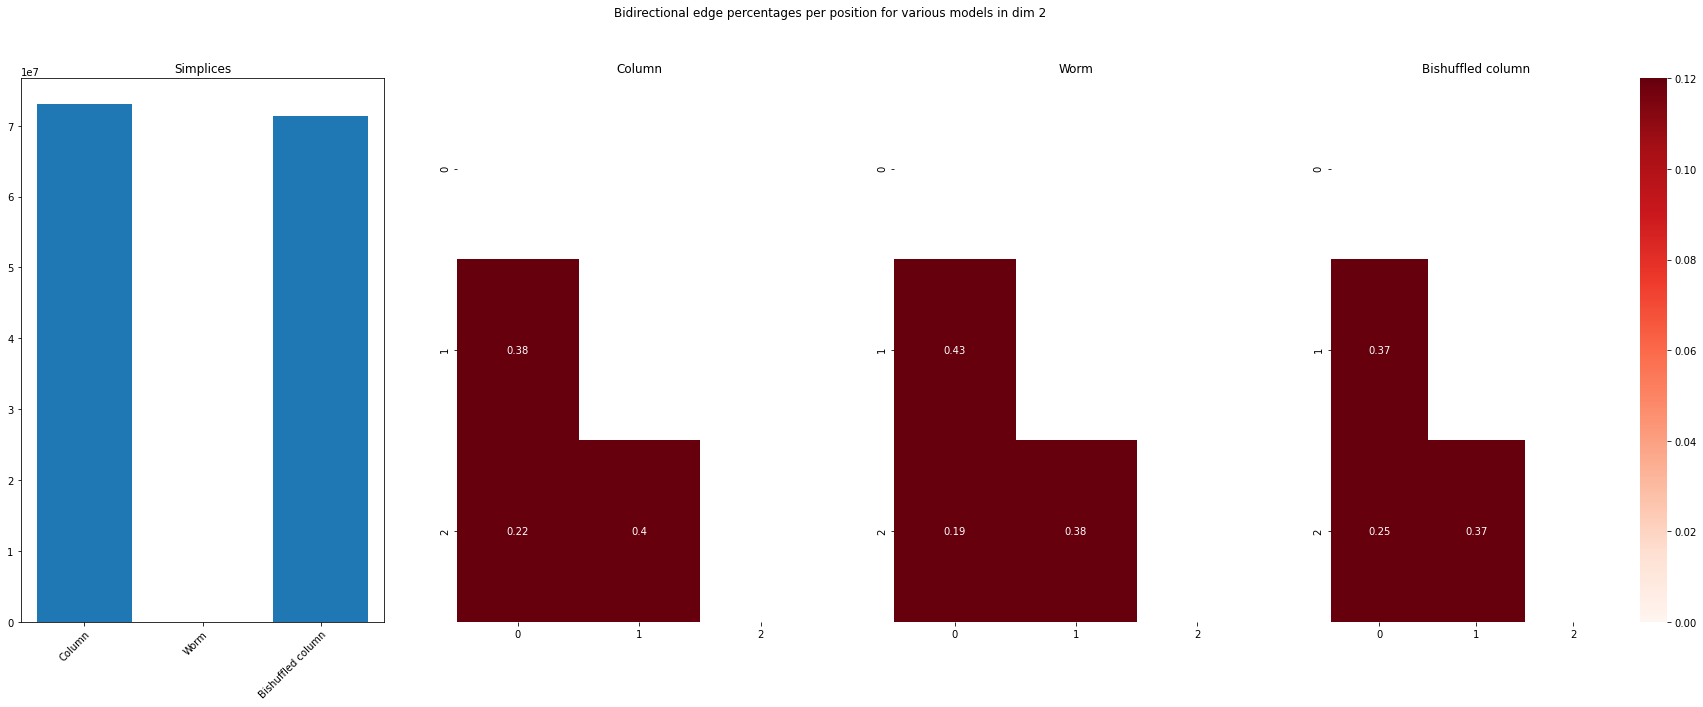

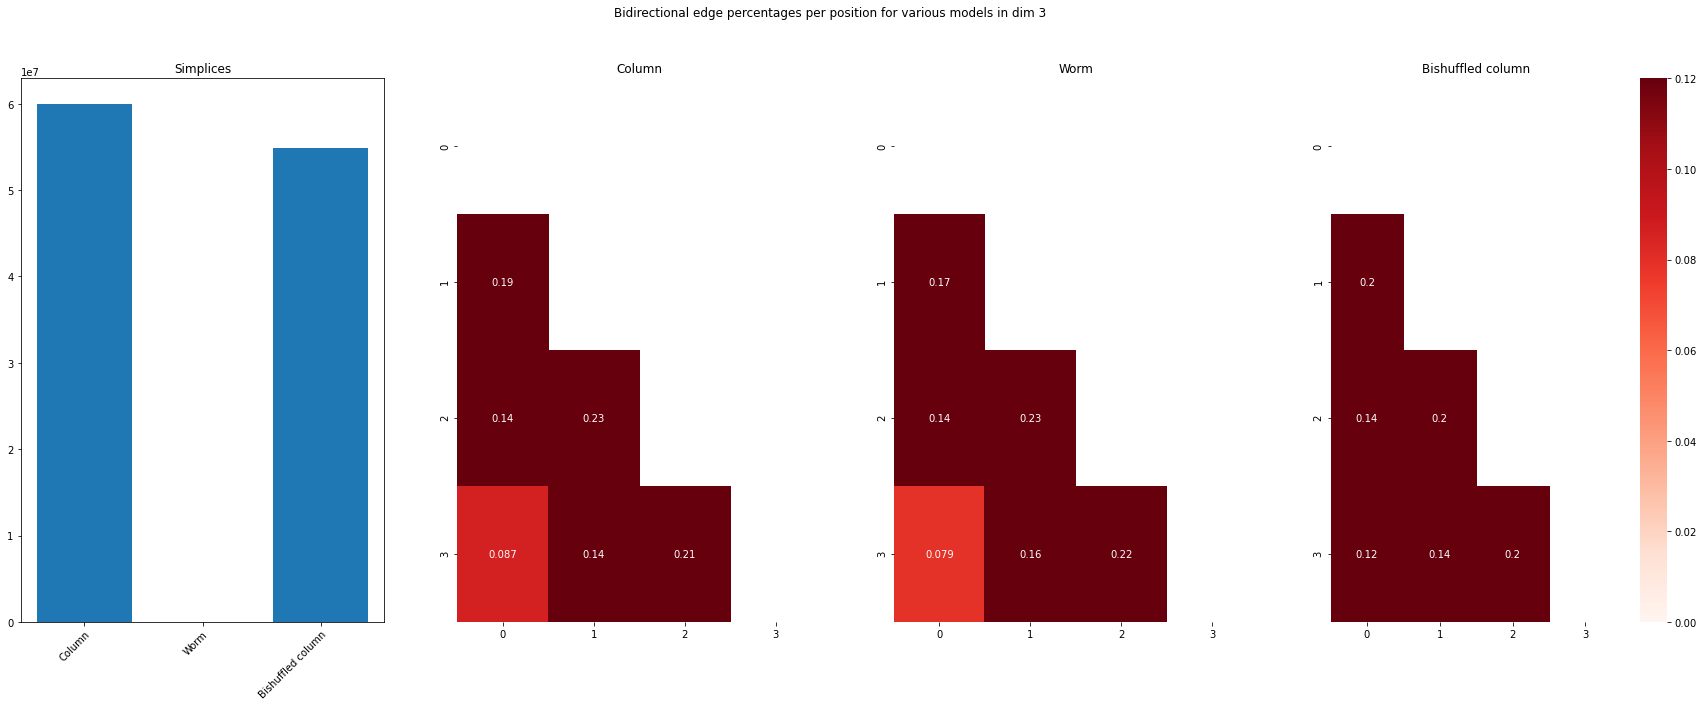

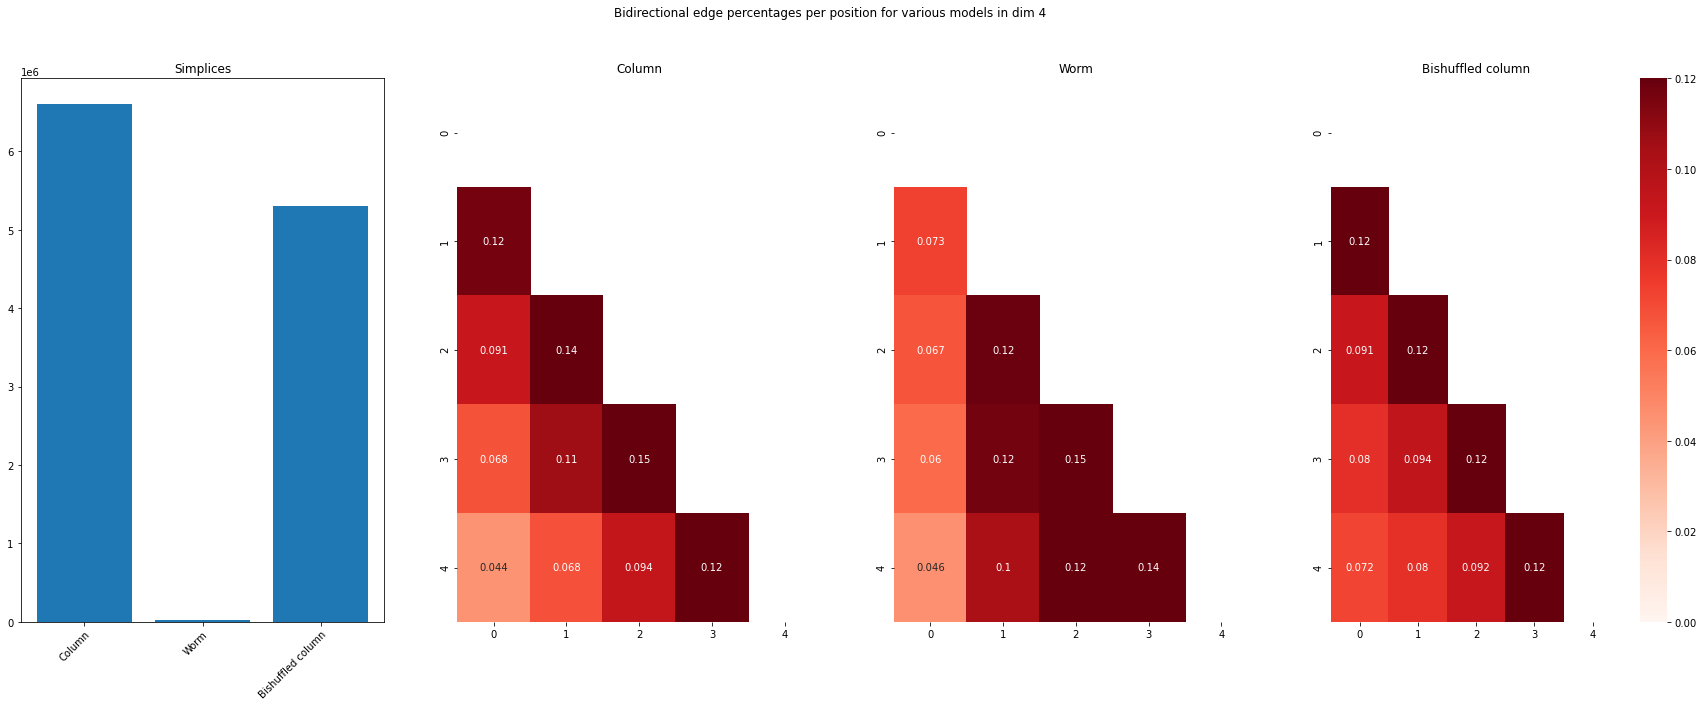

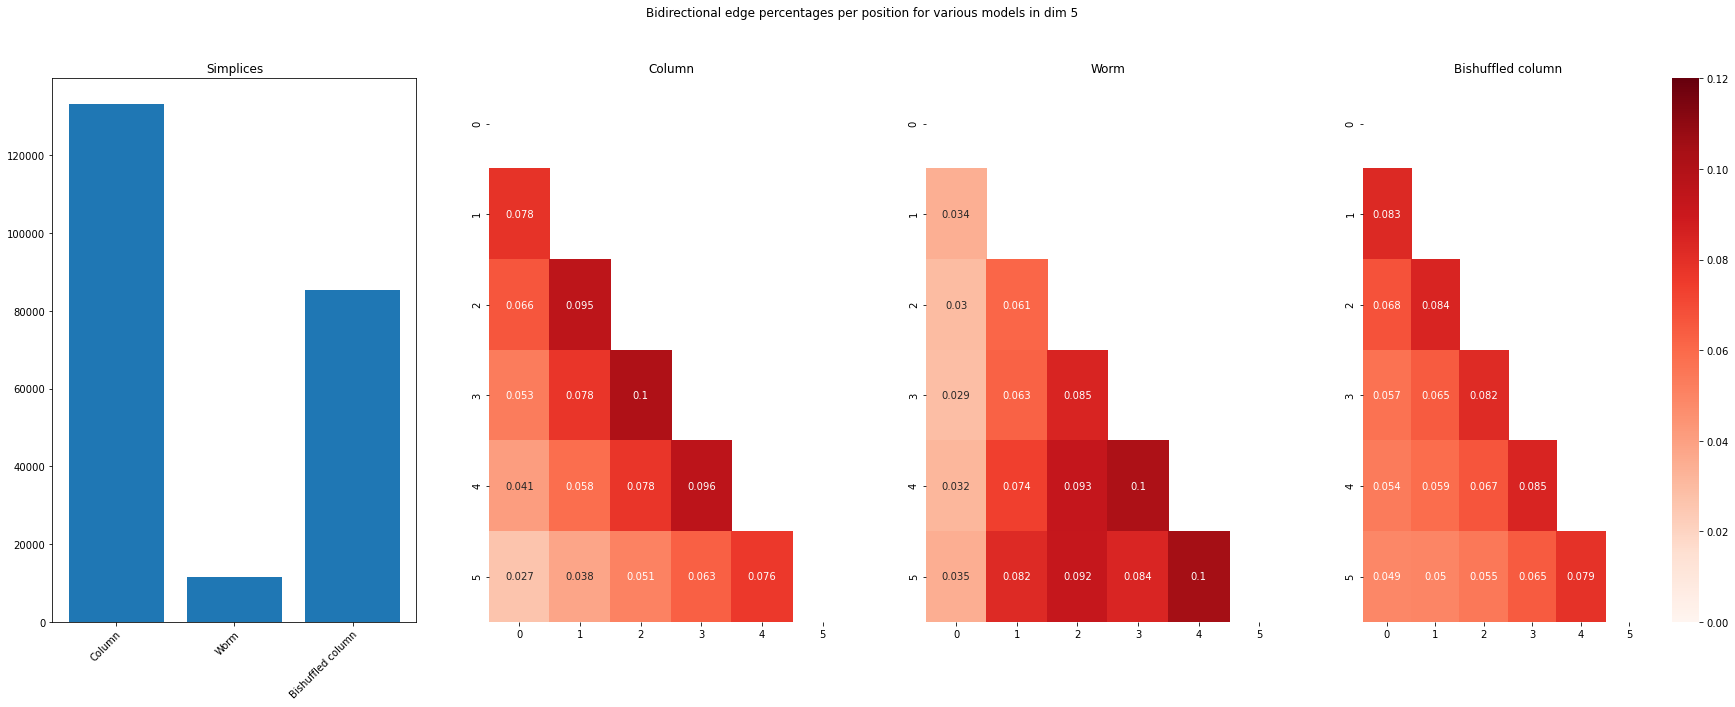

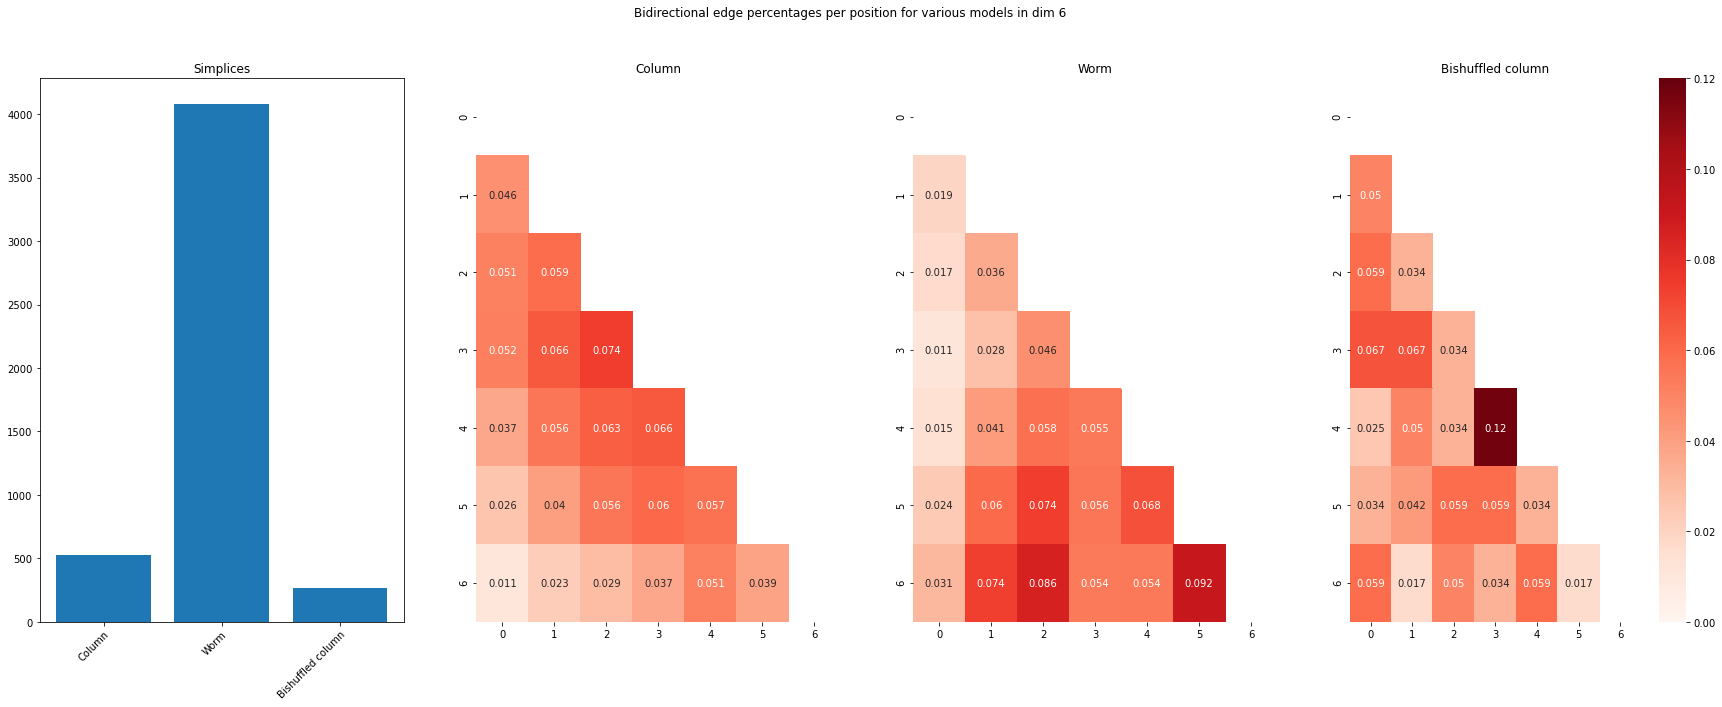

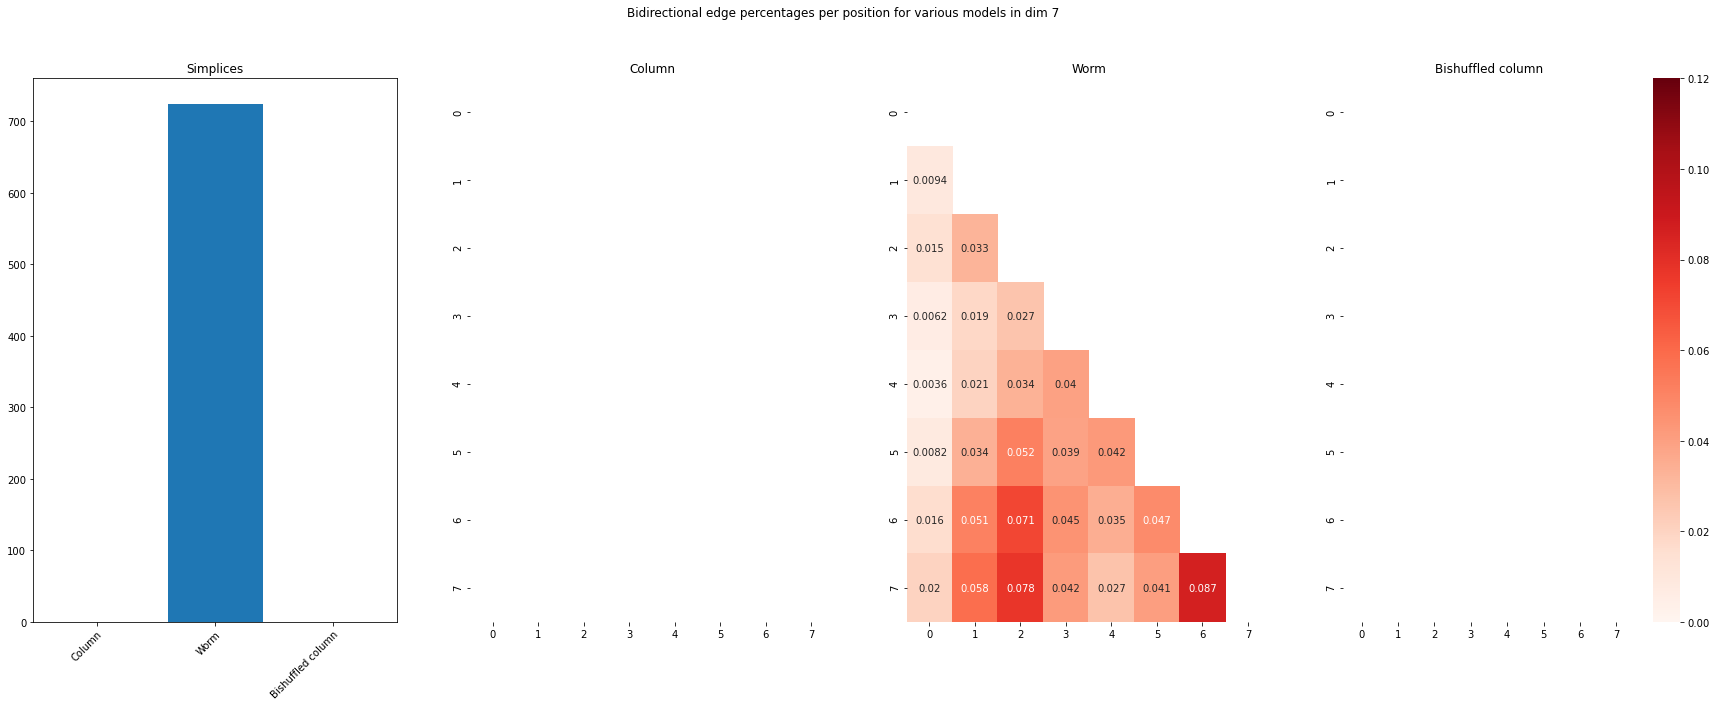

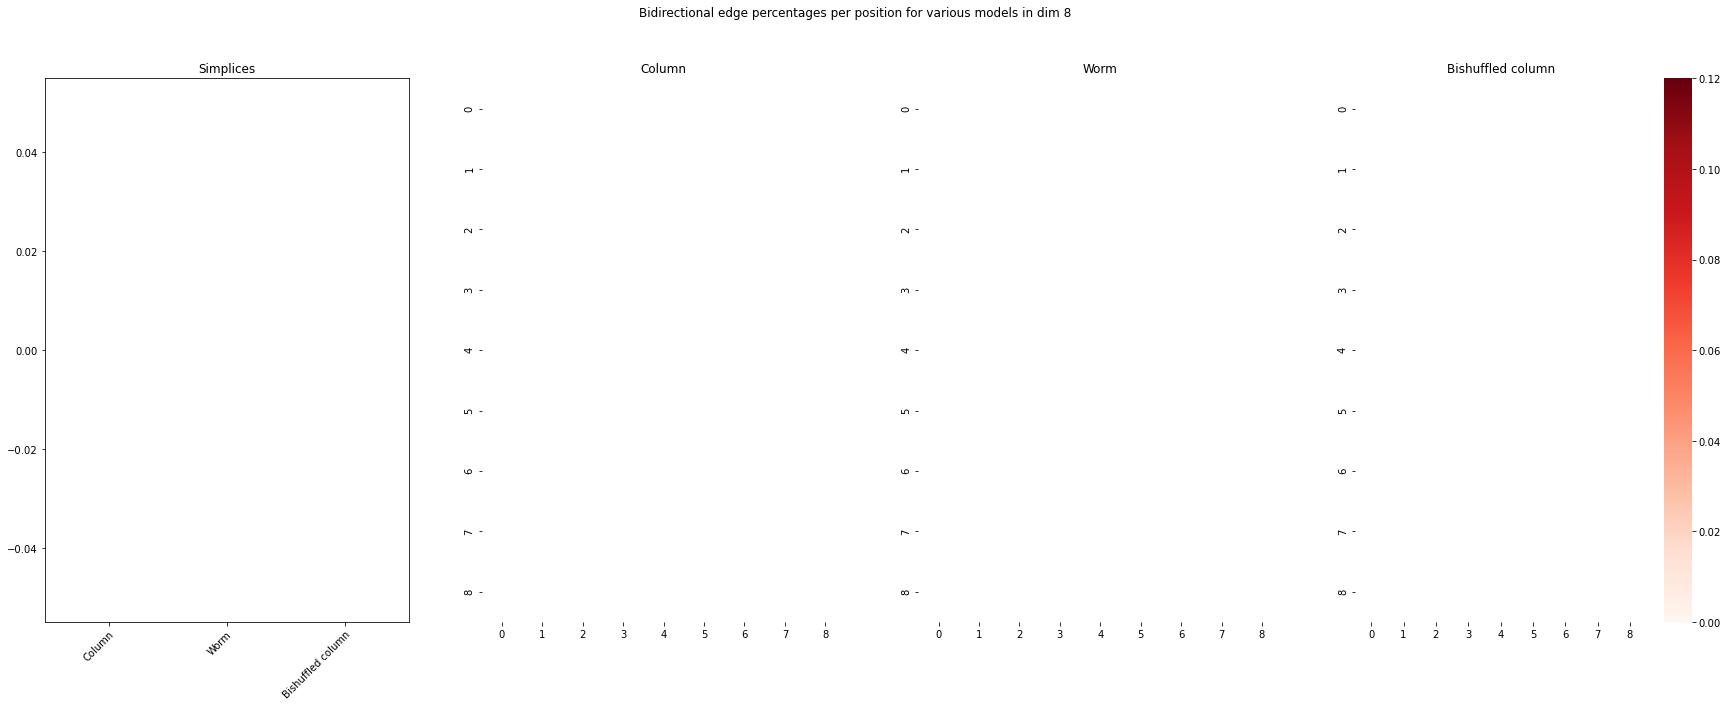

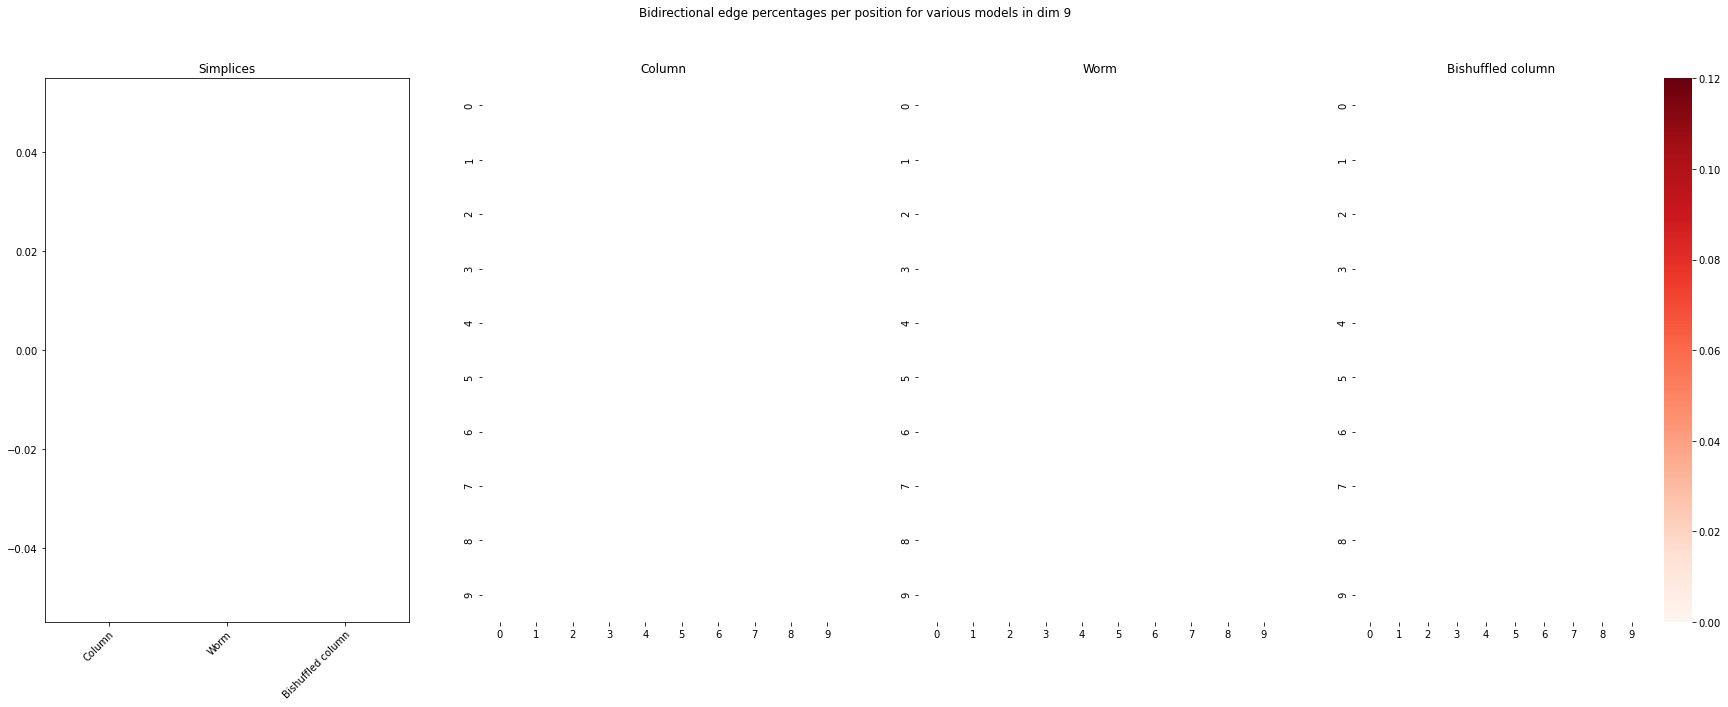

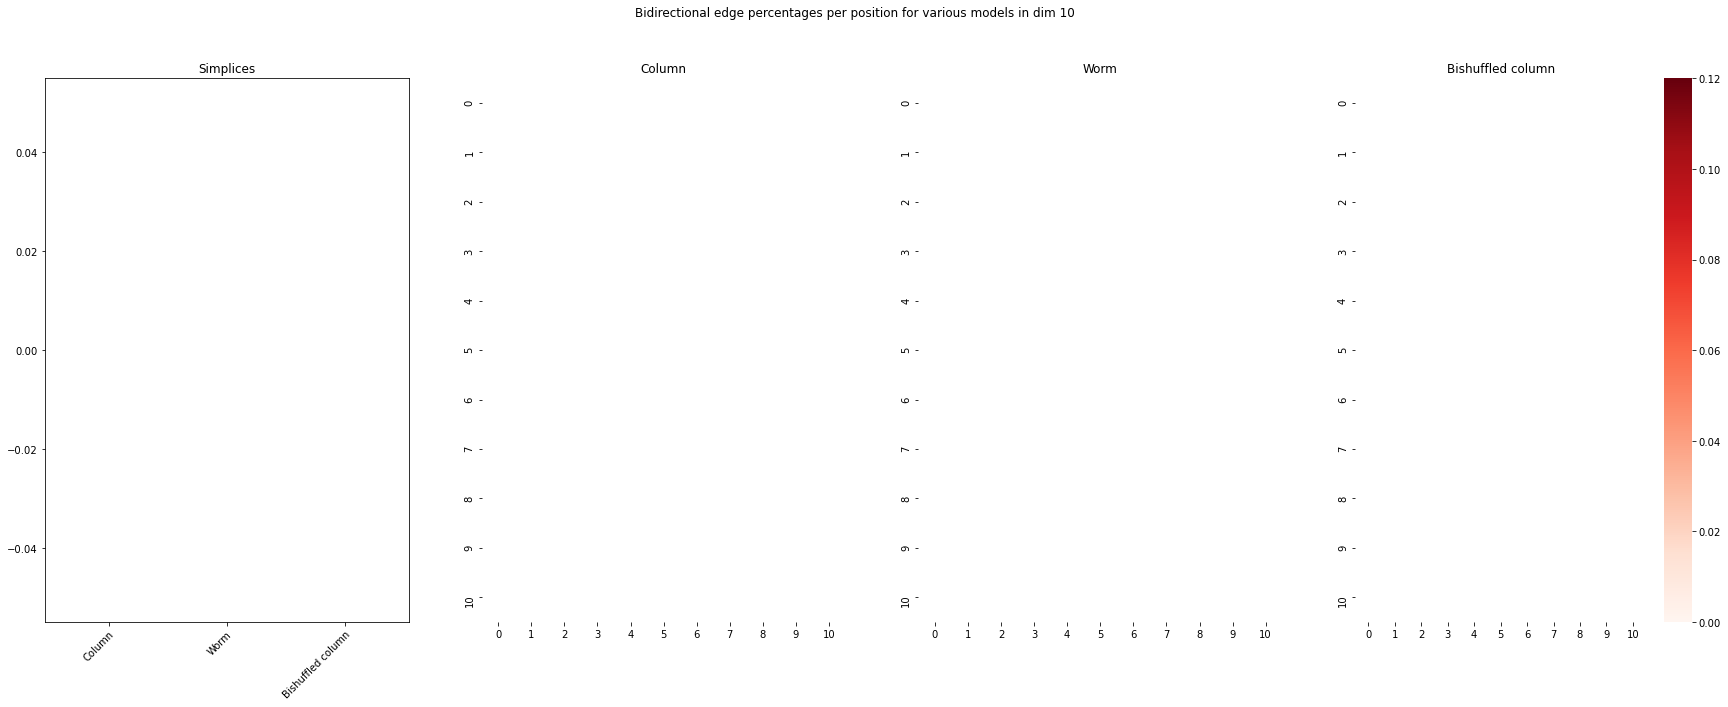

In [16]:
compare_graphs_percent([a,b,c], 1, "worm_bcounts_perc", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

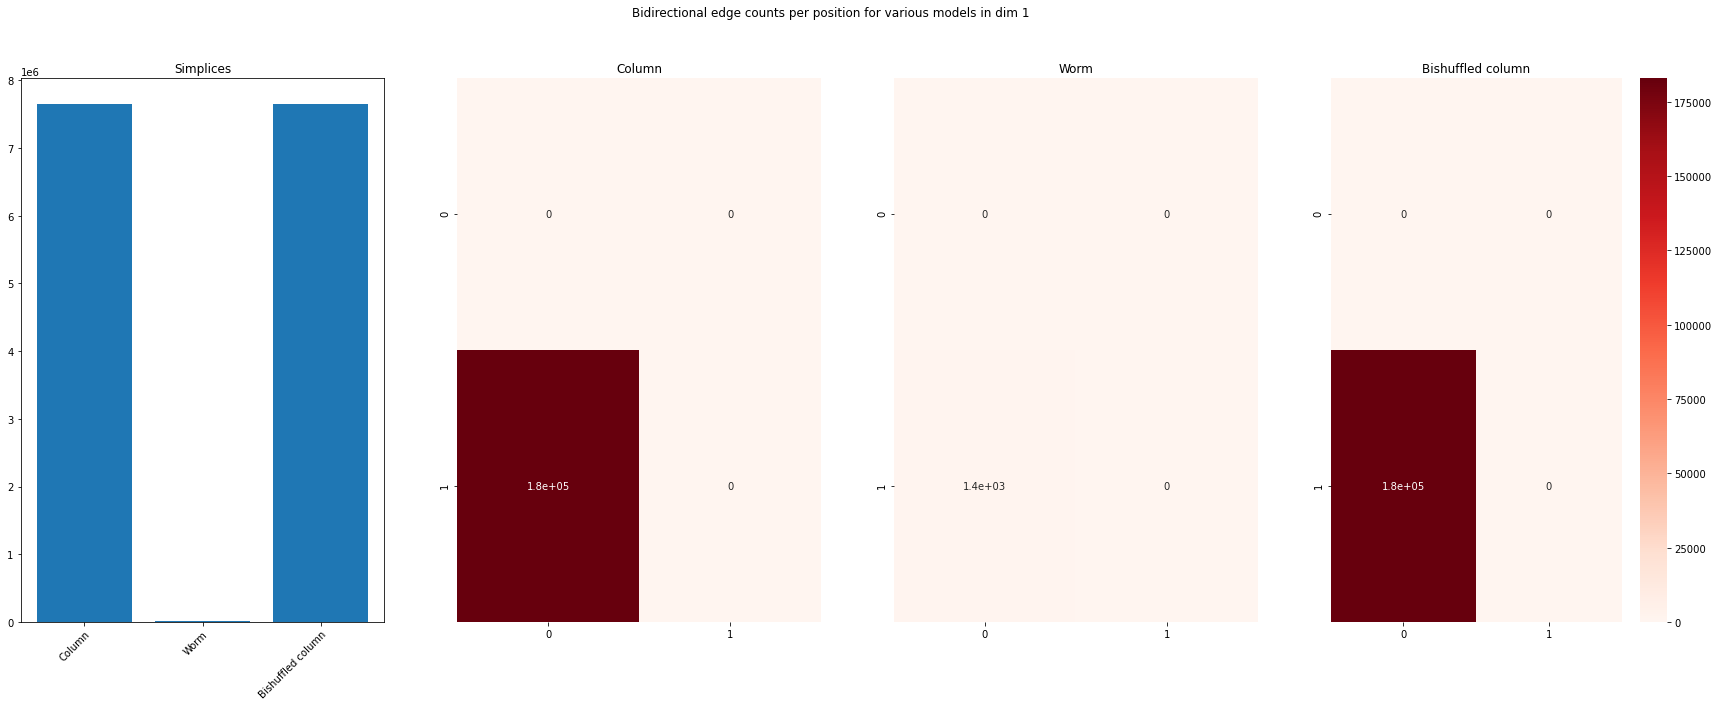

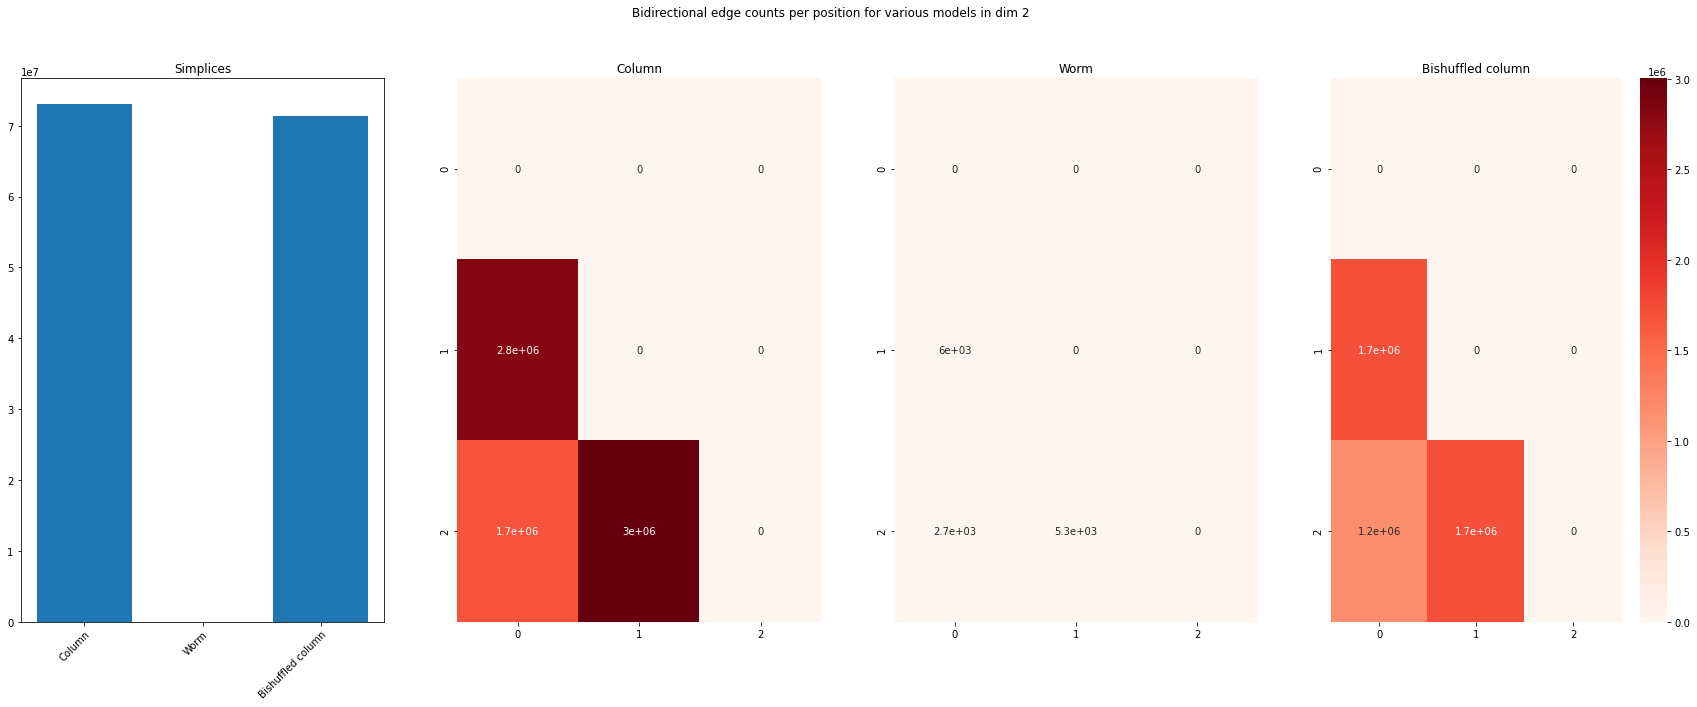

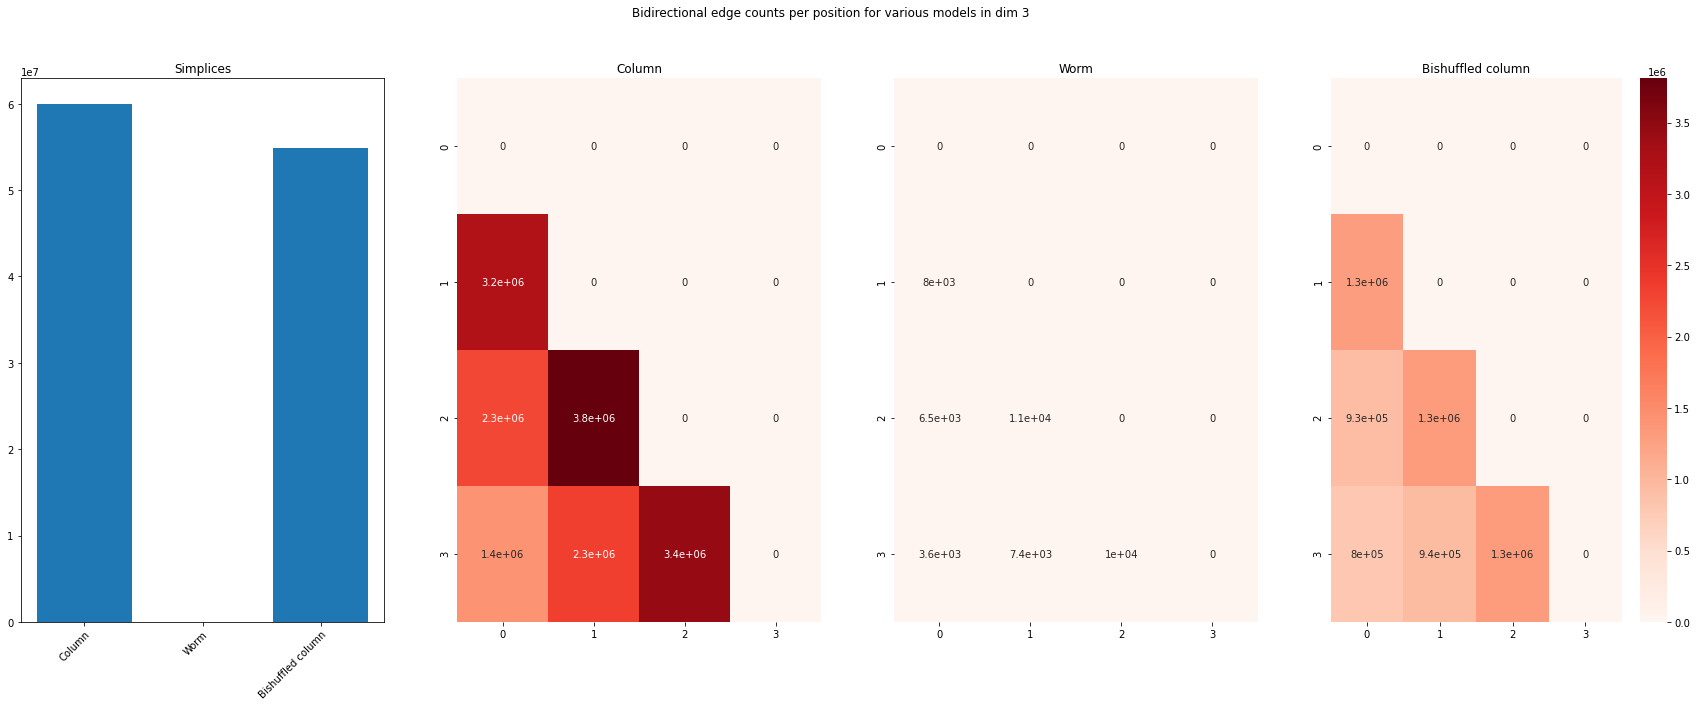

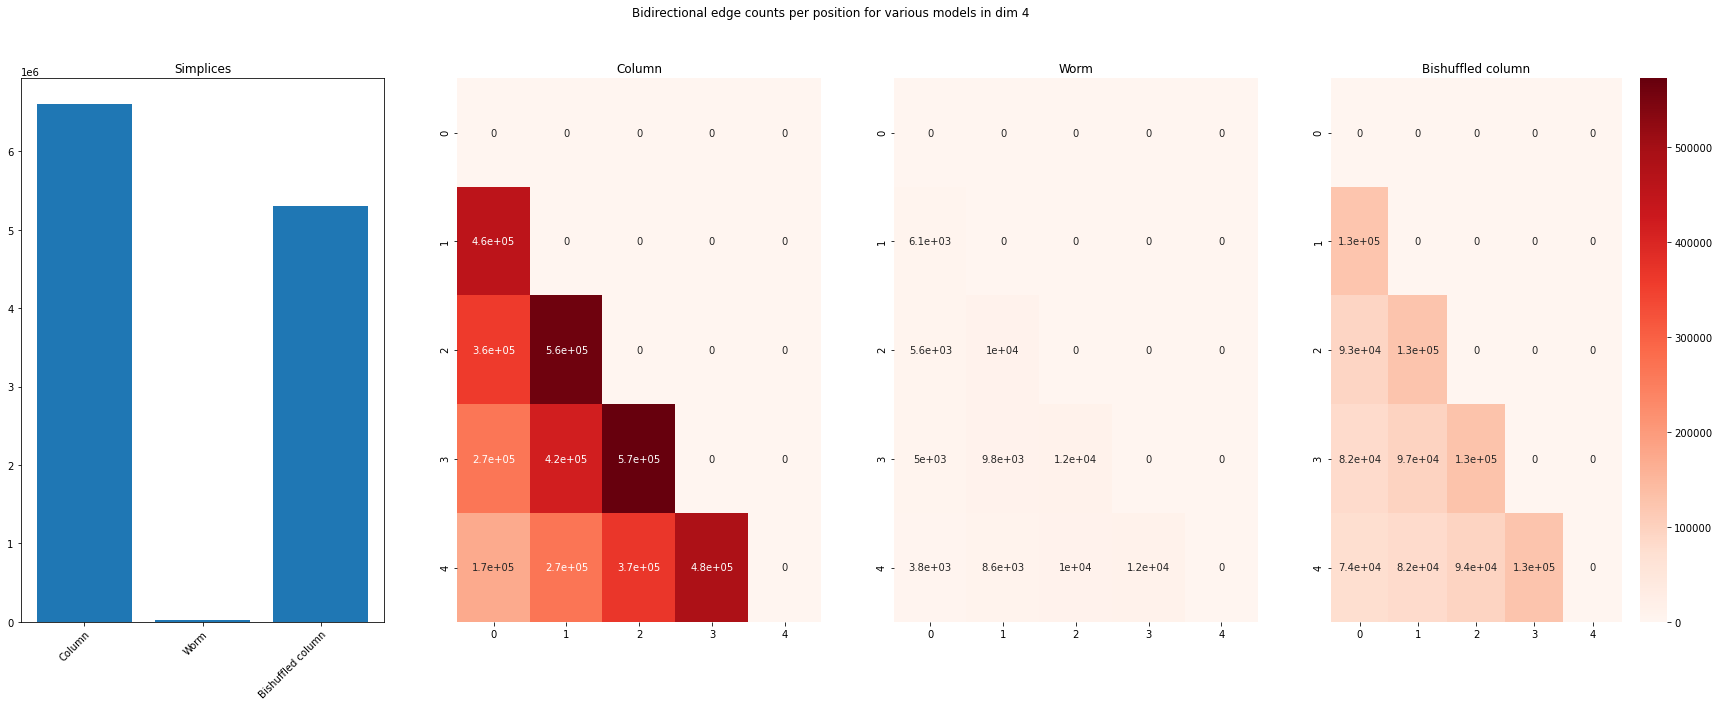

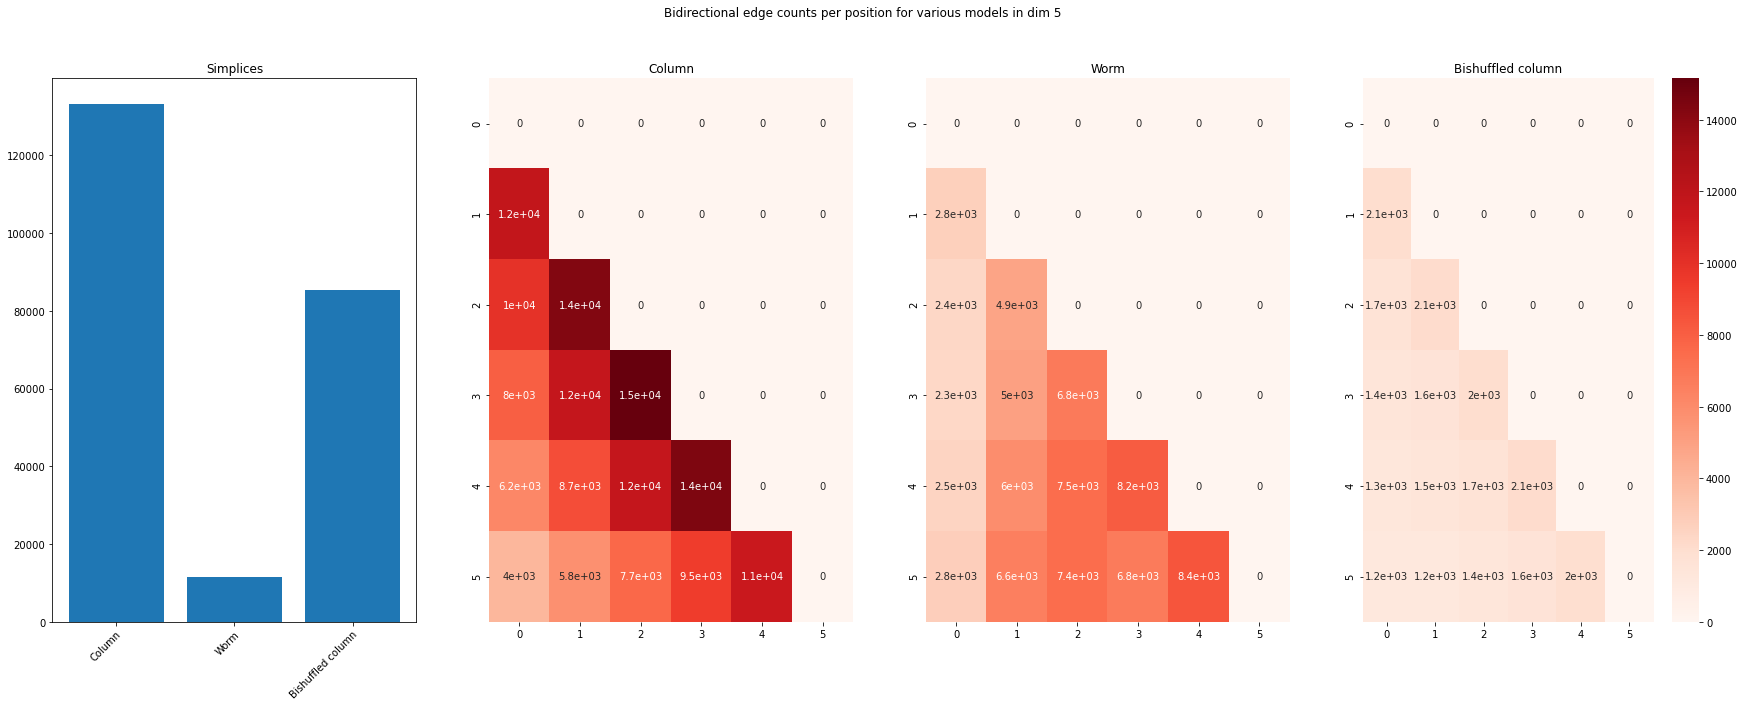

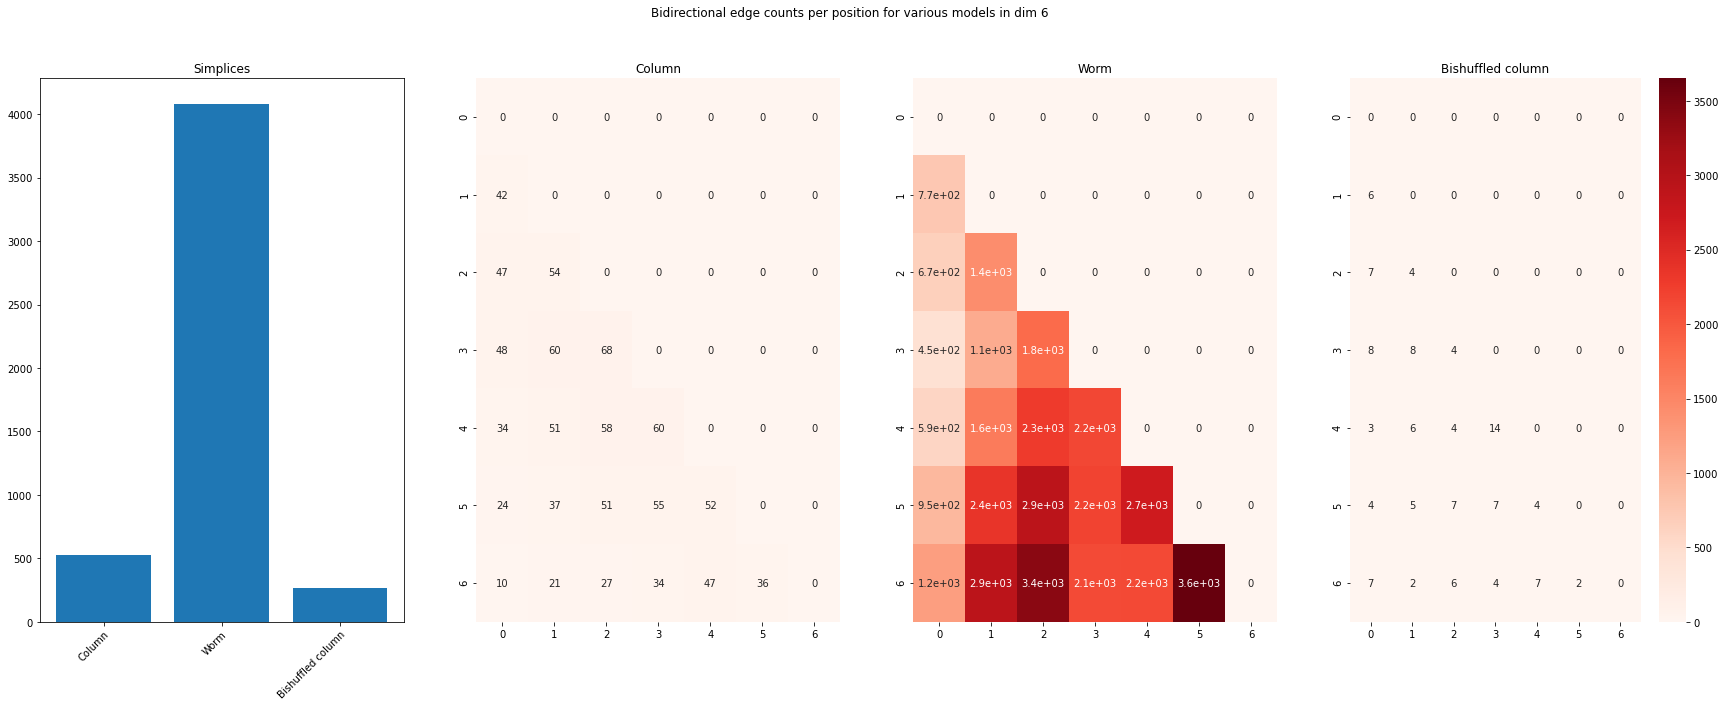

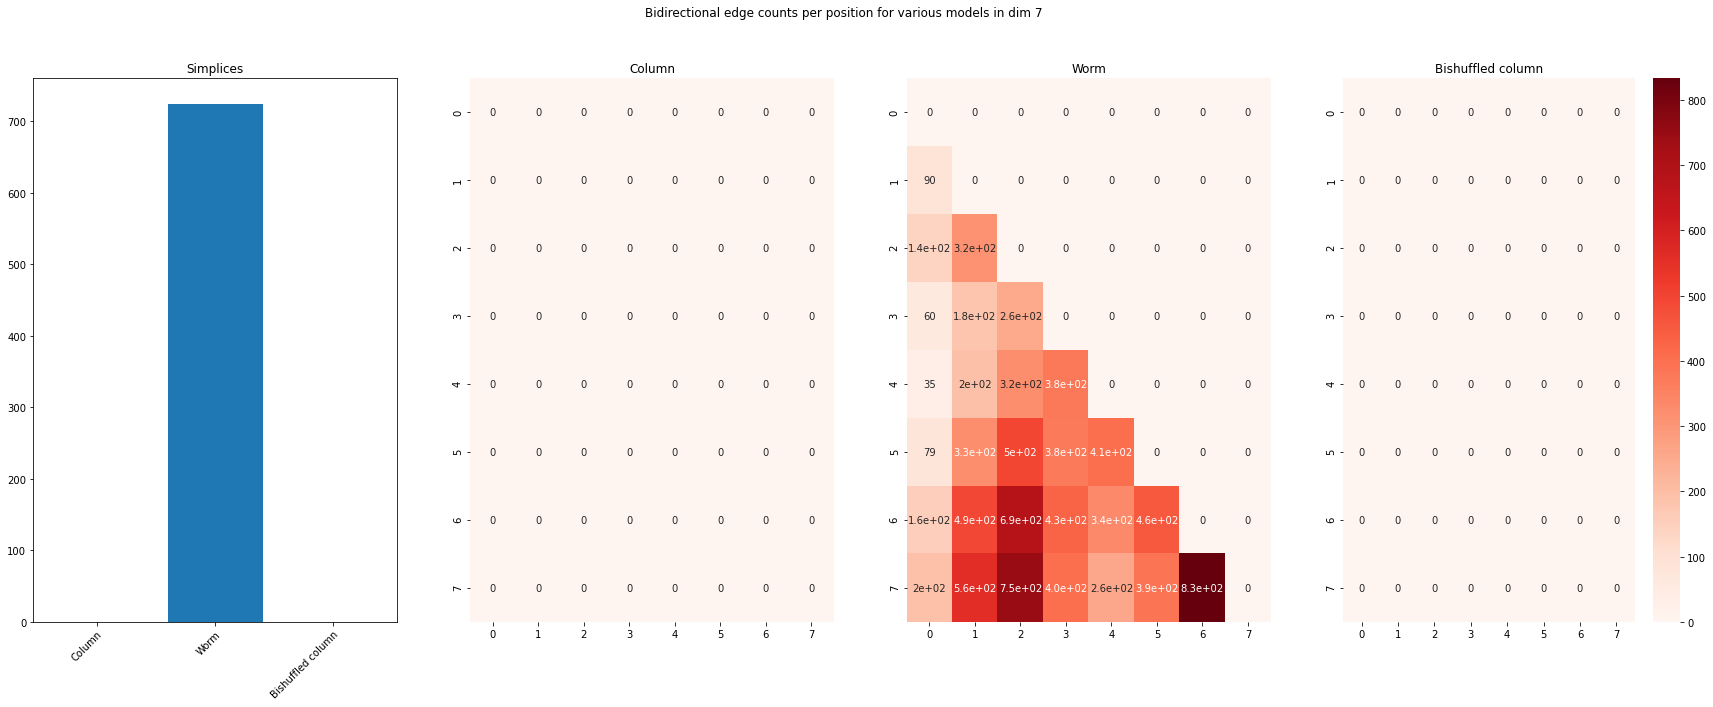

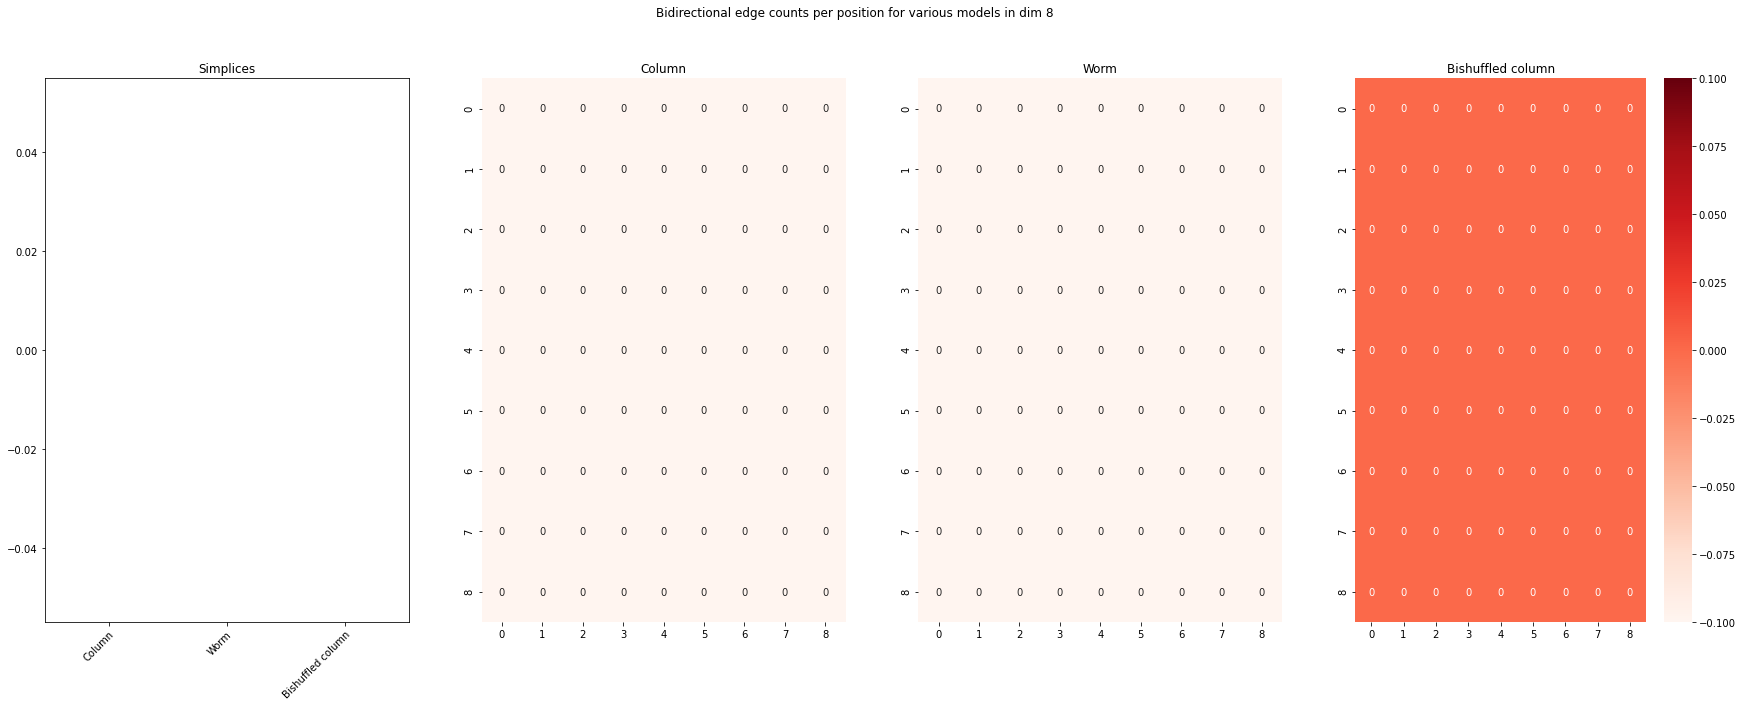

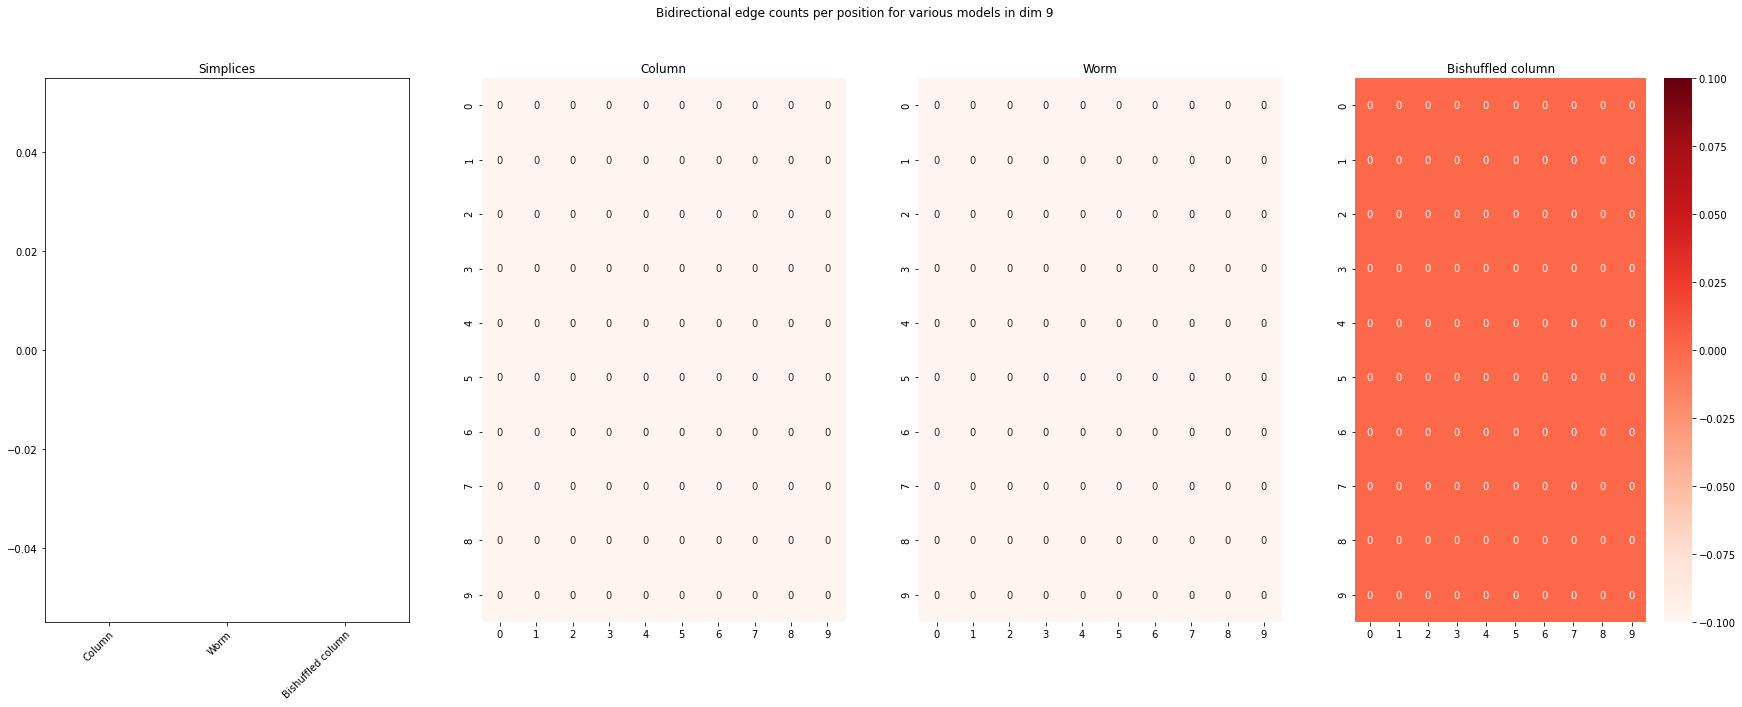

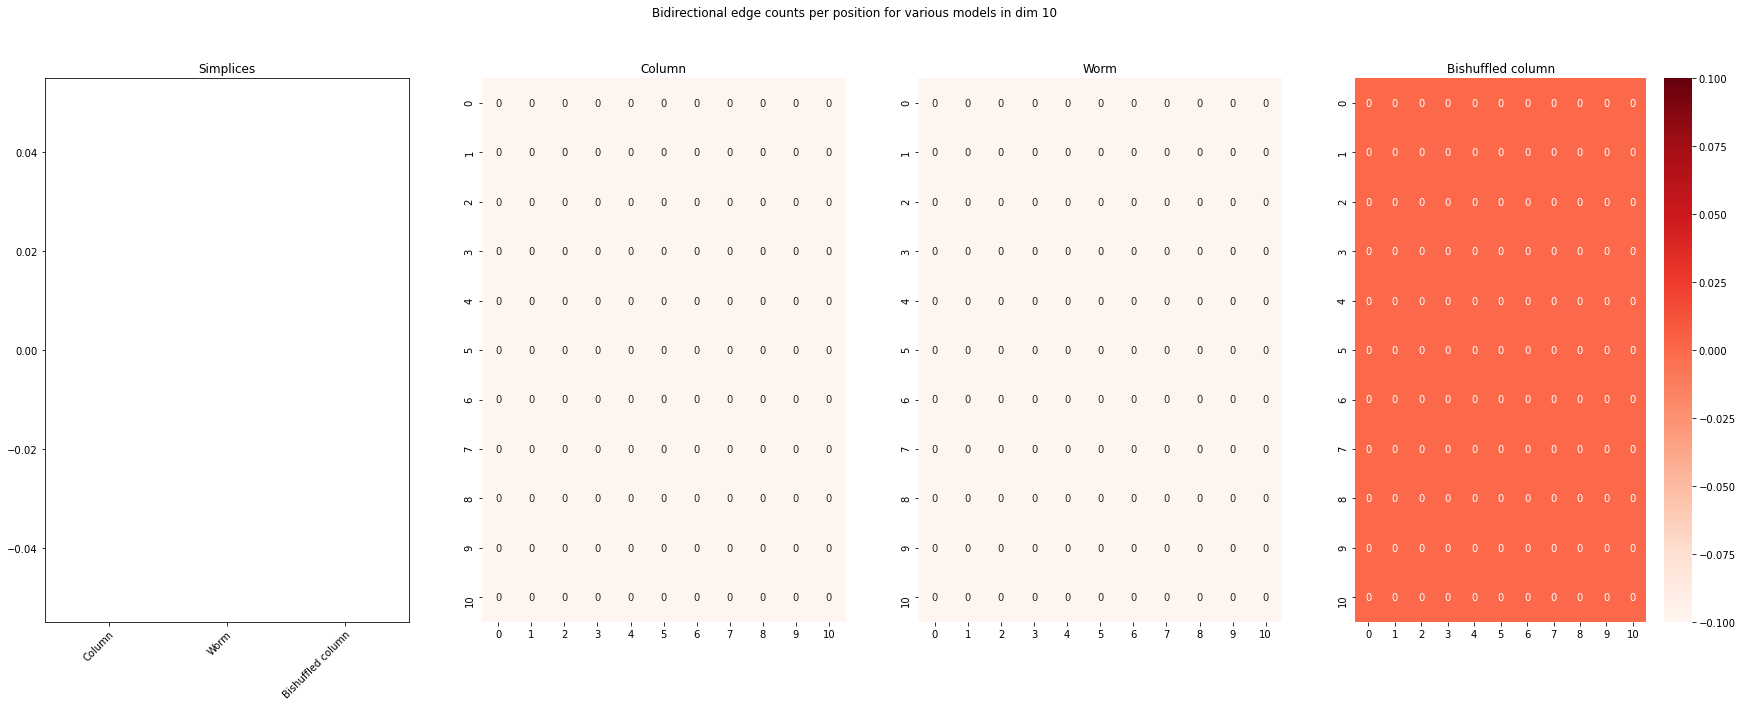

In [17]:
compare_graphs([a,b,c], 1, "worm_bcounts", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

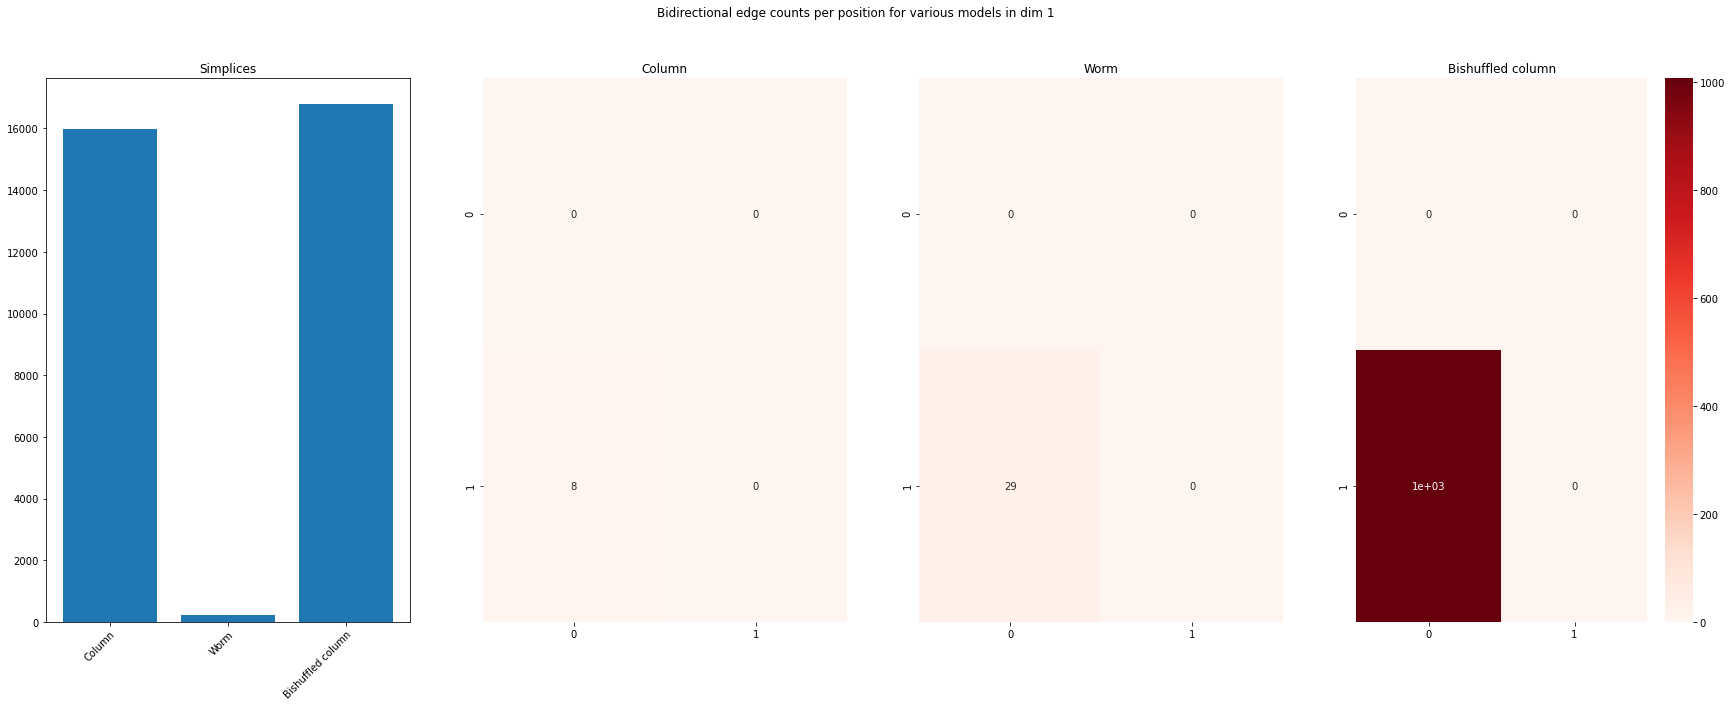

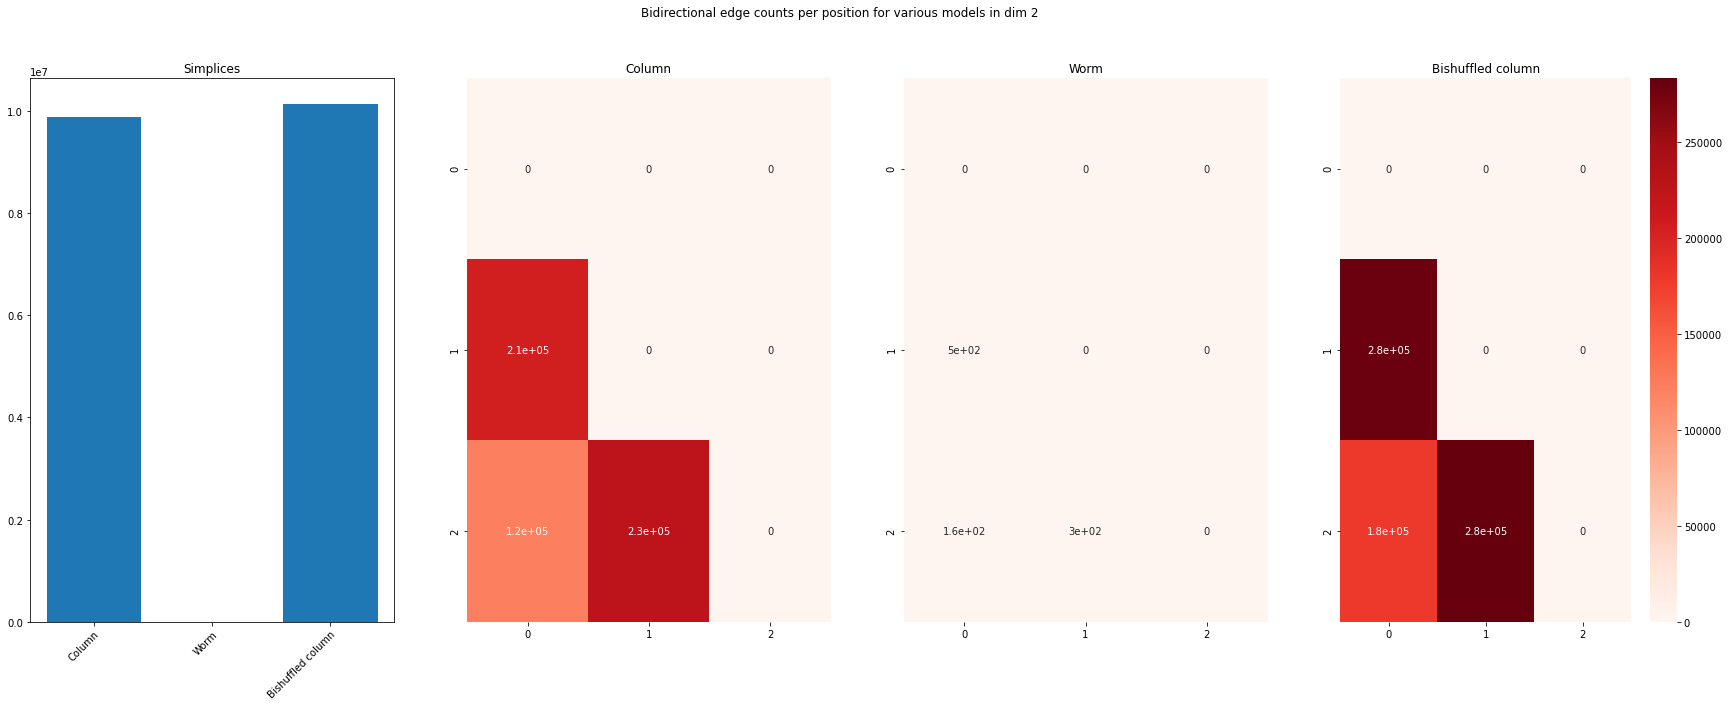

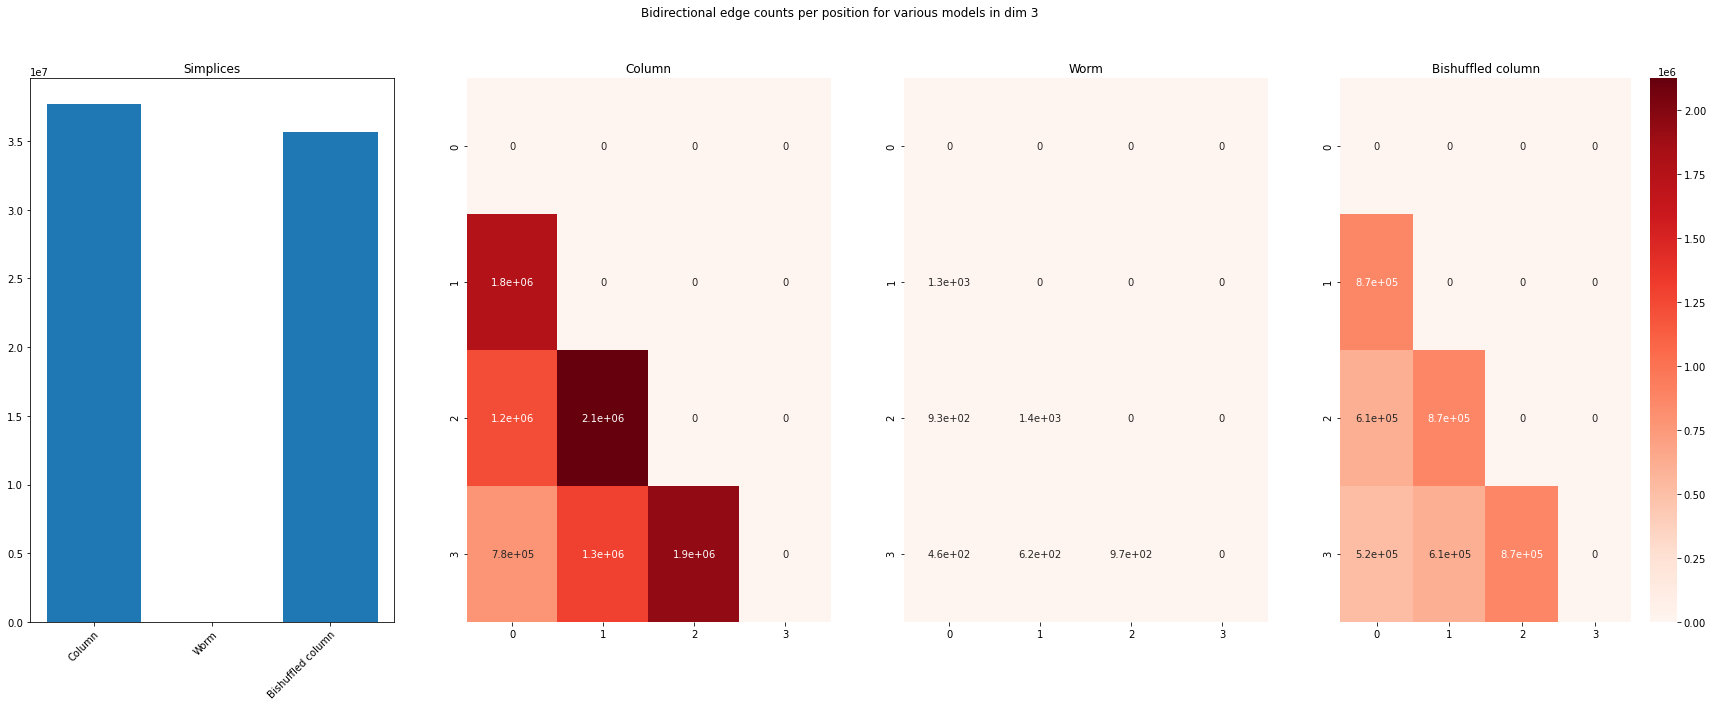

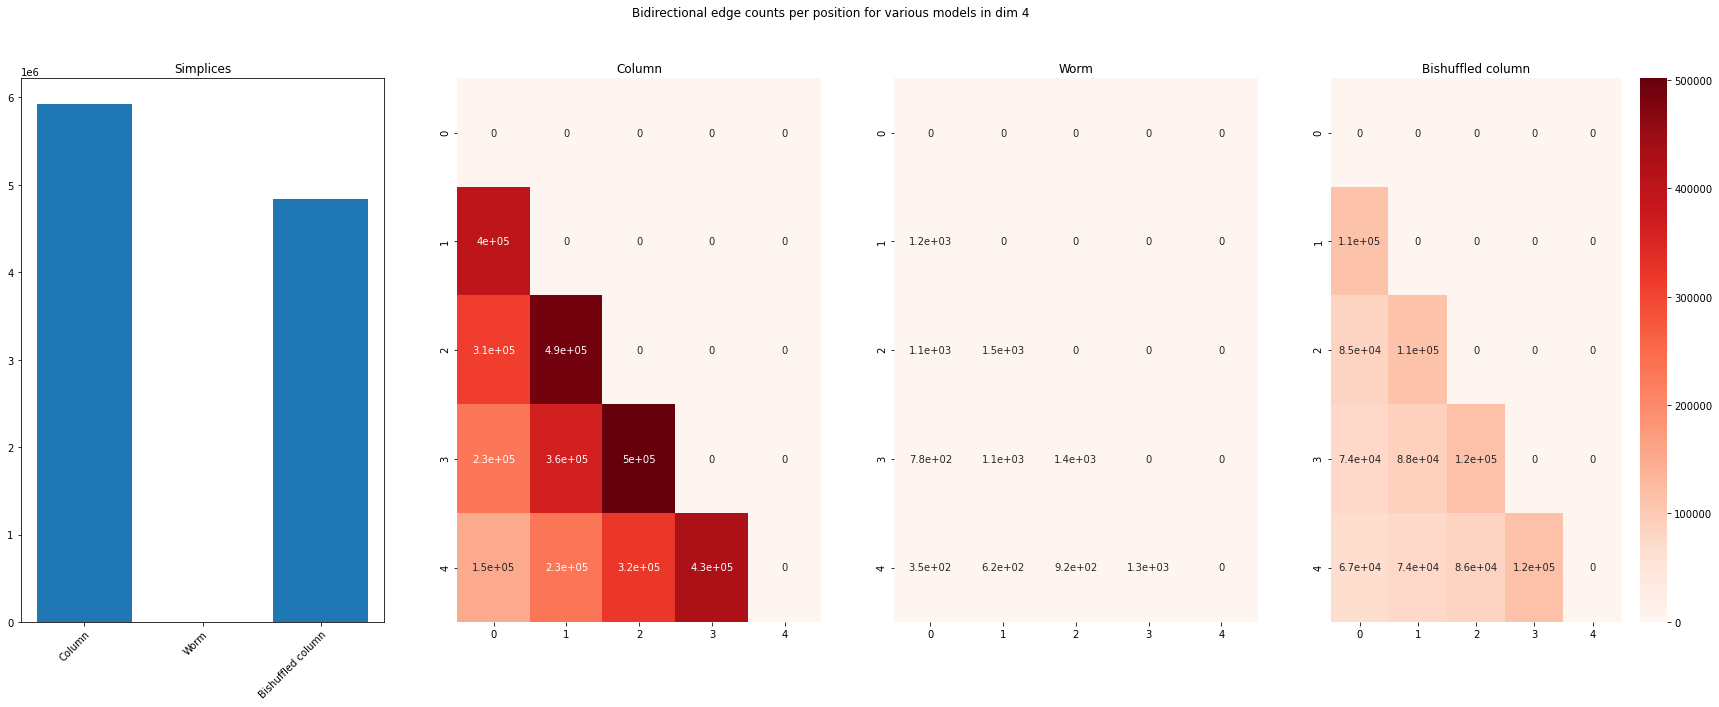

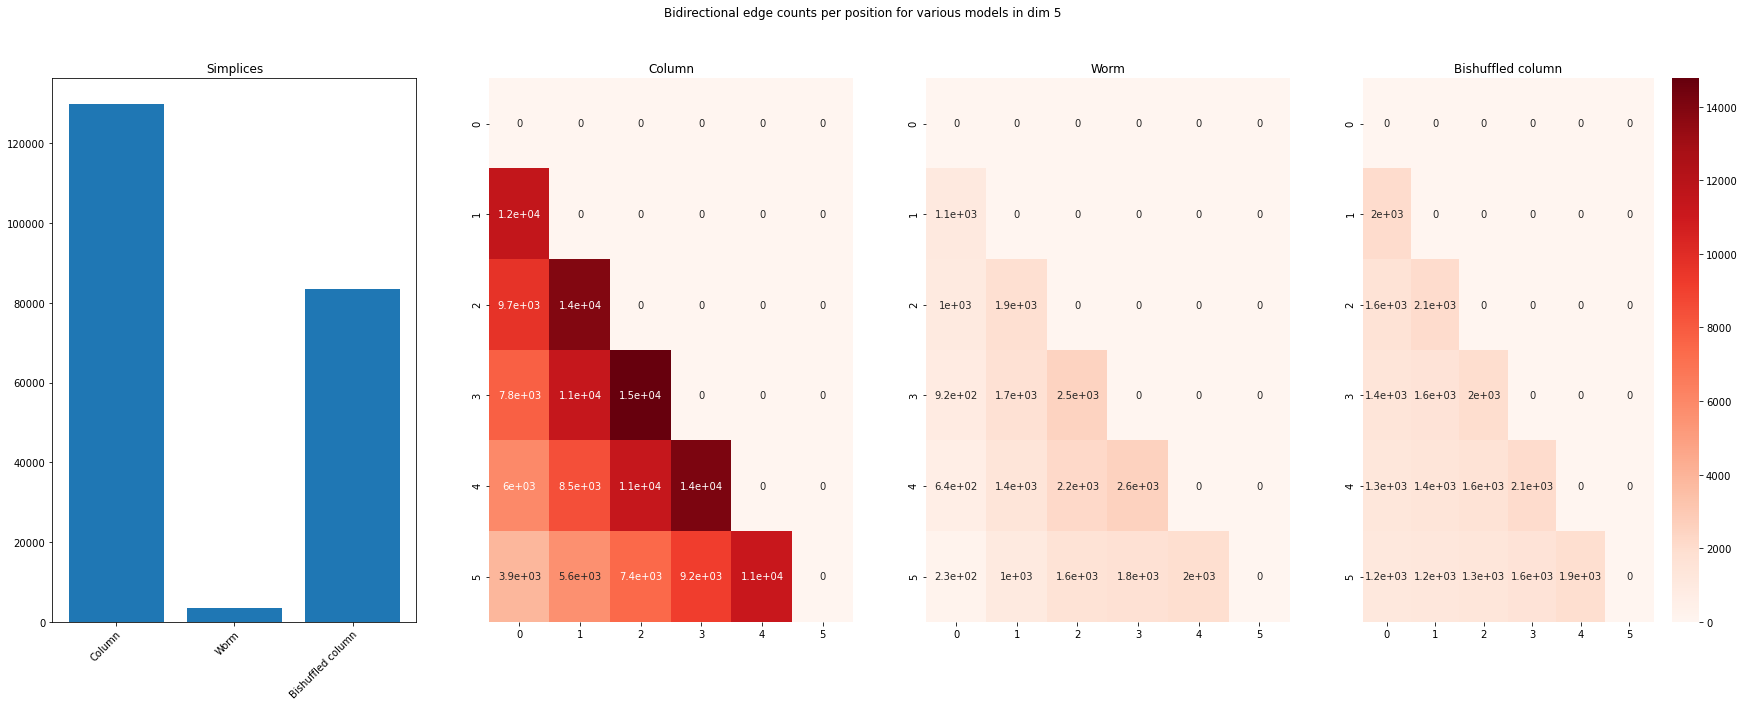

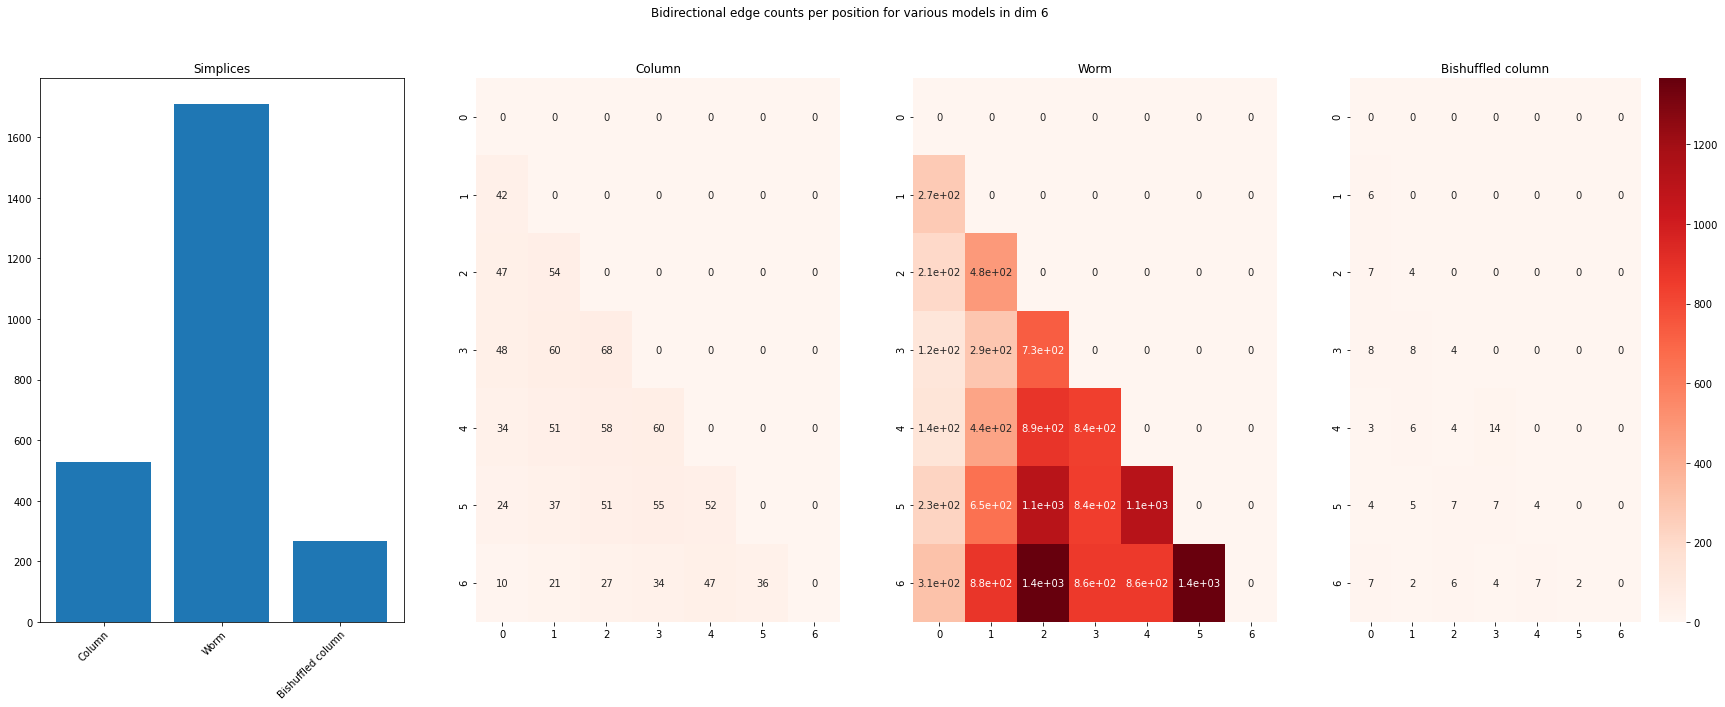

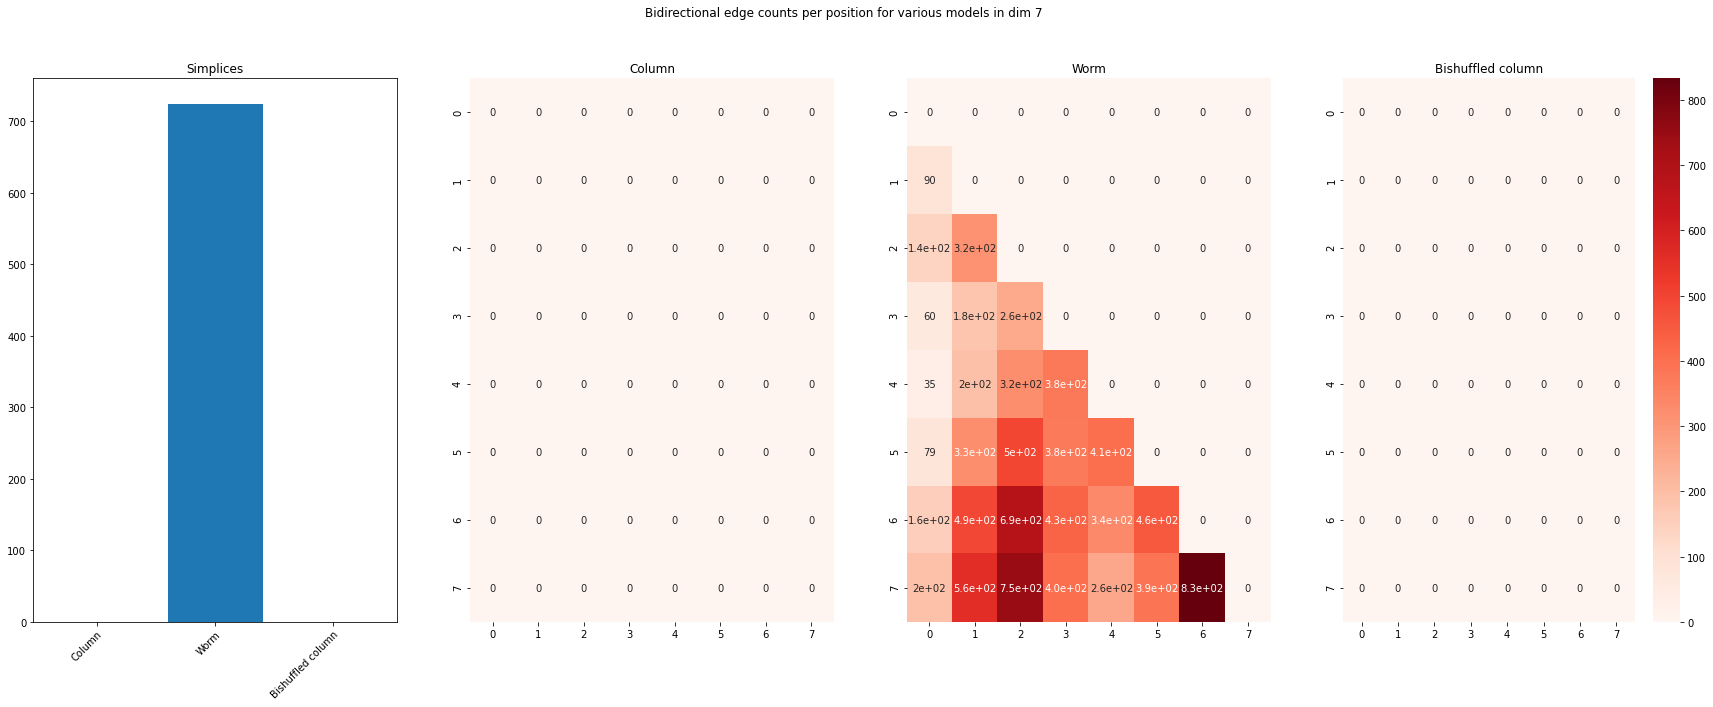

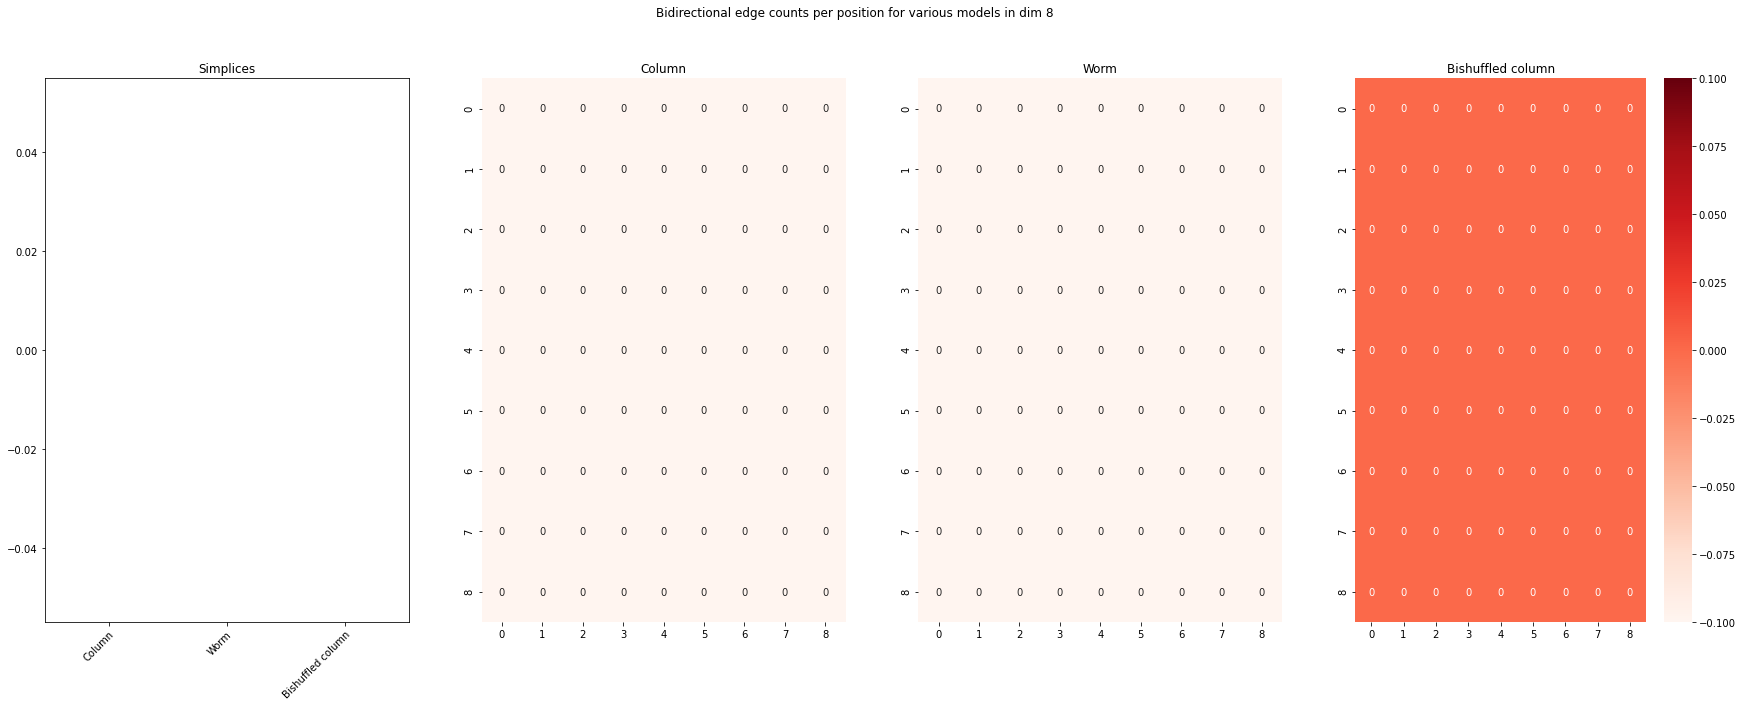

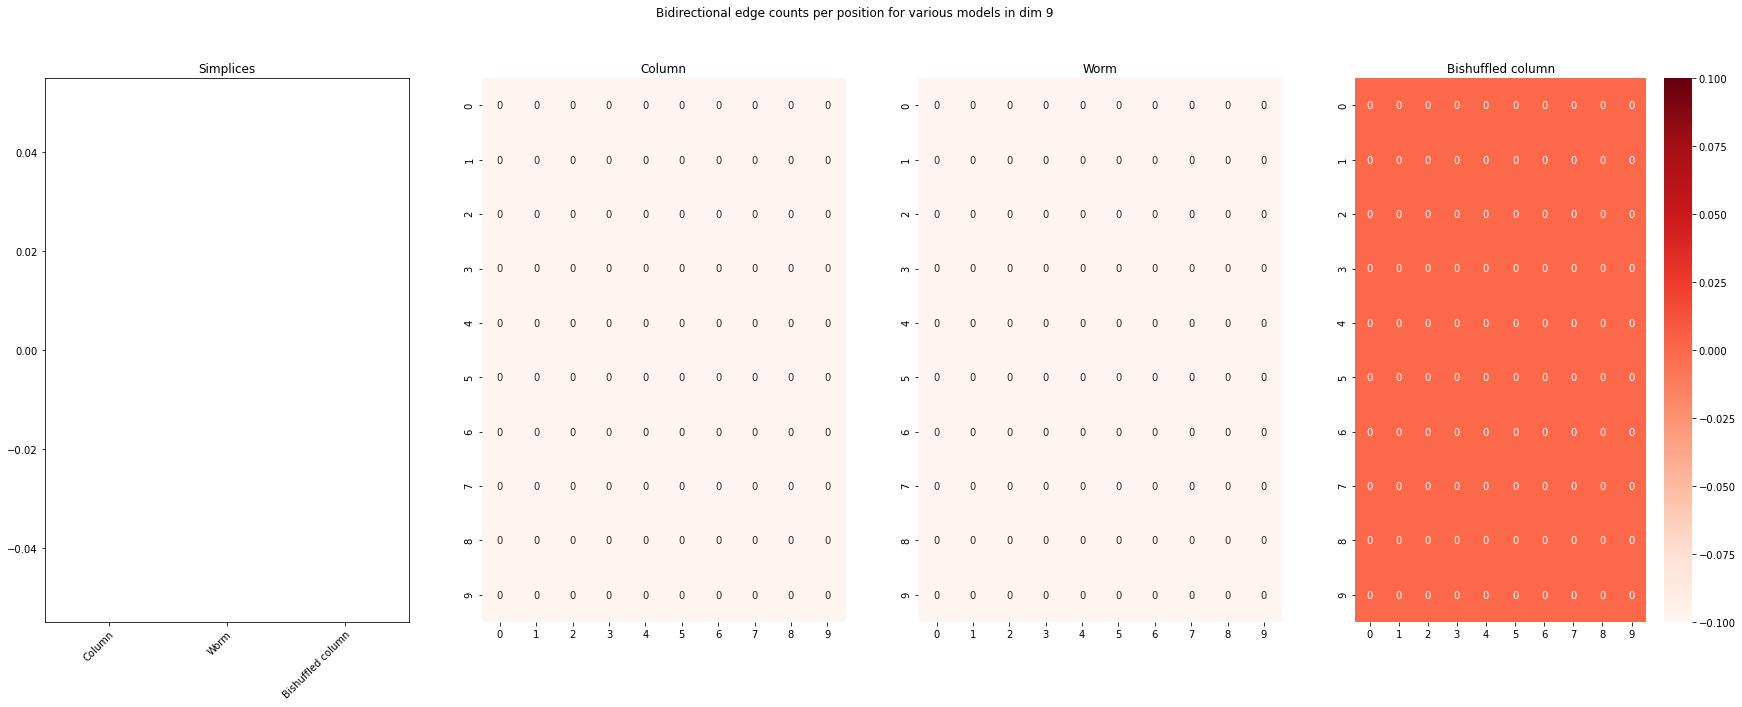

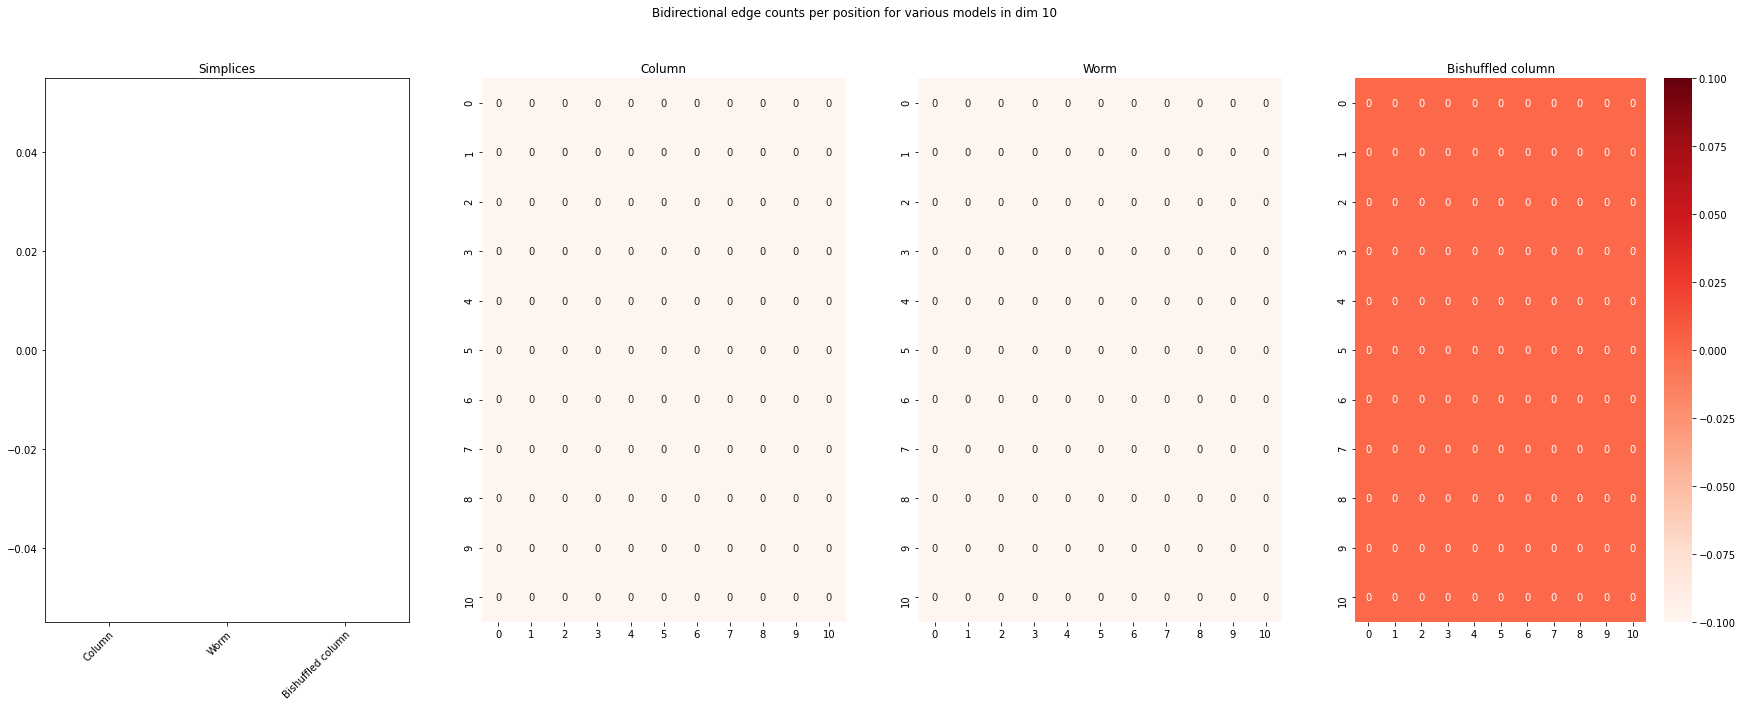

In [18]:
compare_graphs([amax,bmax,cmax], 1, "worm_mbcounts", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

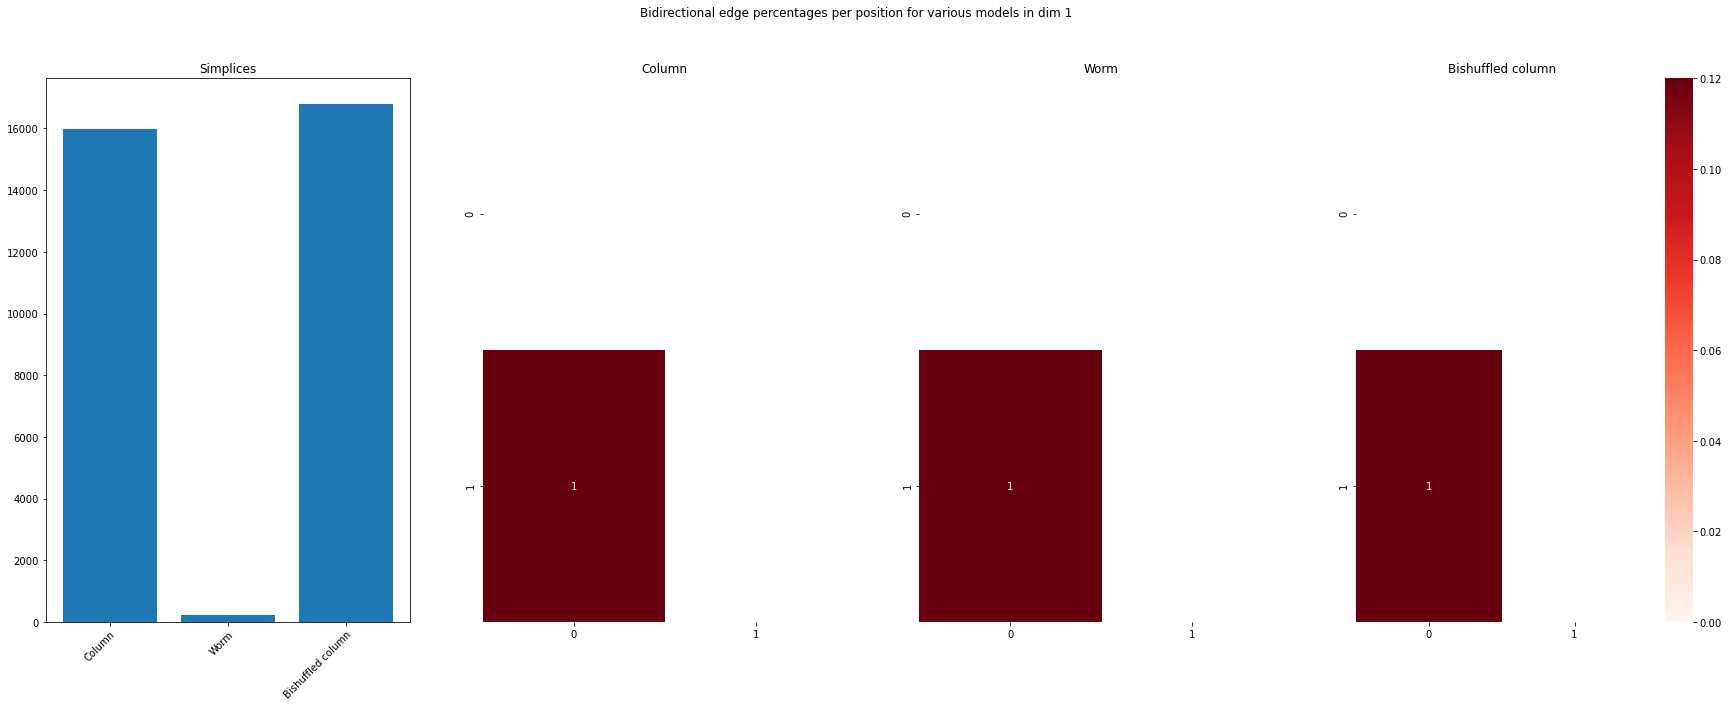

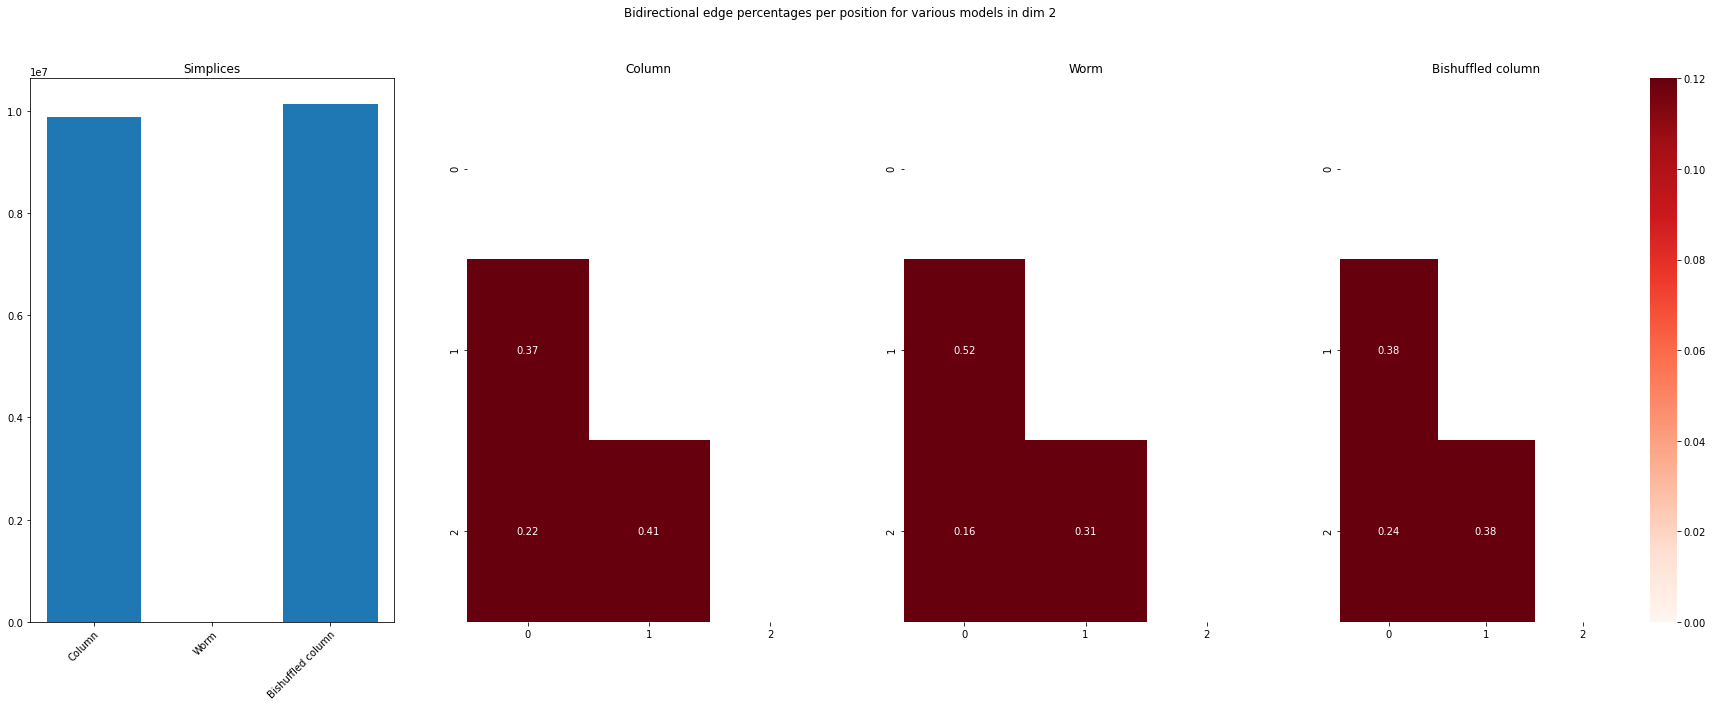

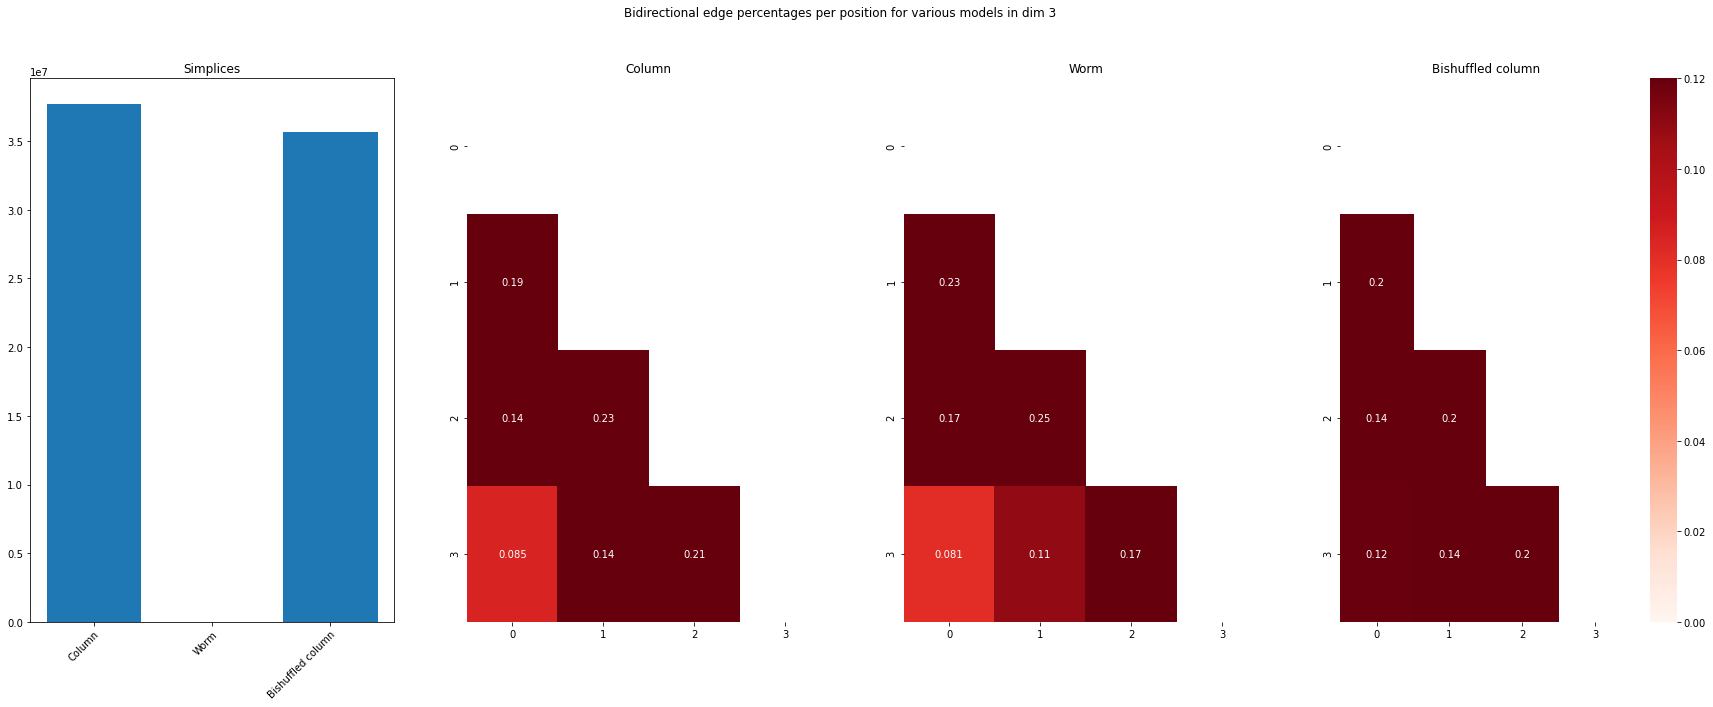

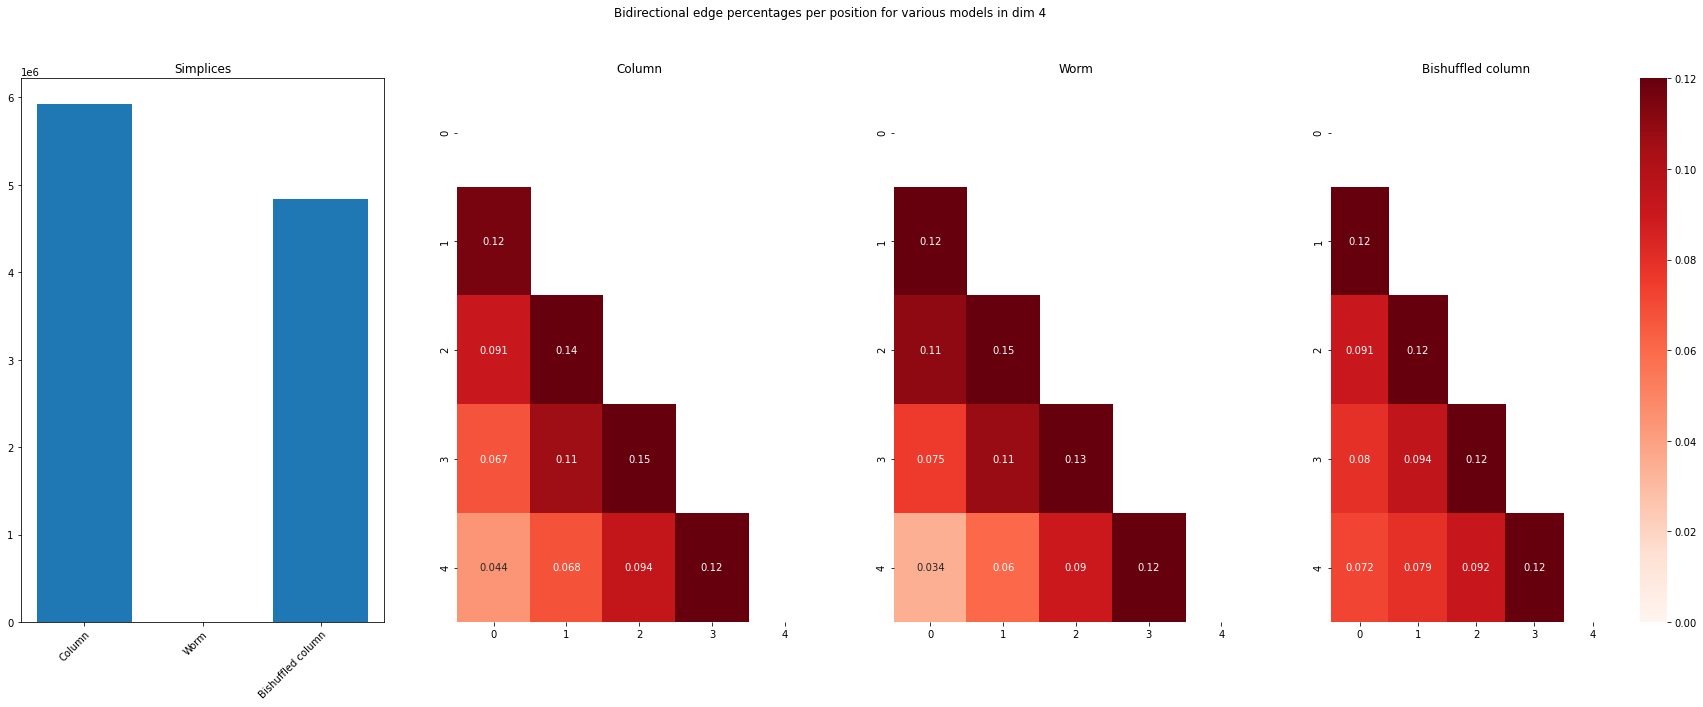

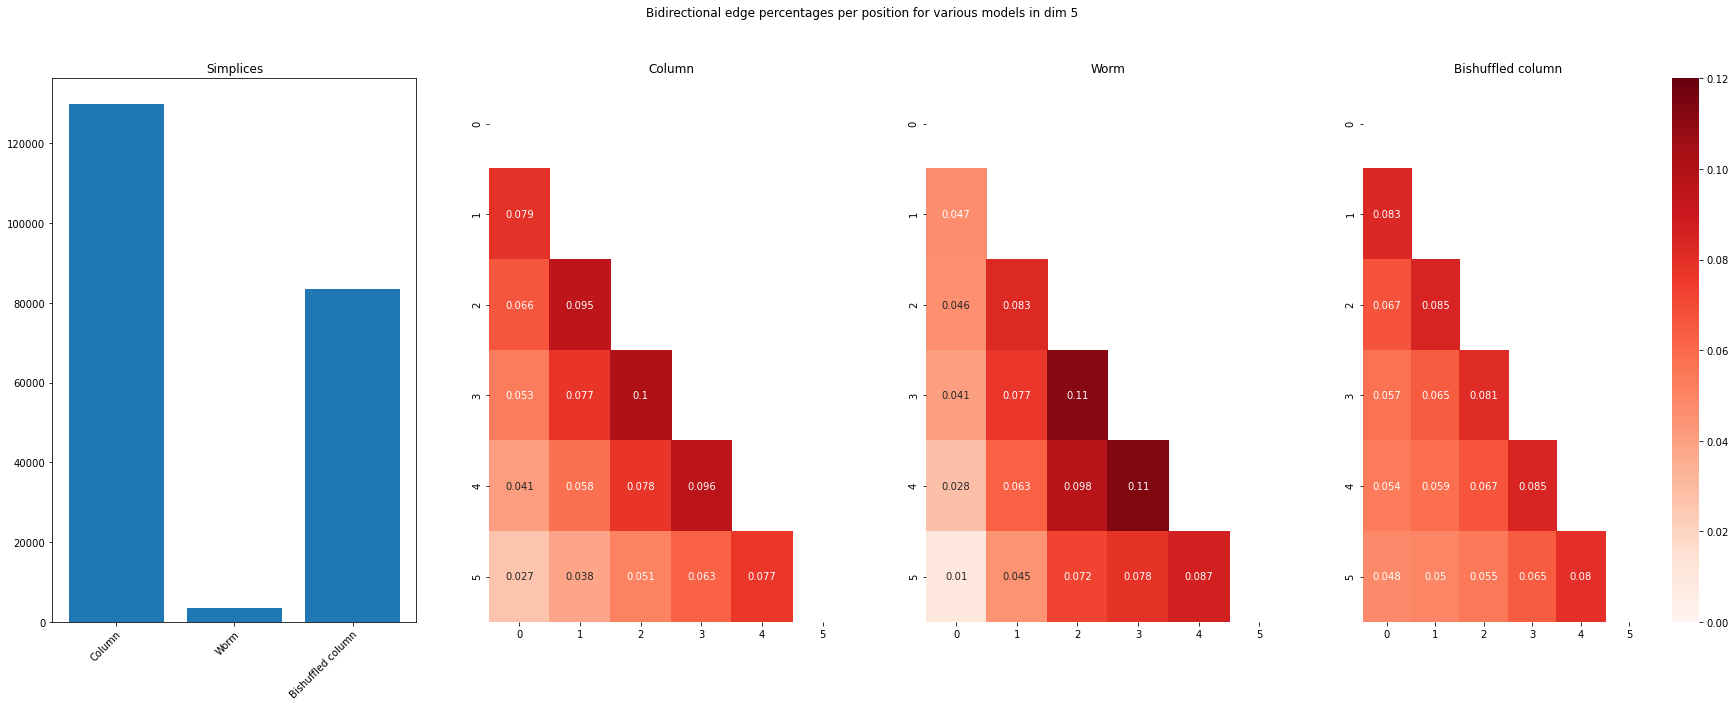

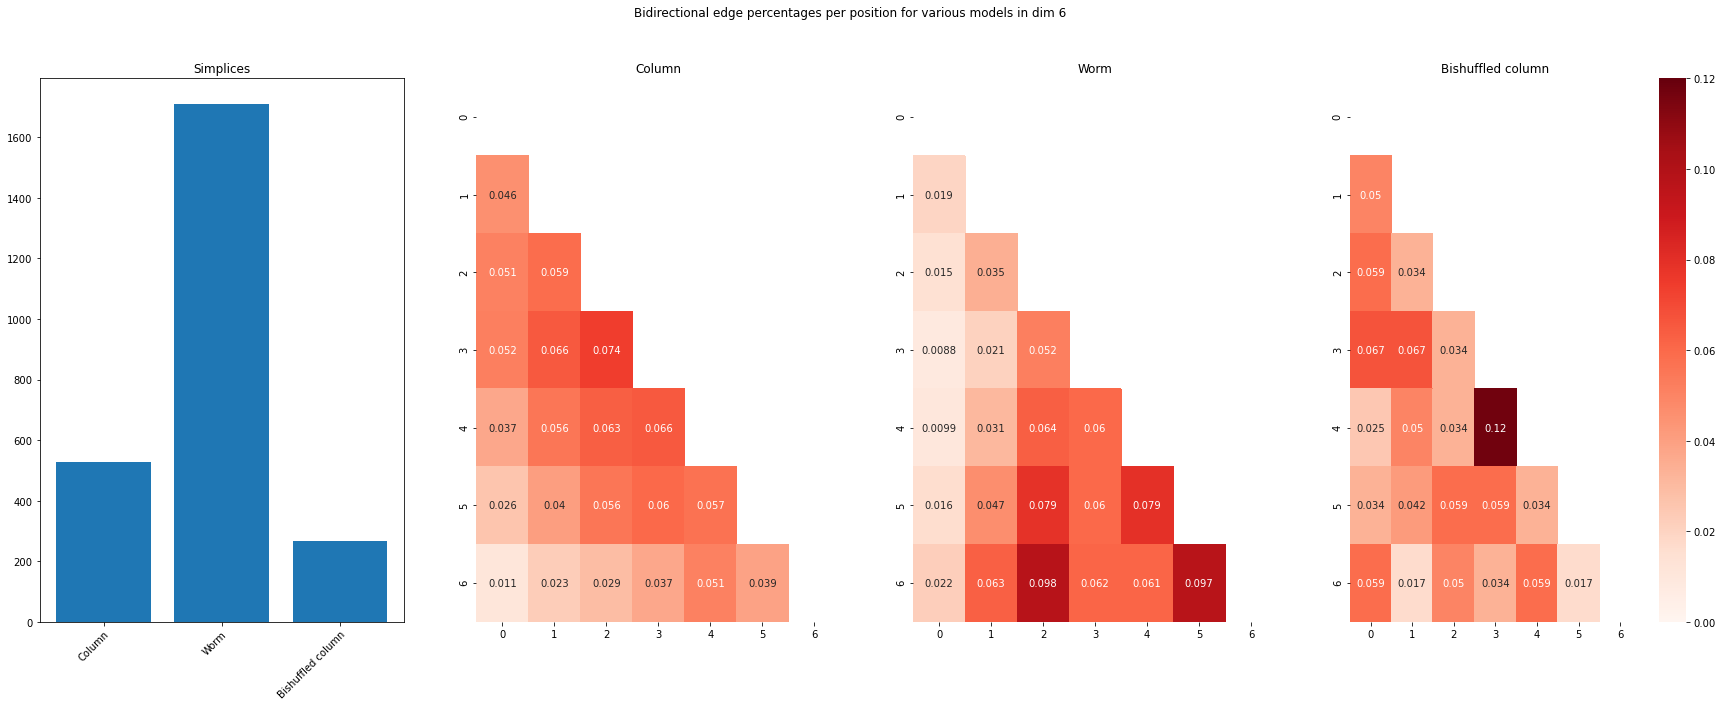

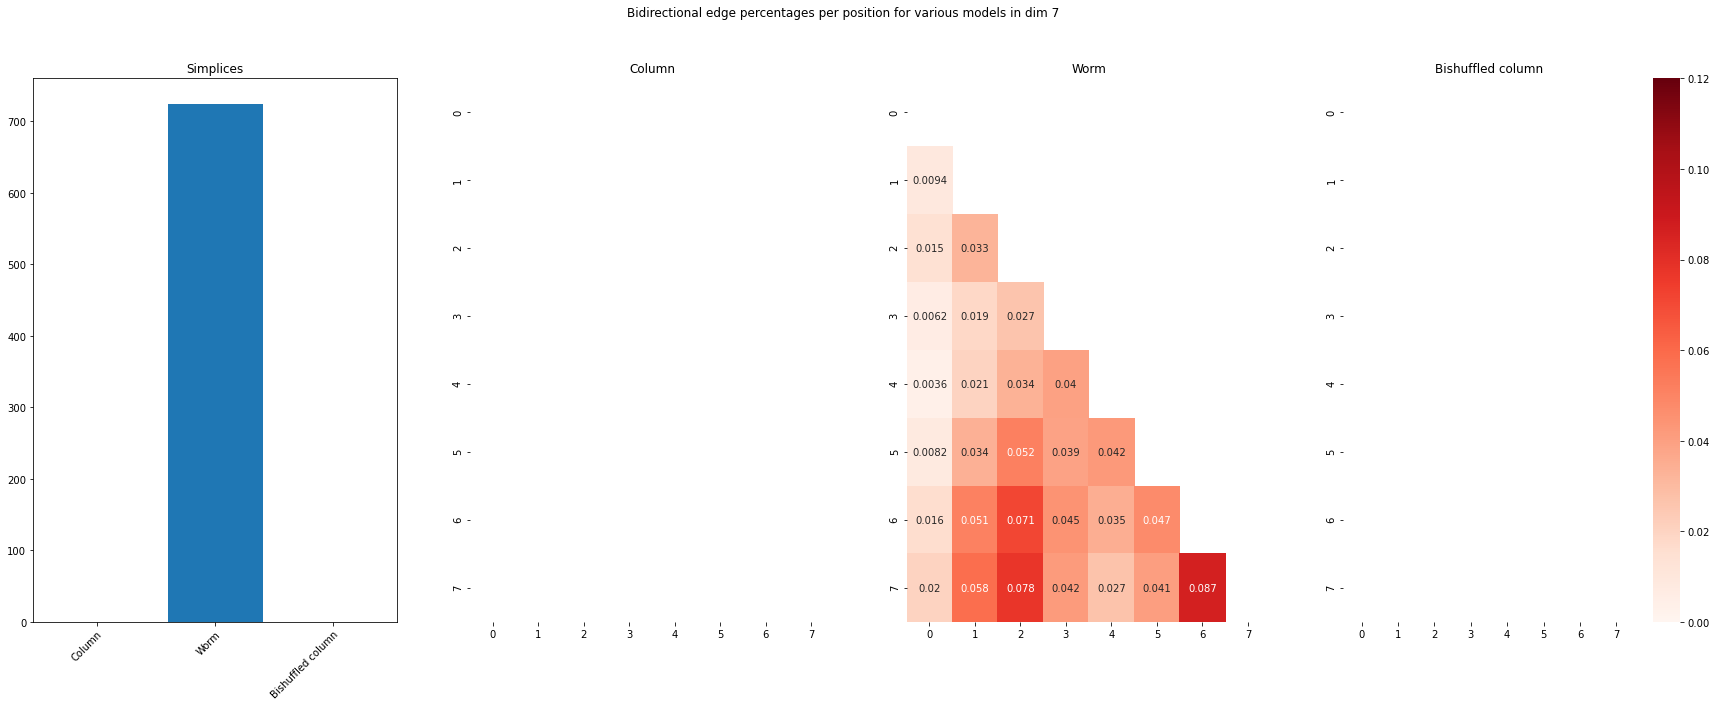

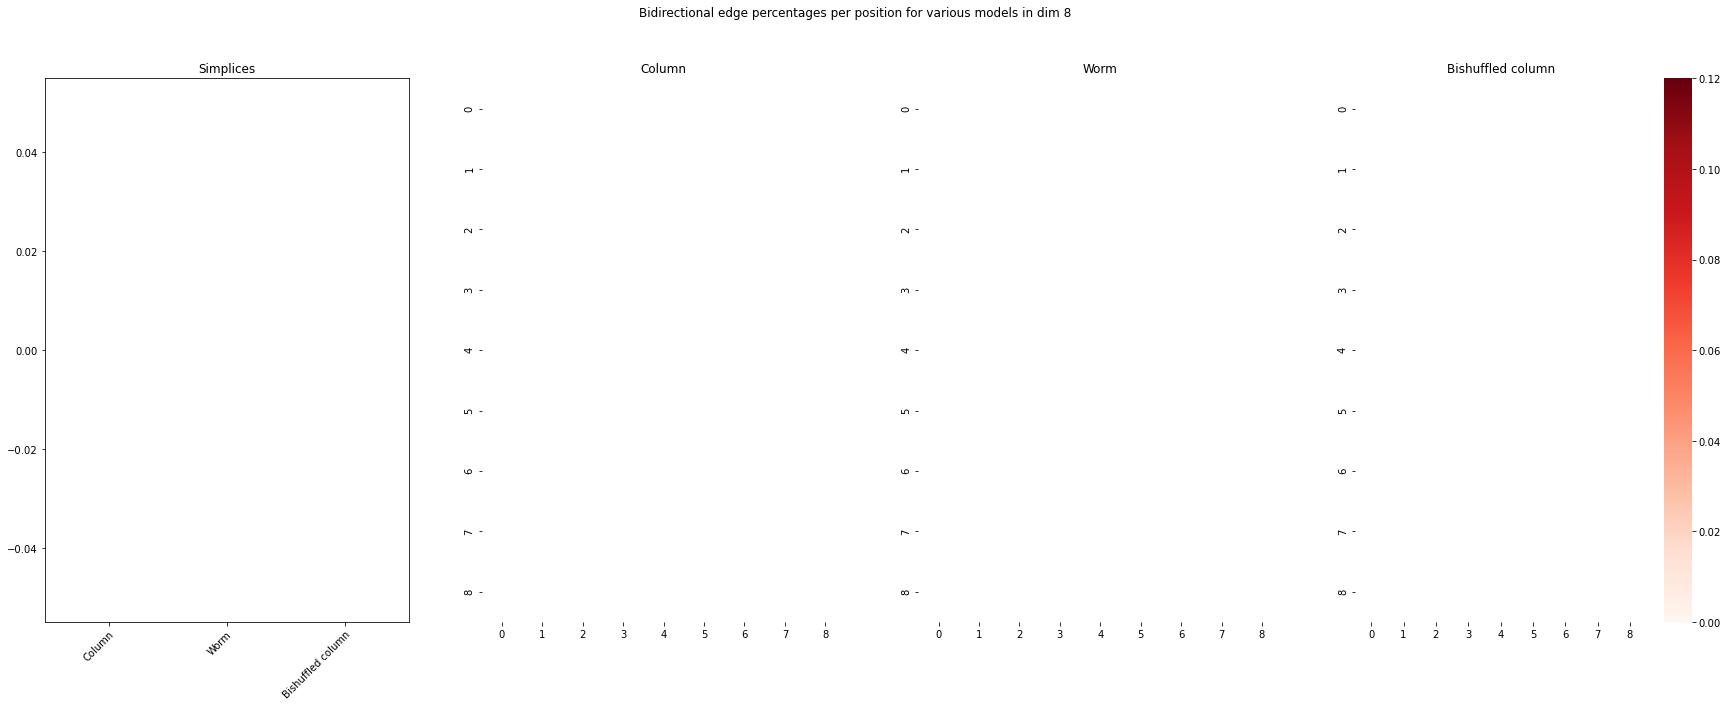

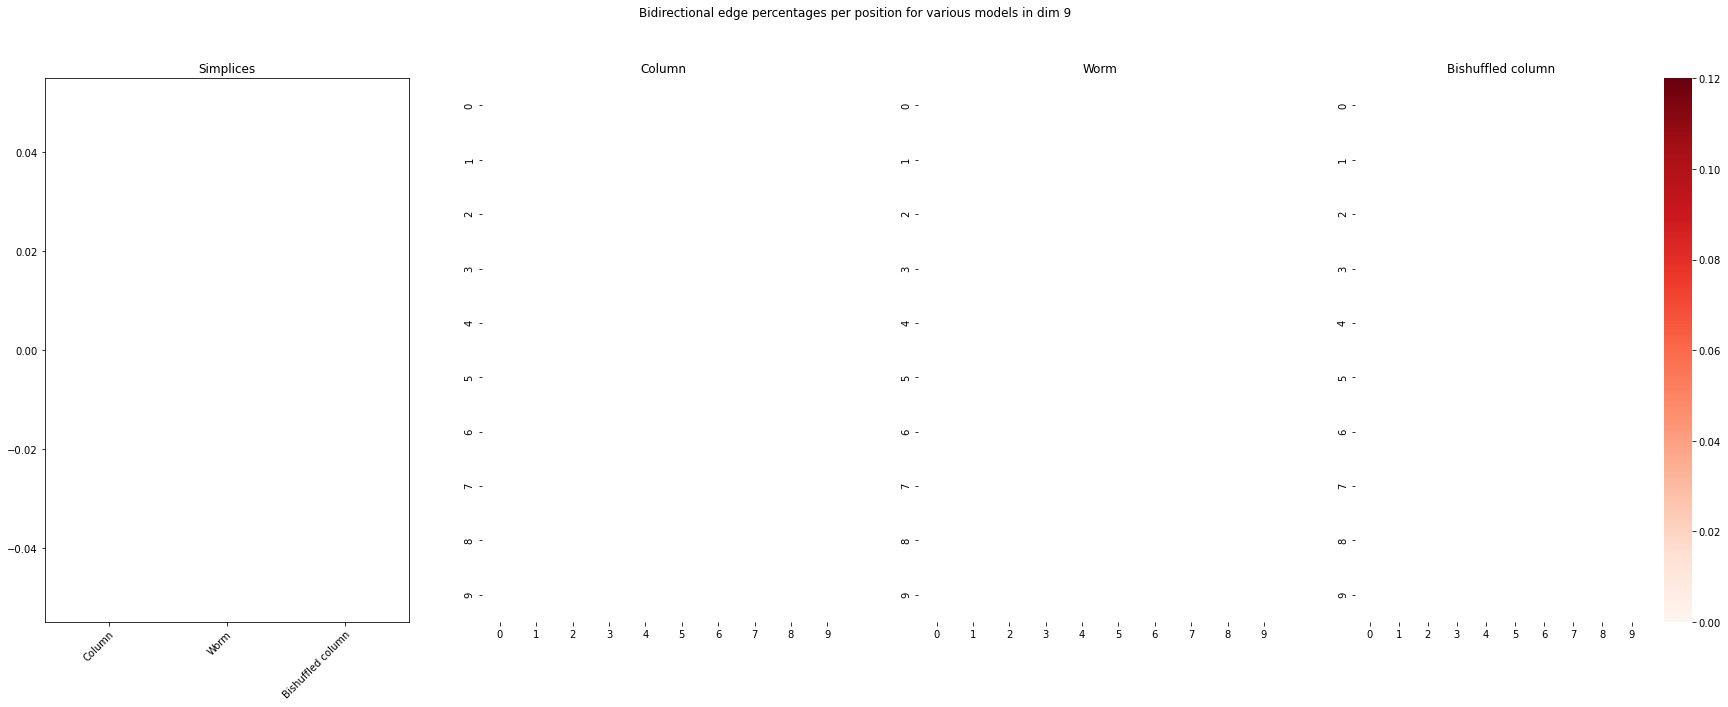

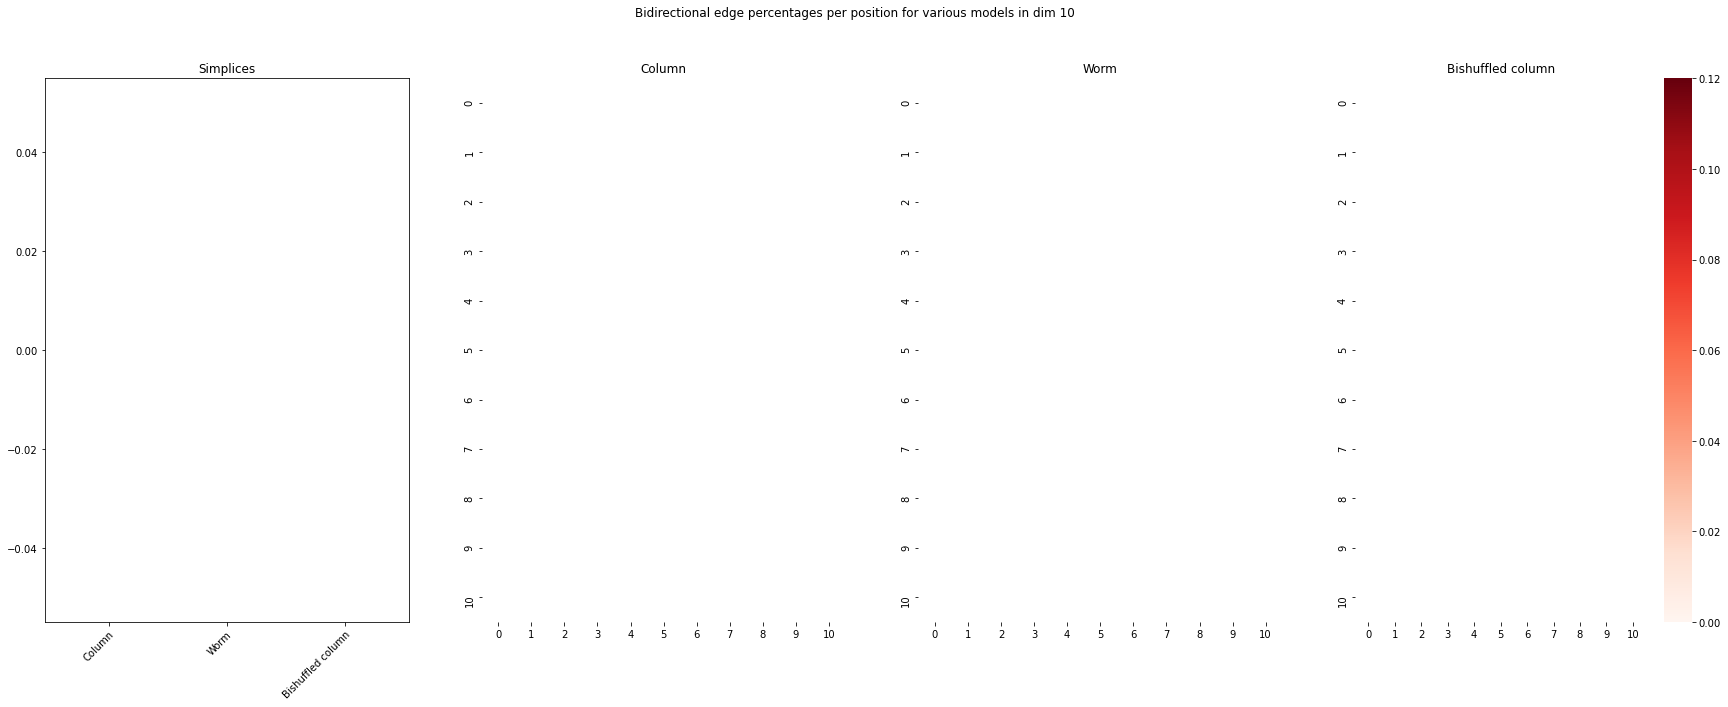

In [19]:
compare_graphs_percent([amax,bmax,cmax], 1, "worm_mbcounts_percent", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

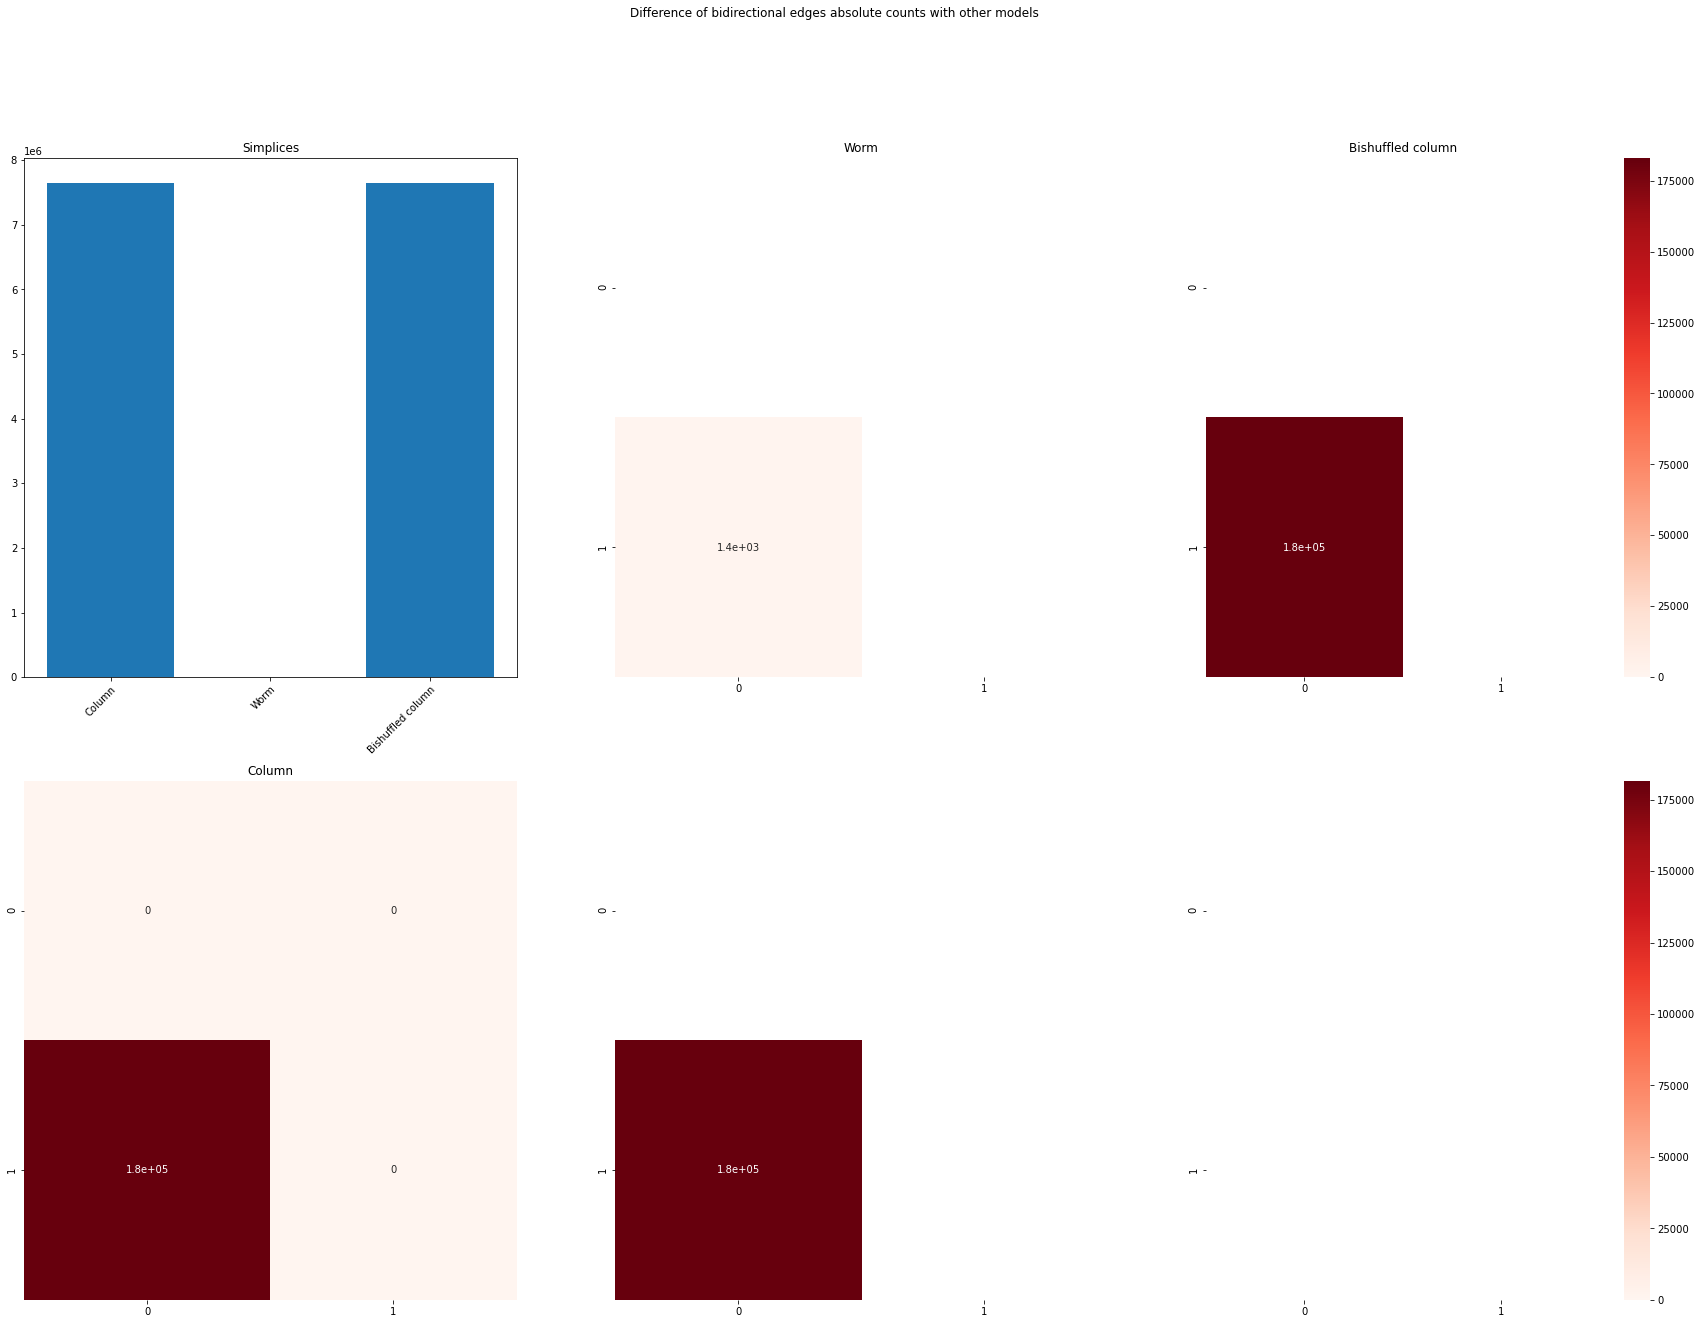

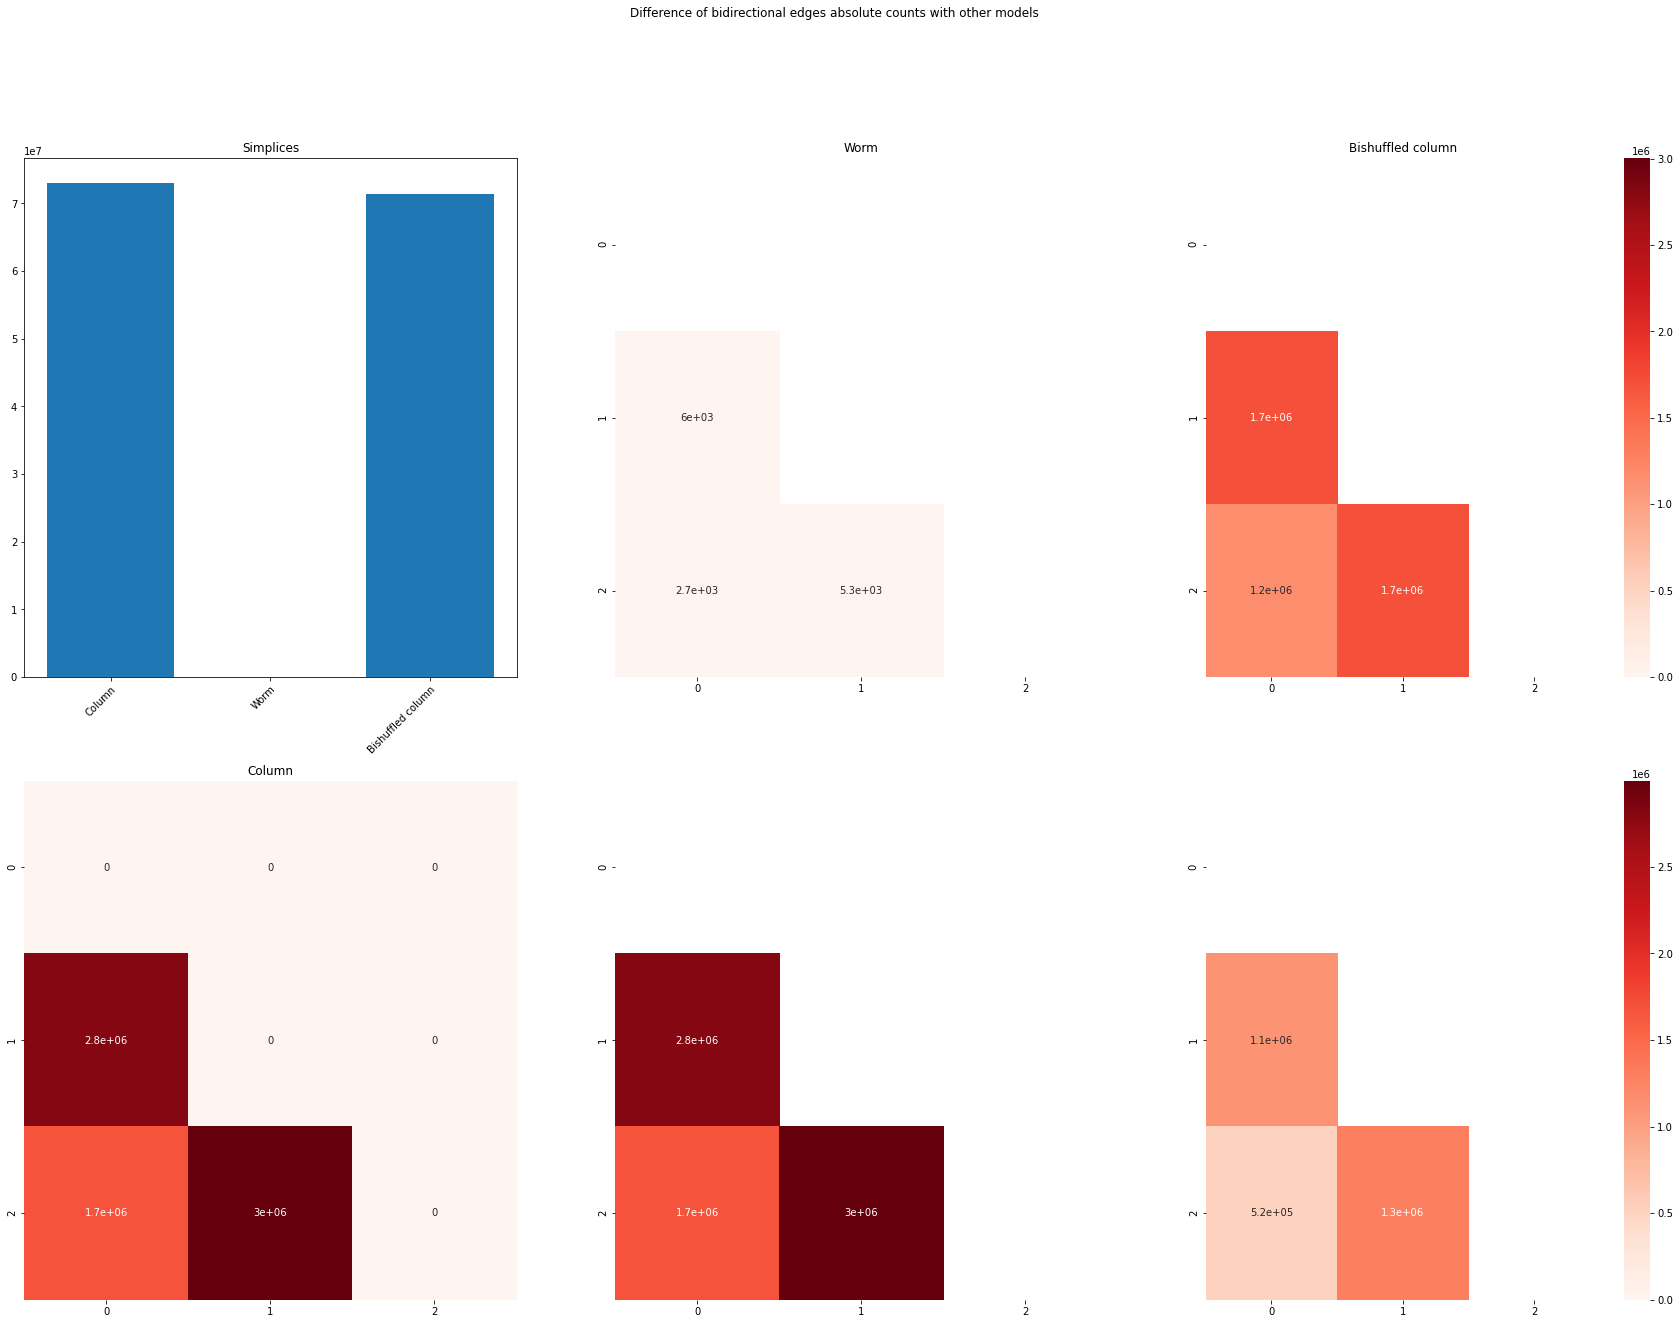

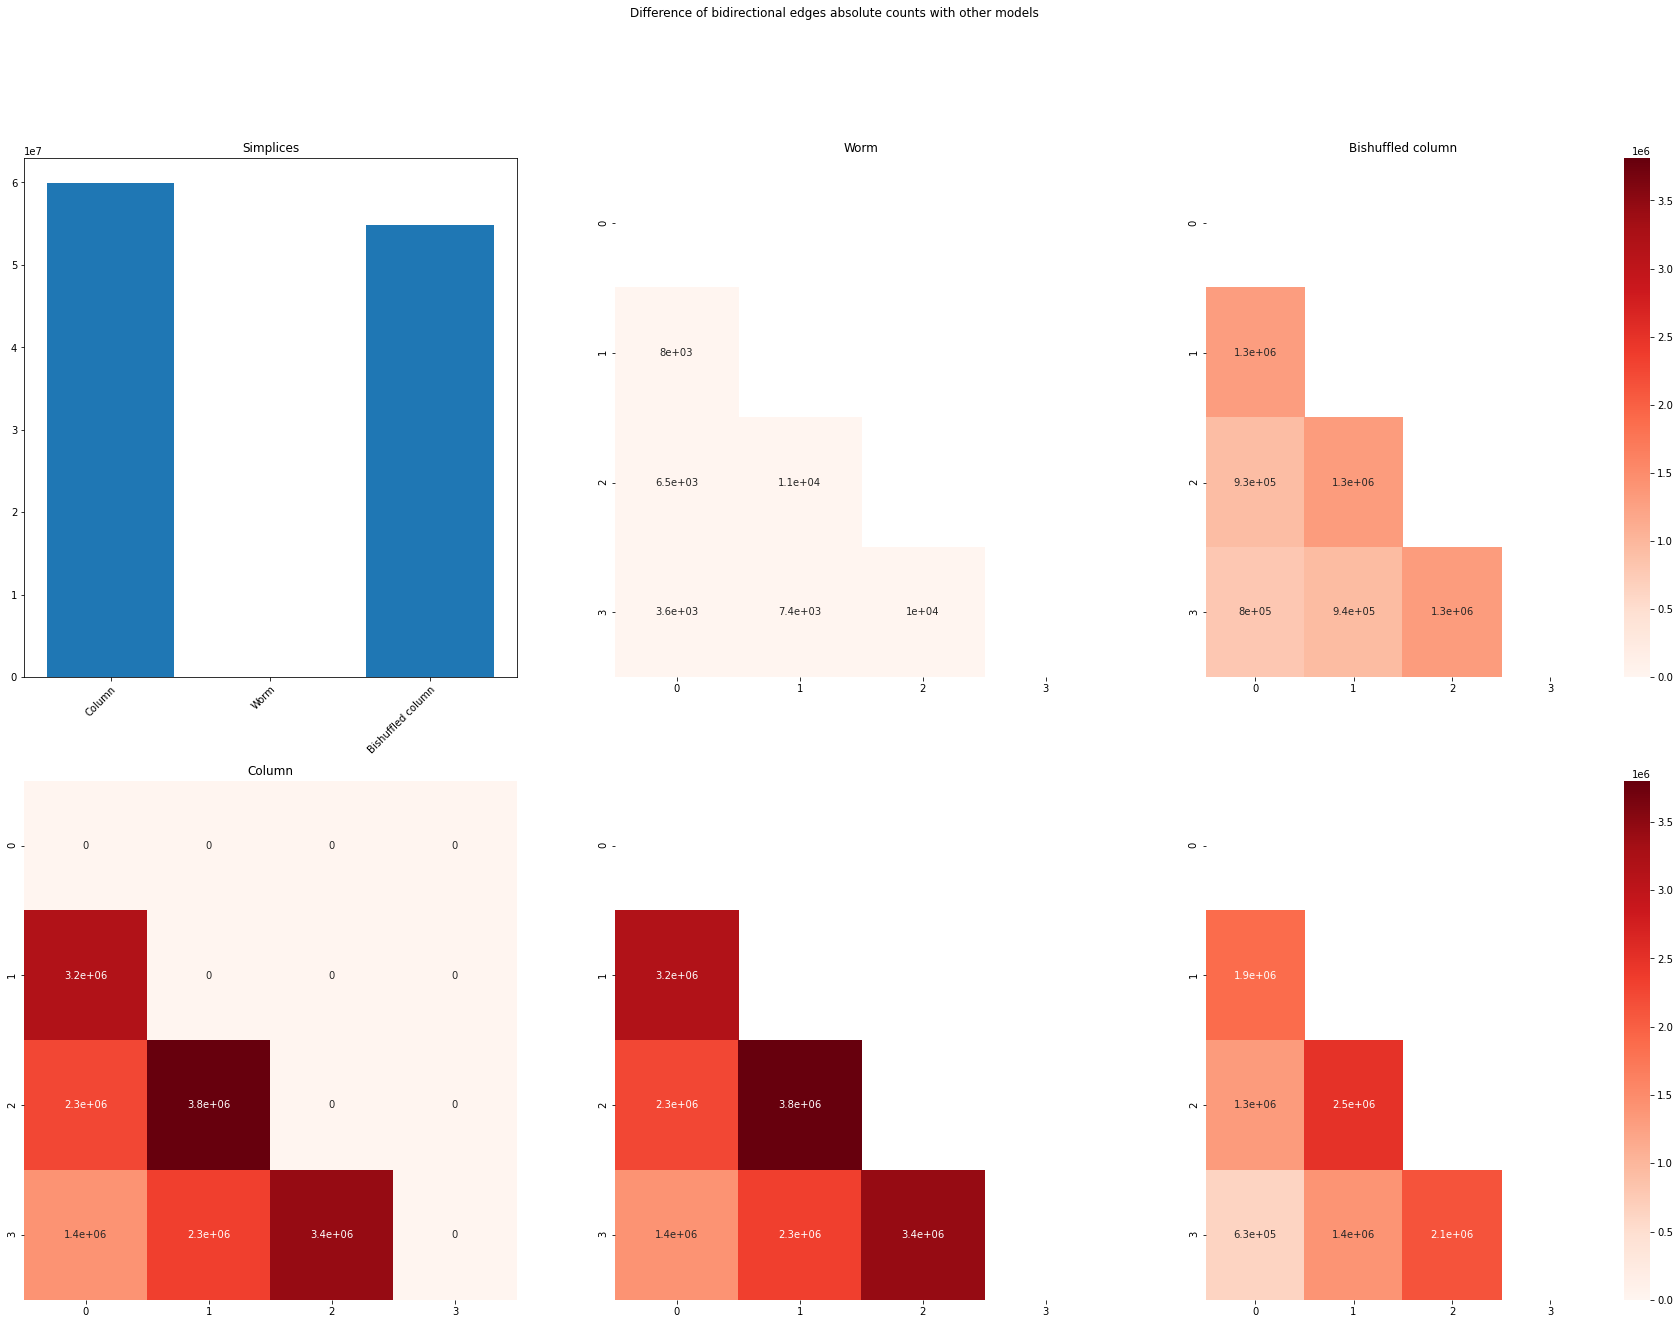

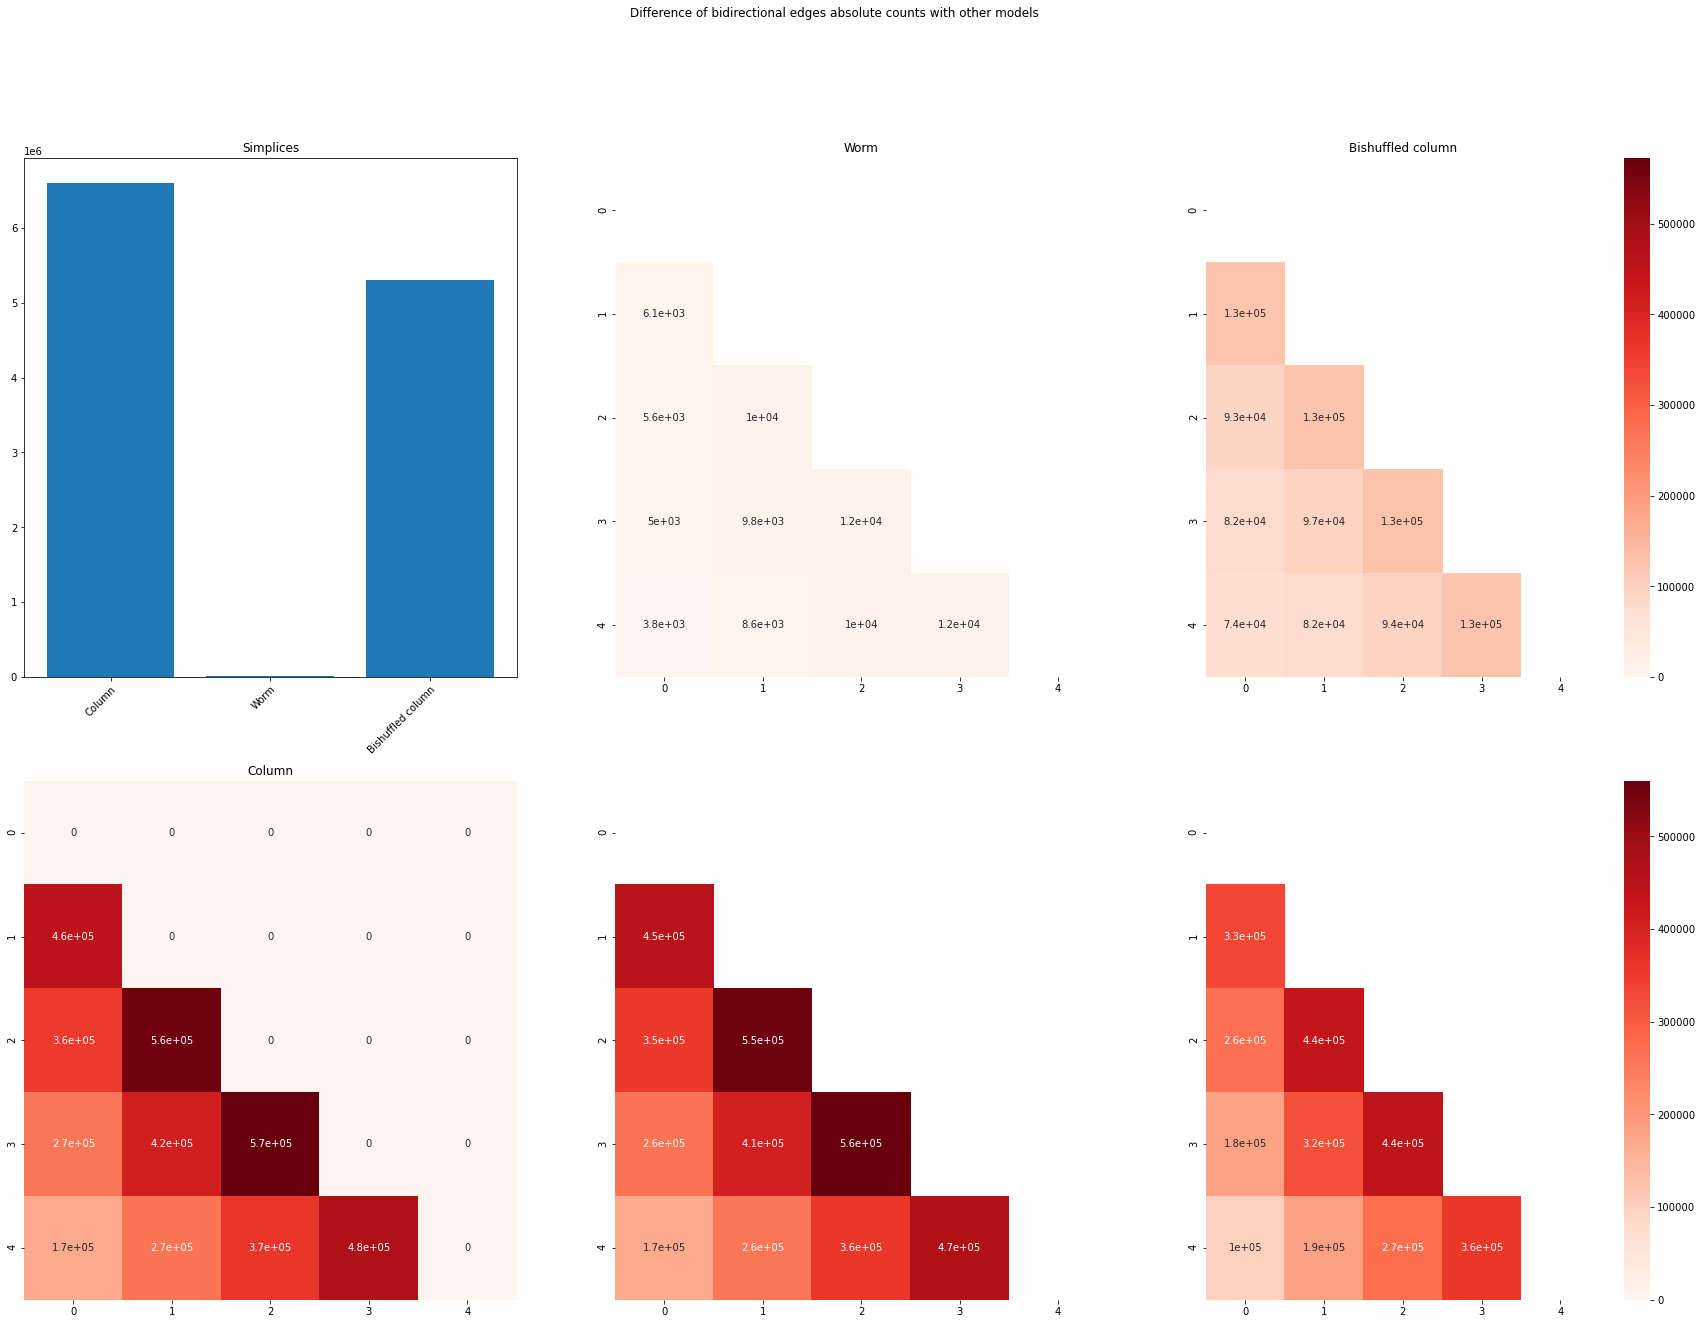

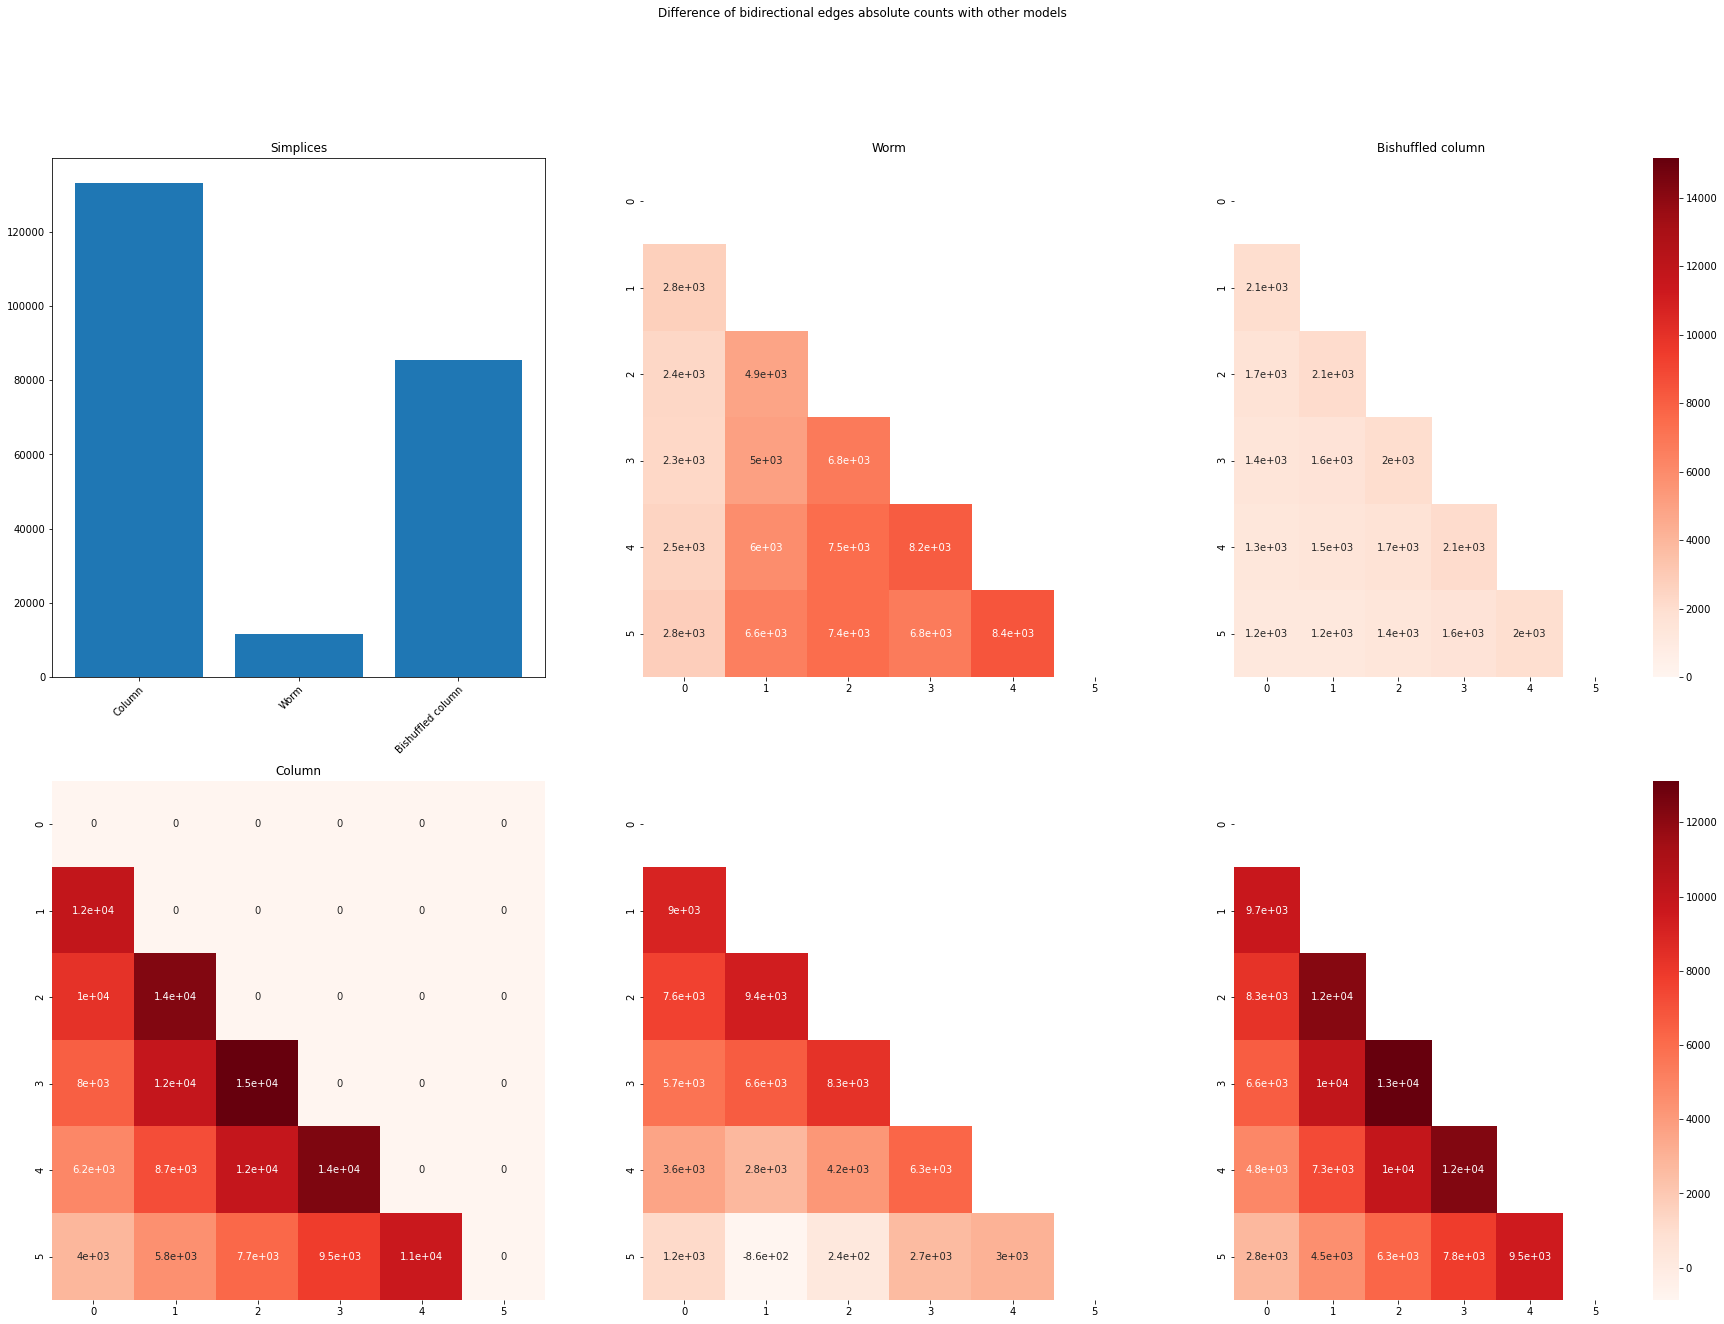

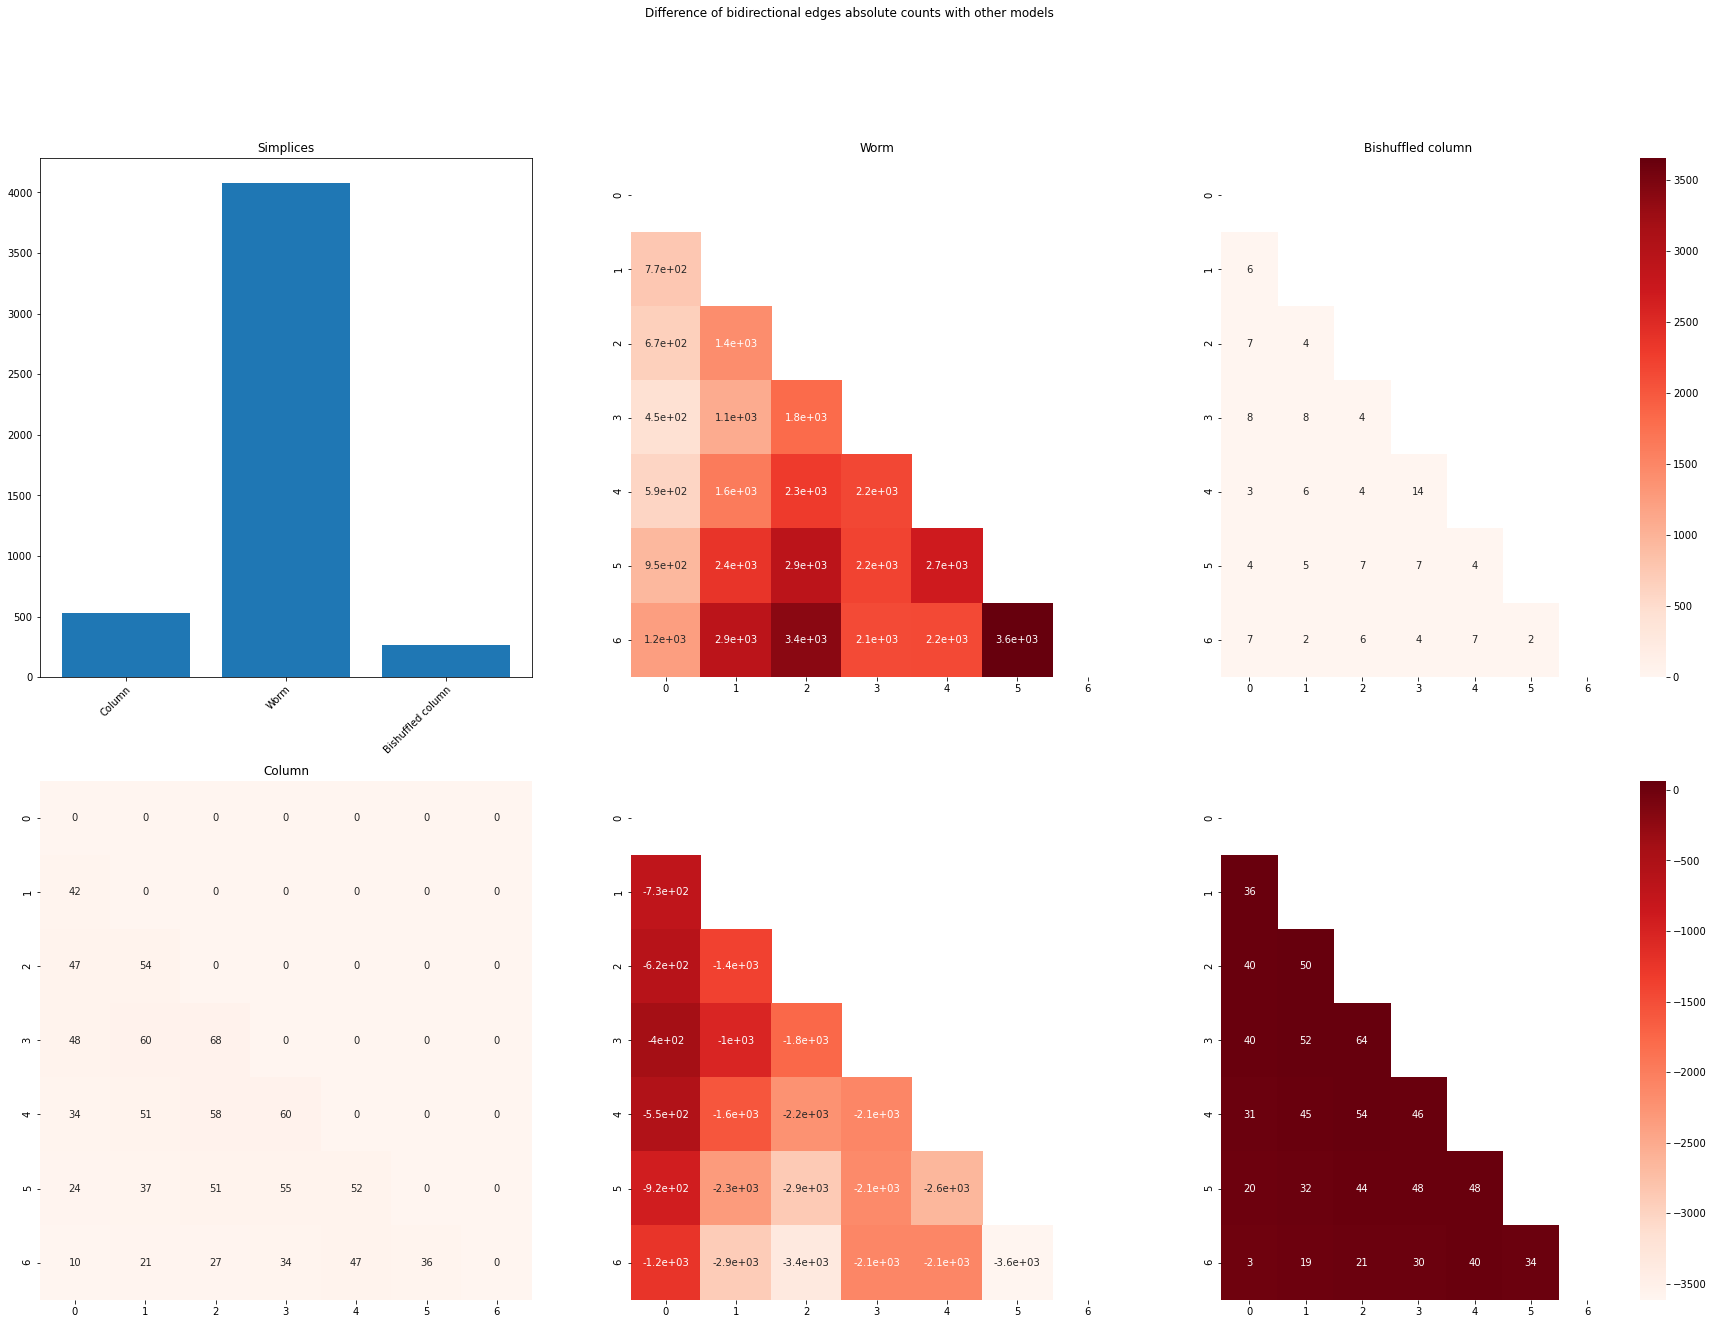

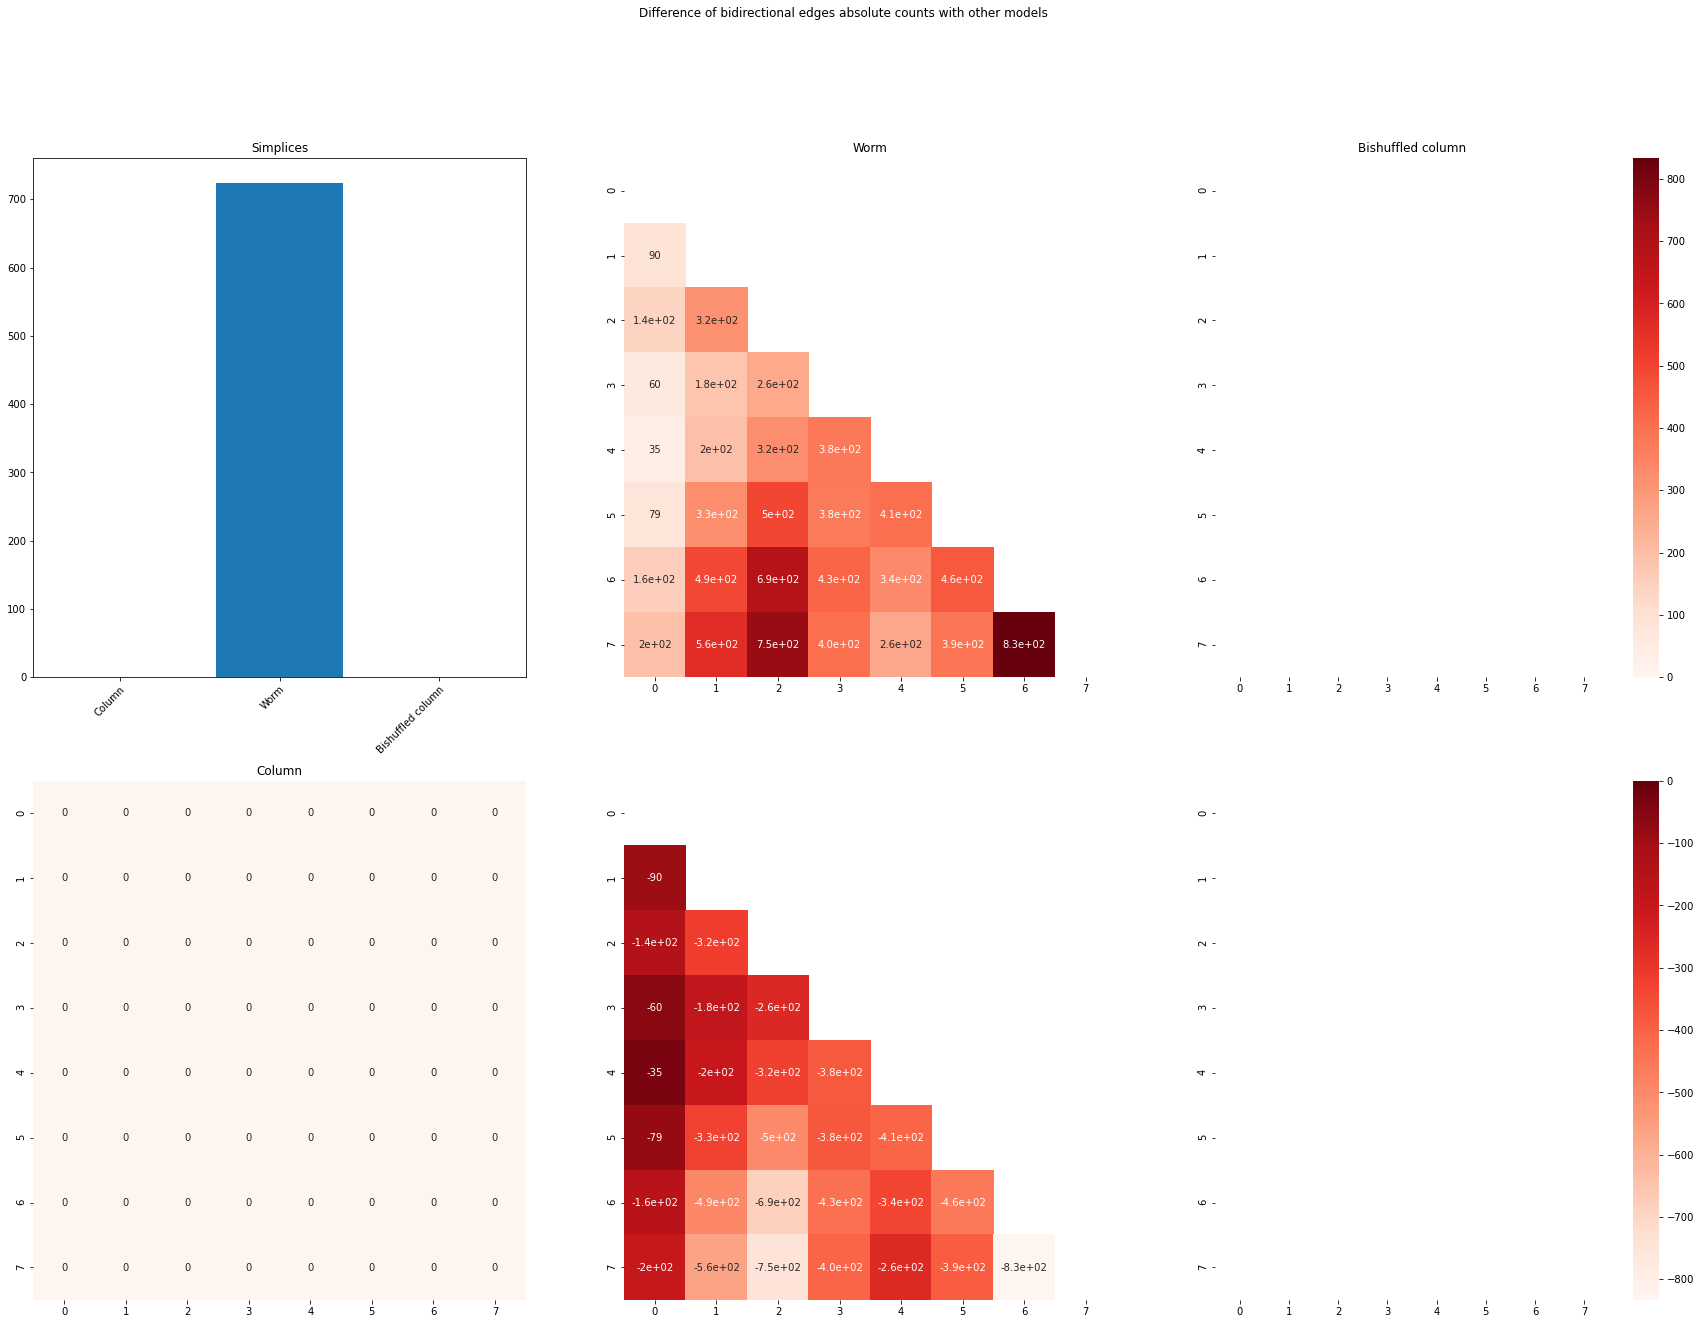

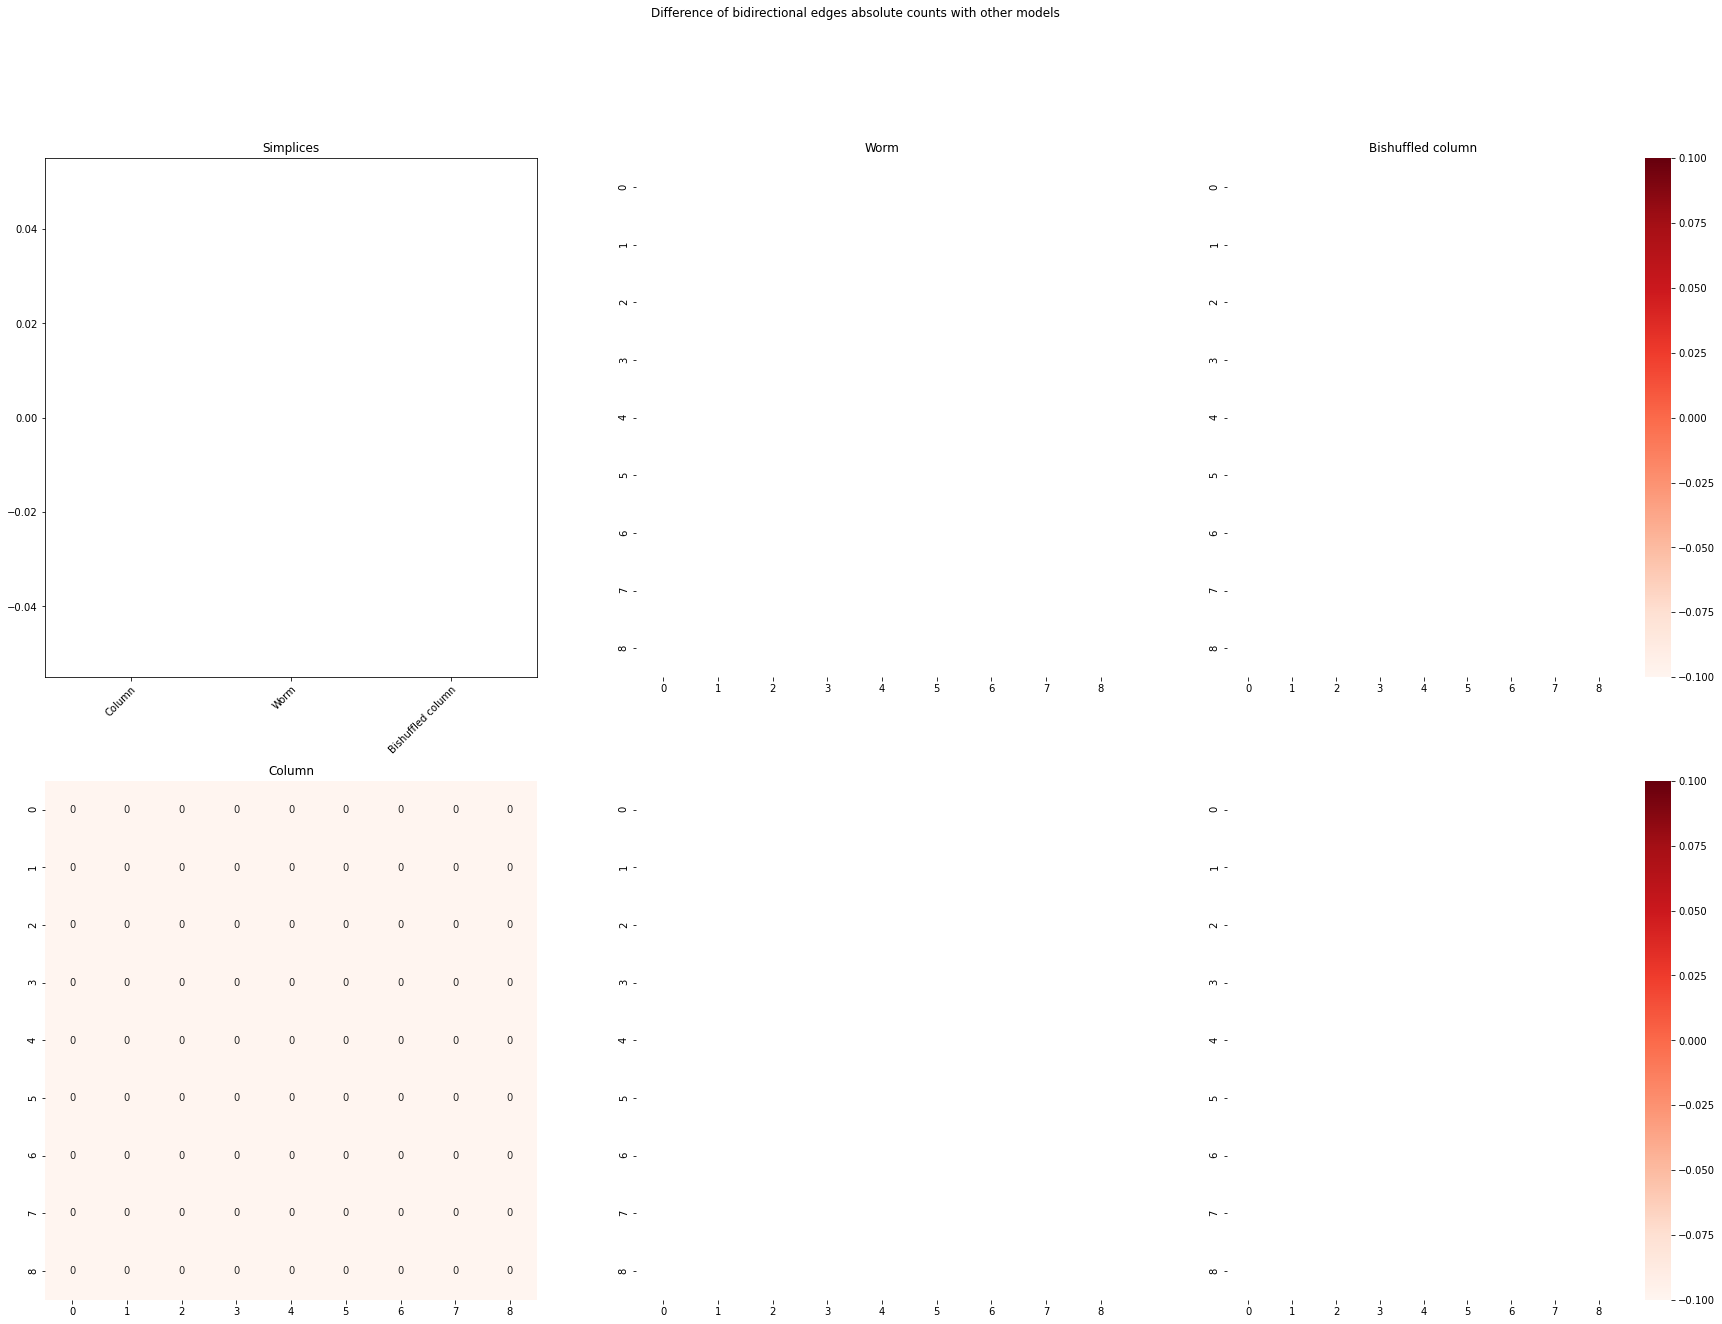

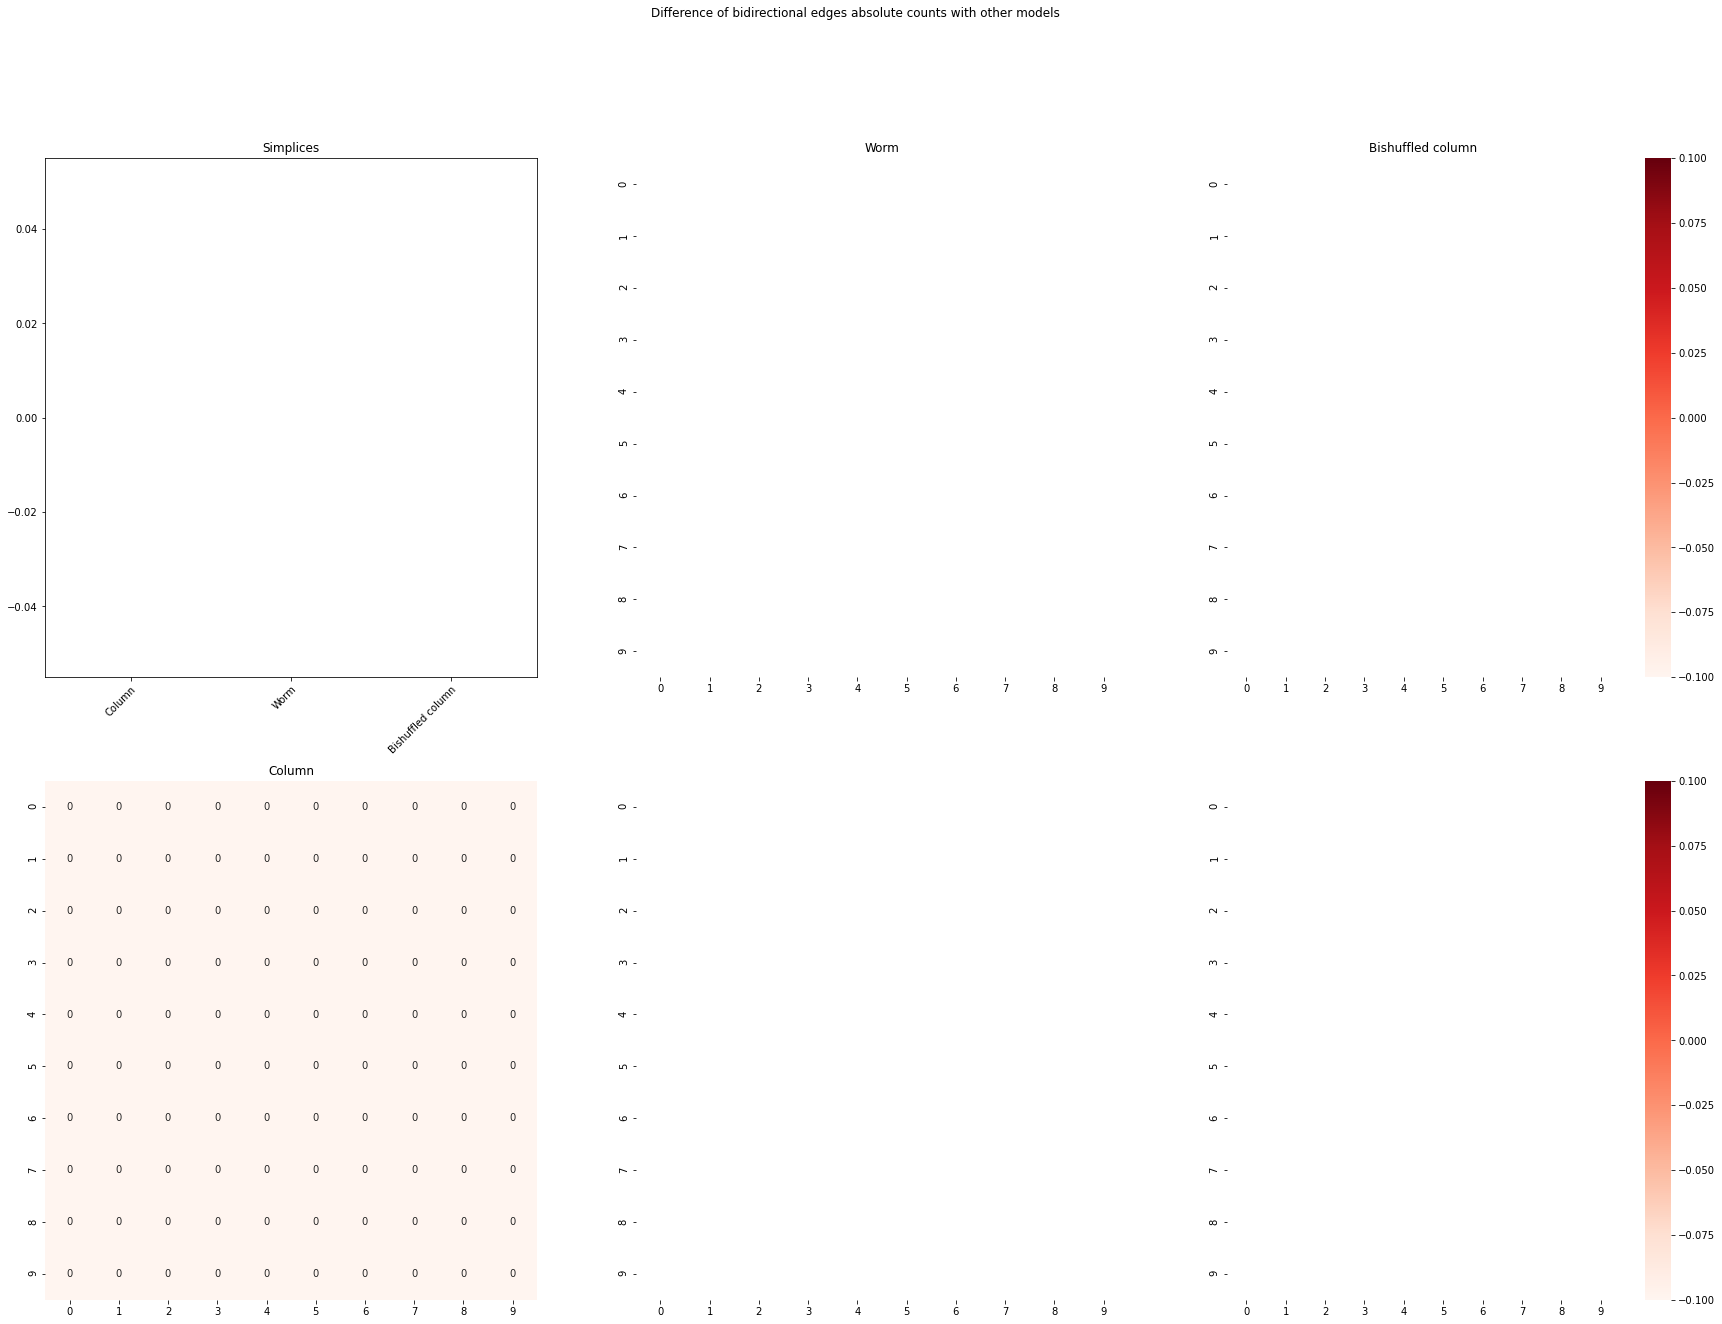

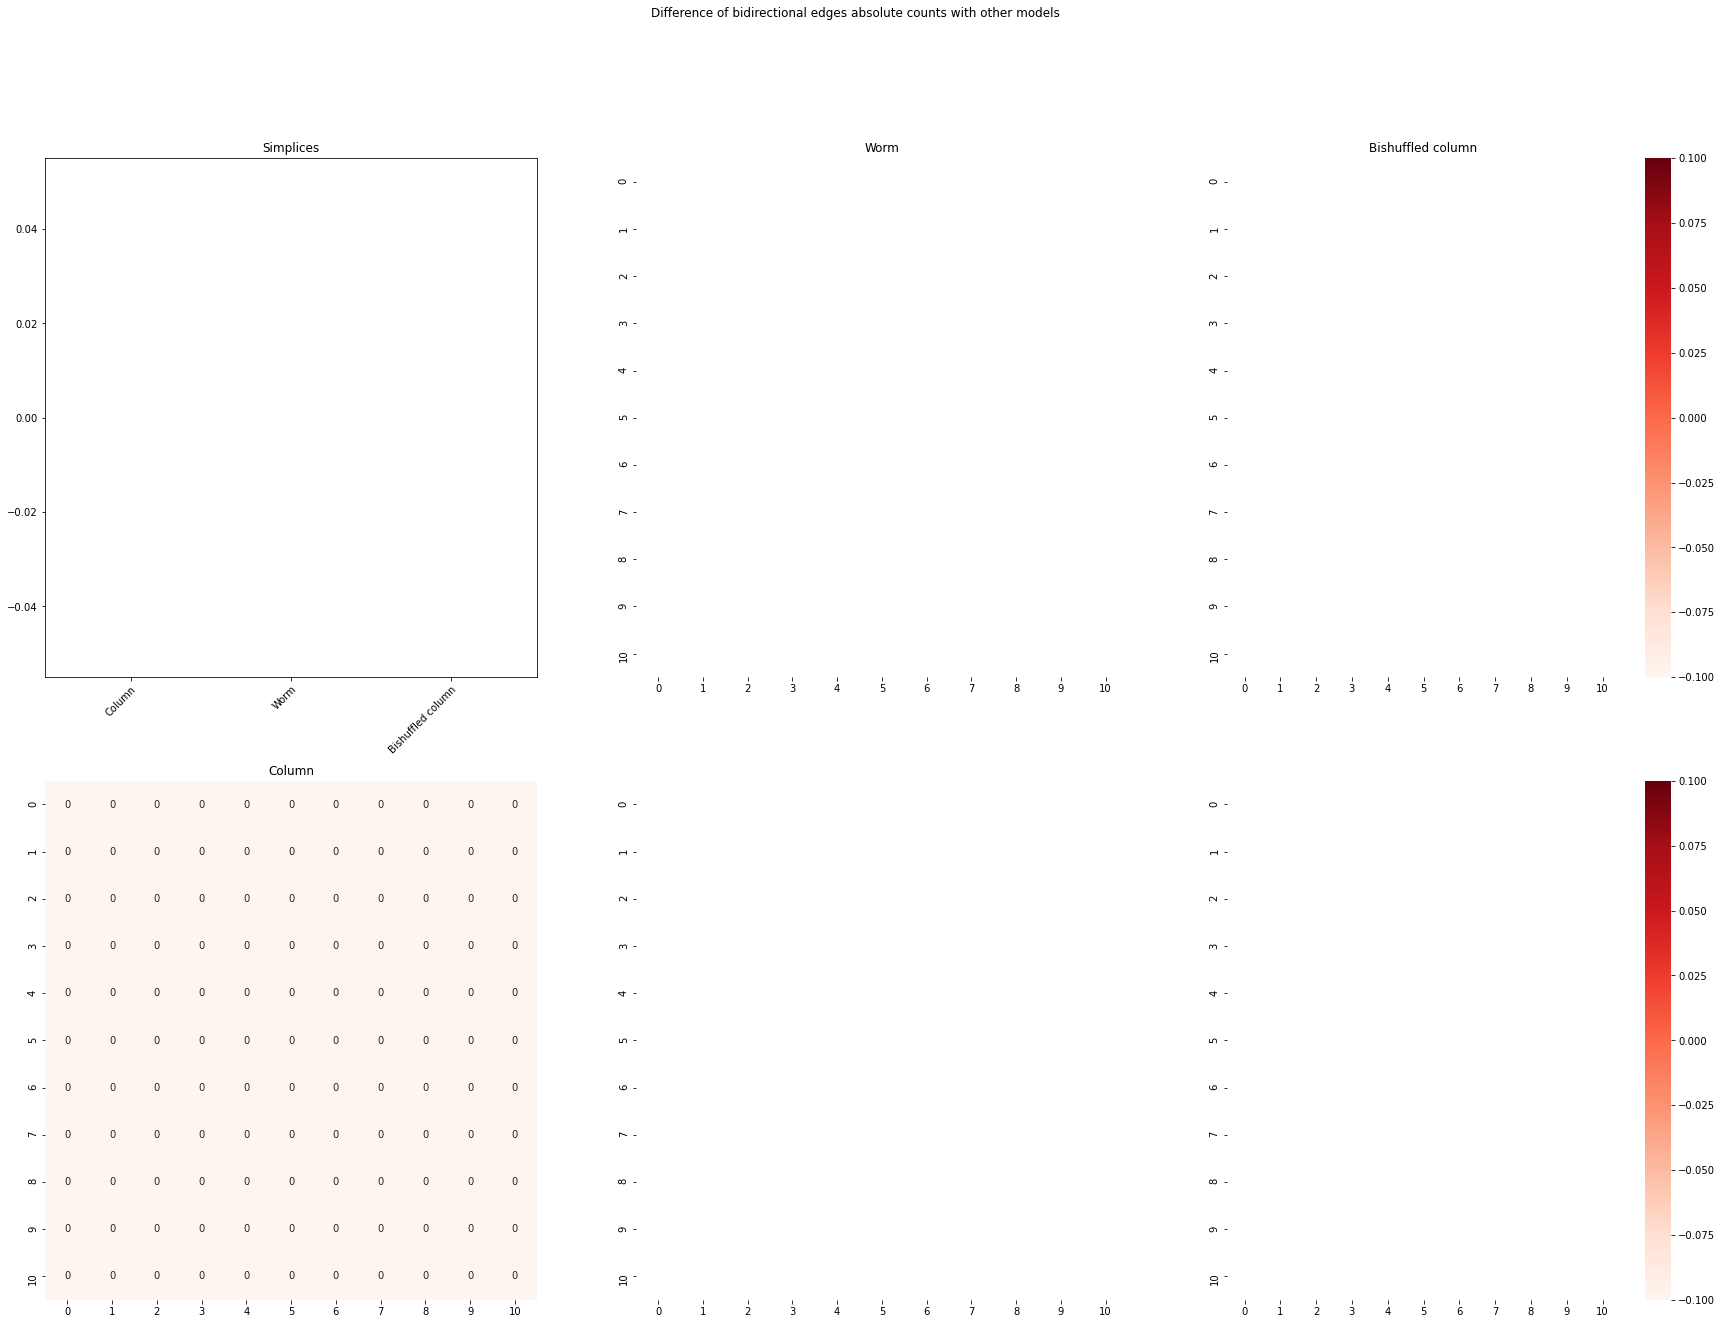

In [20]:
compare_graphs_diff([a,b,c], 1, "worm_difference", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

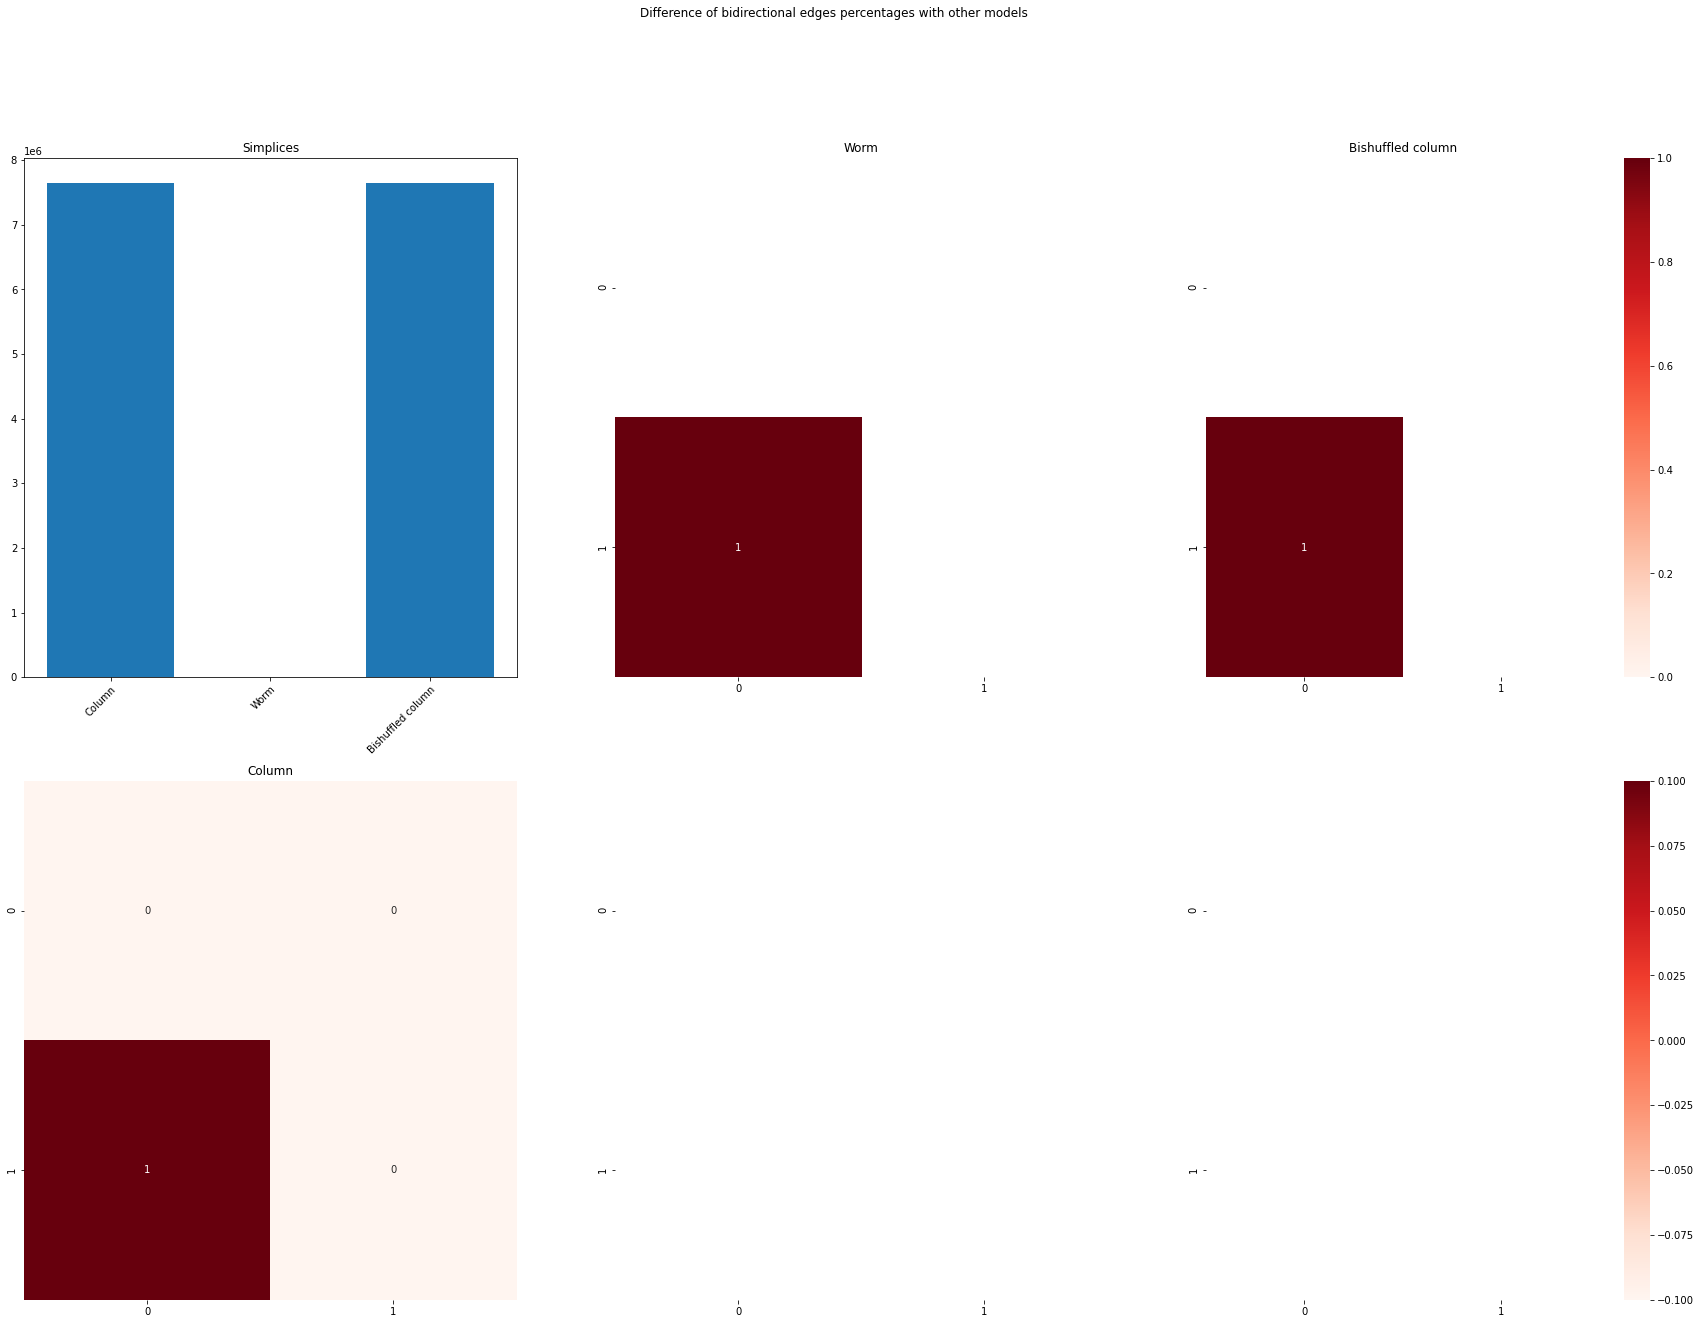

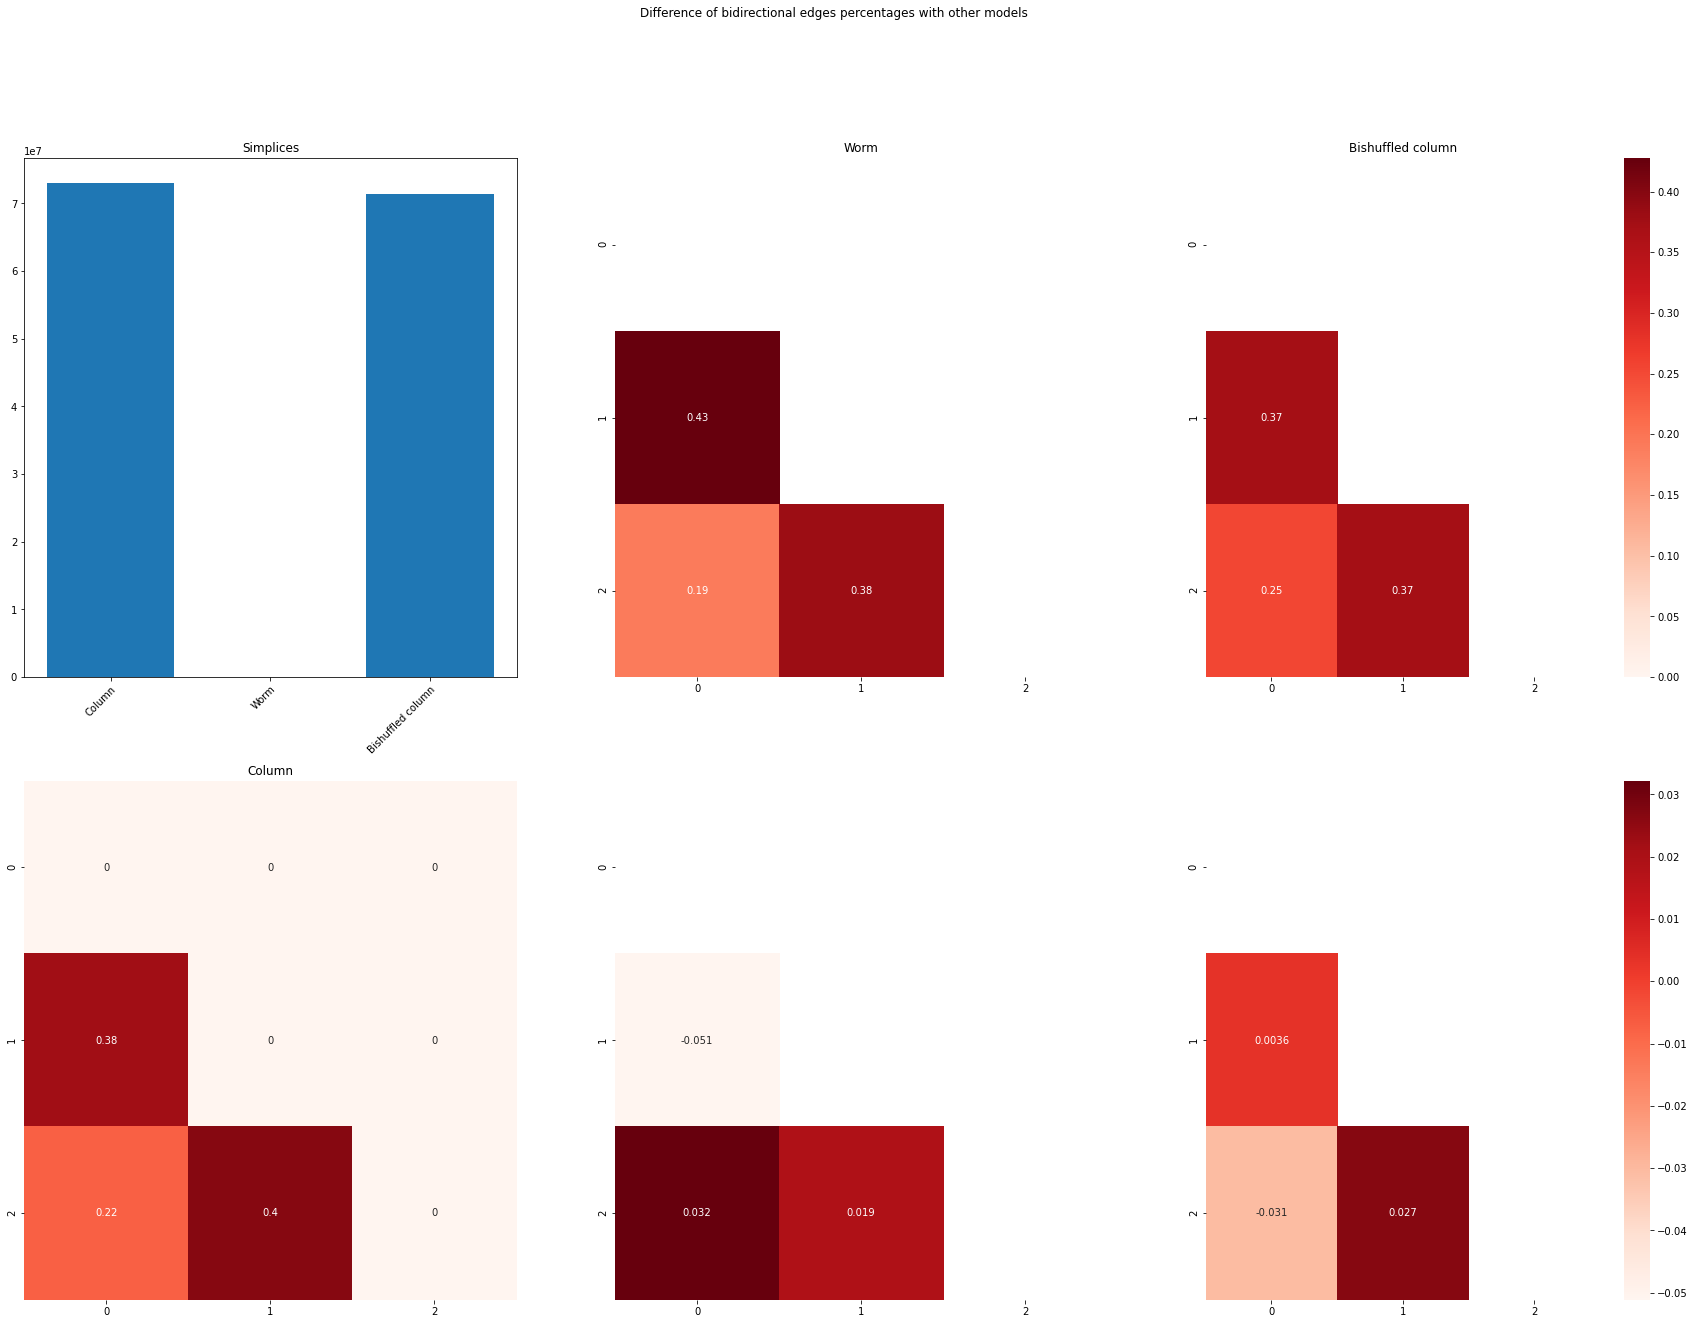

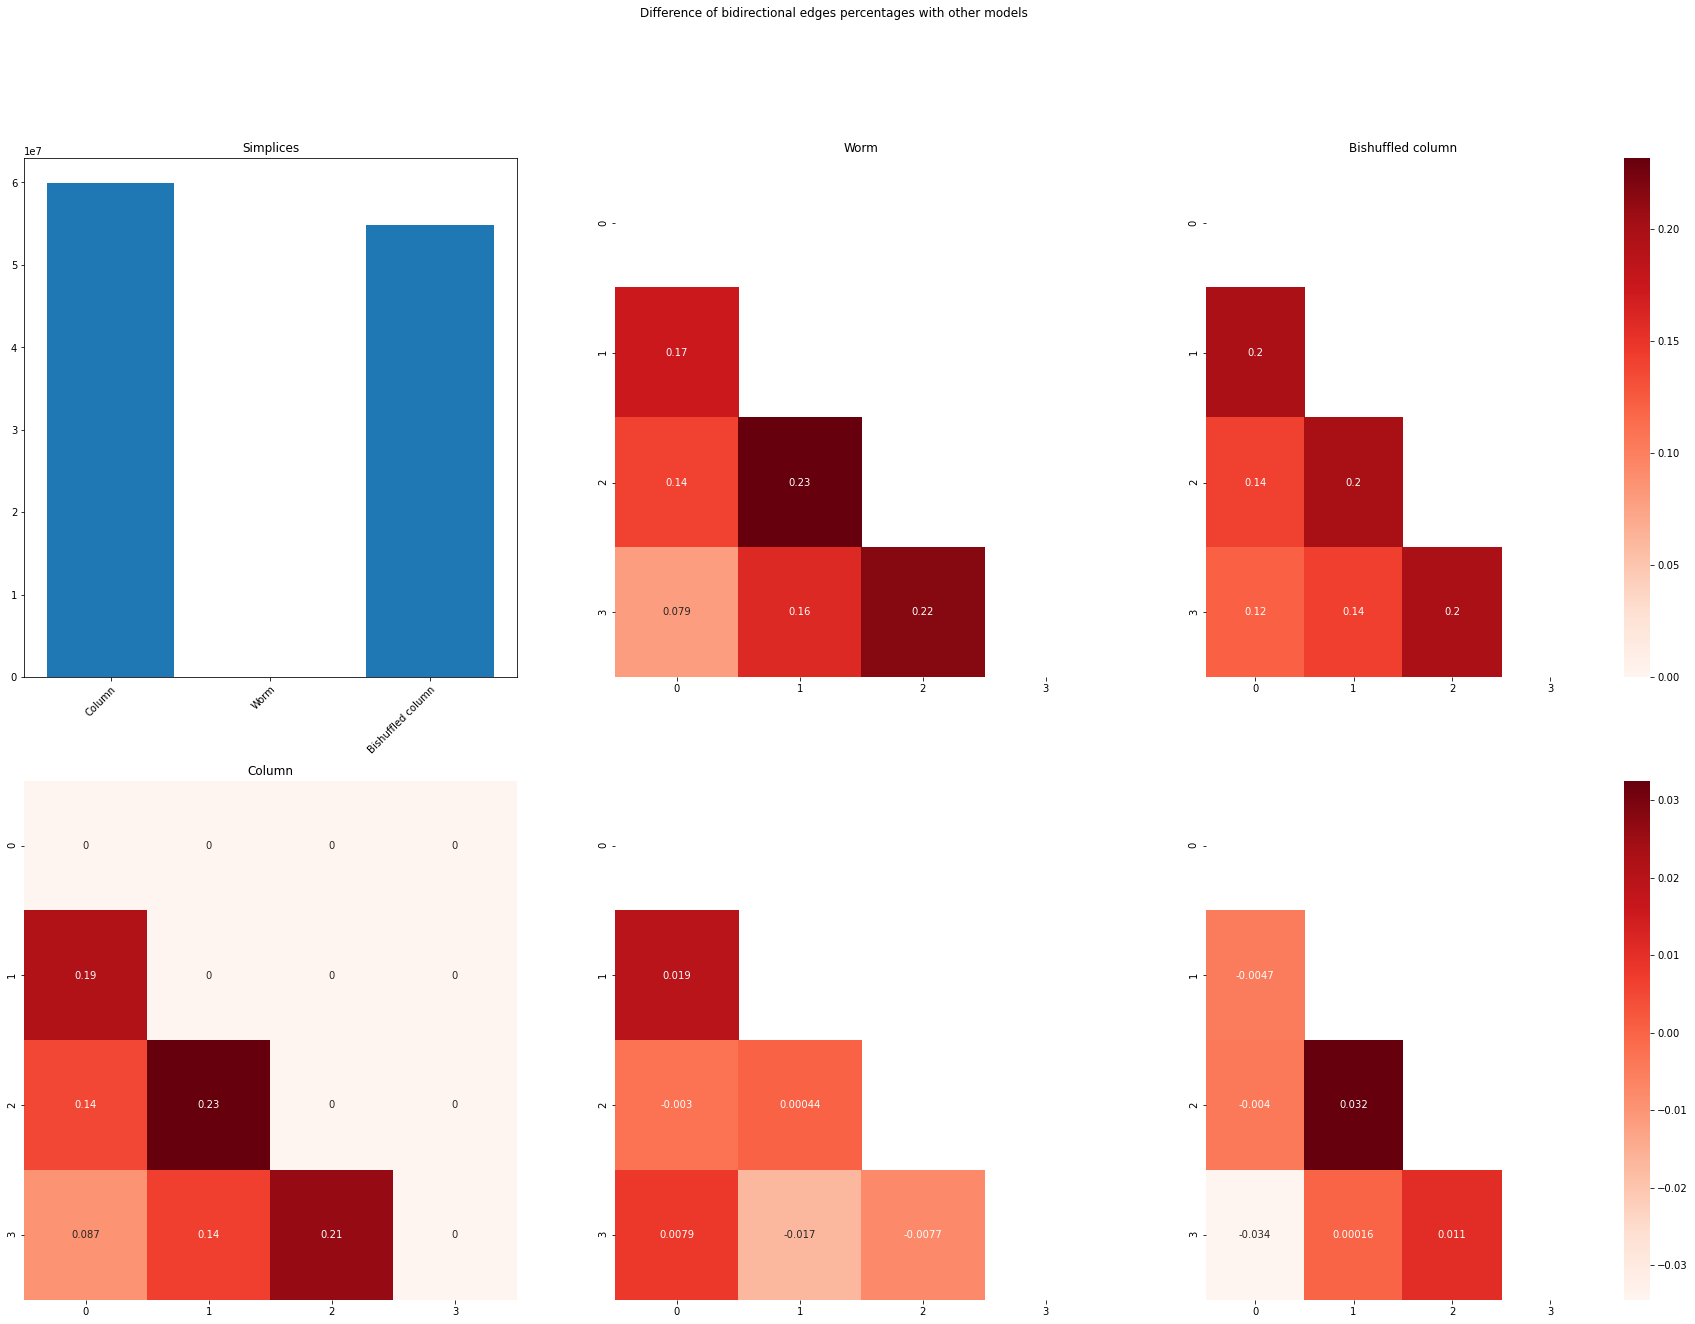

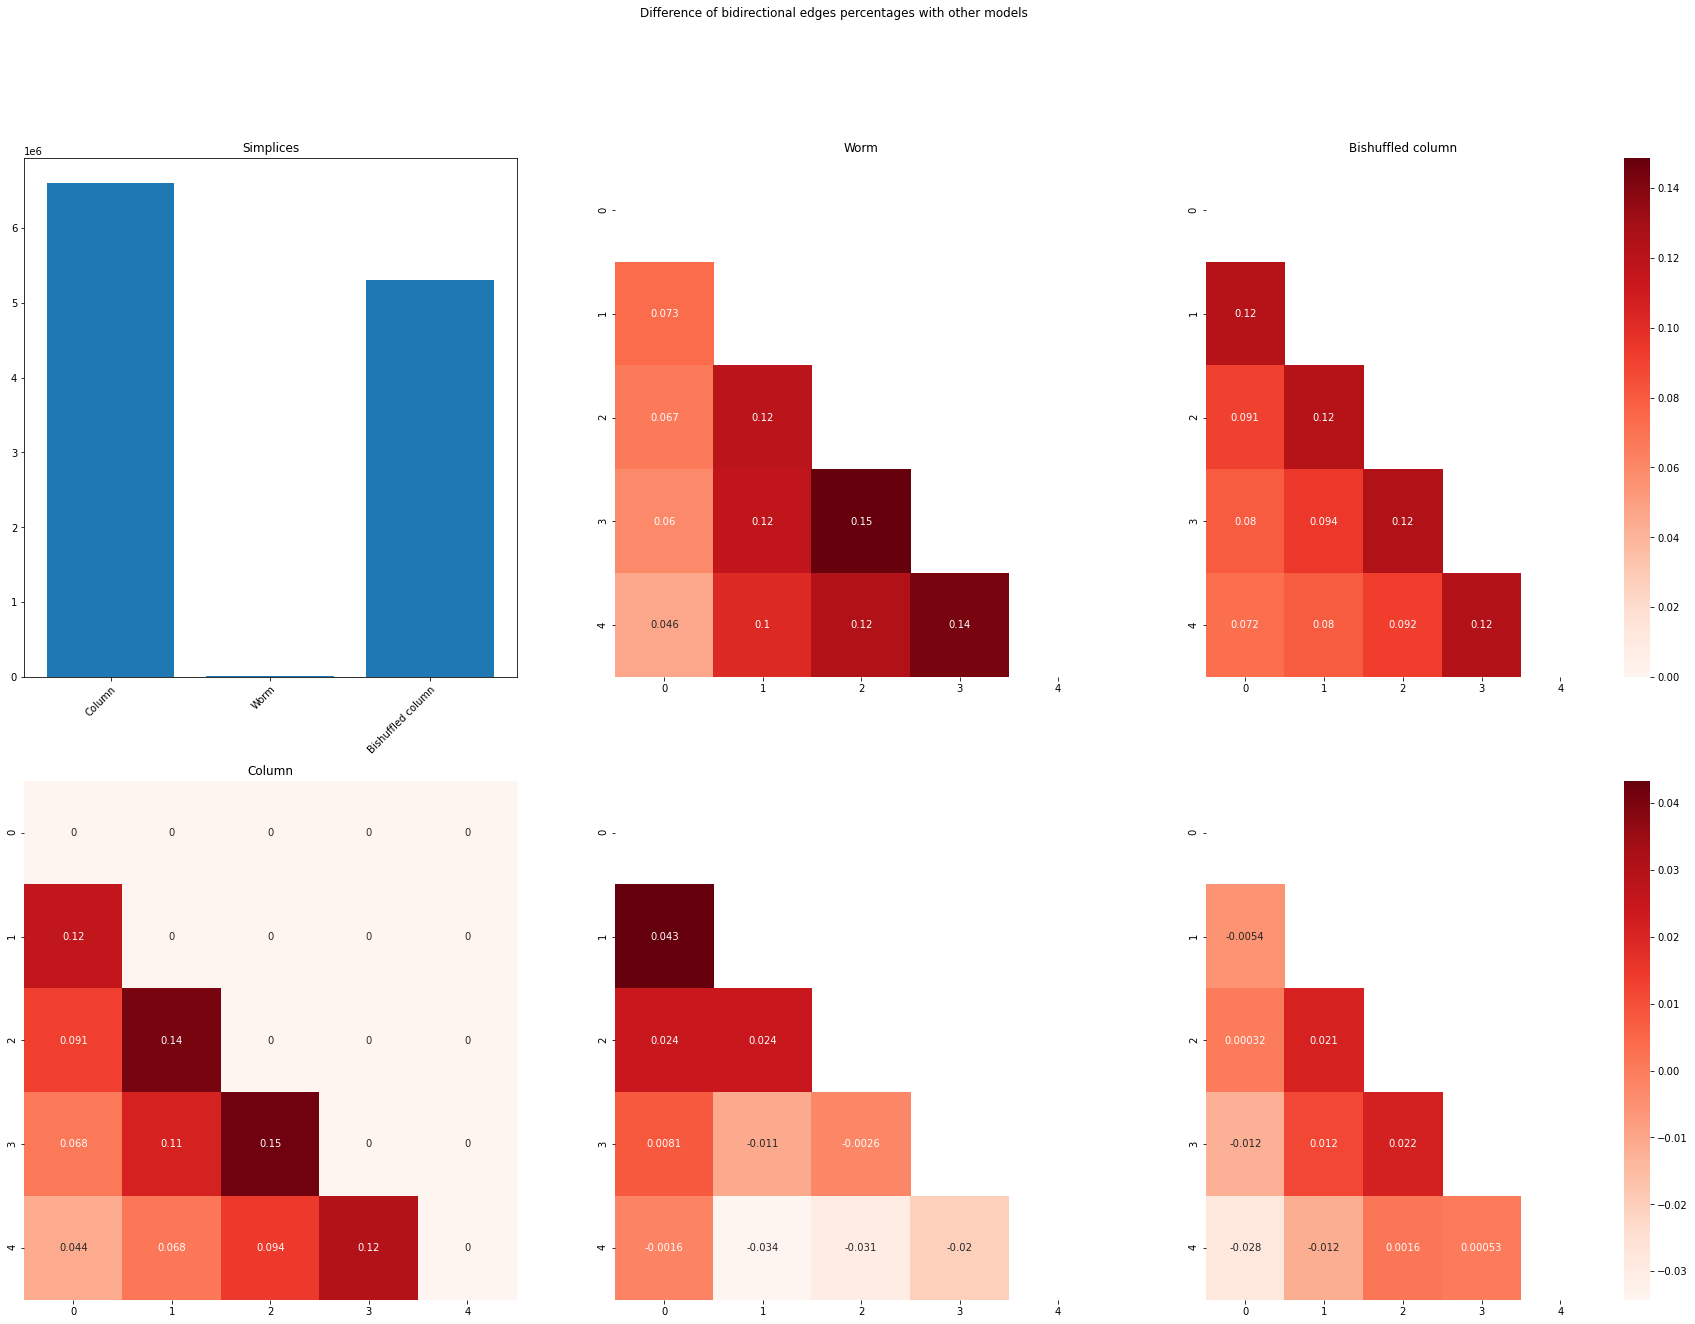

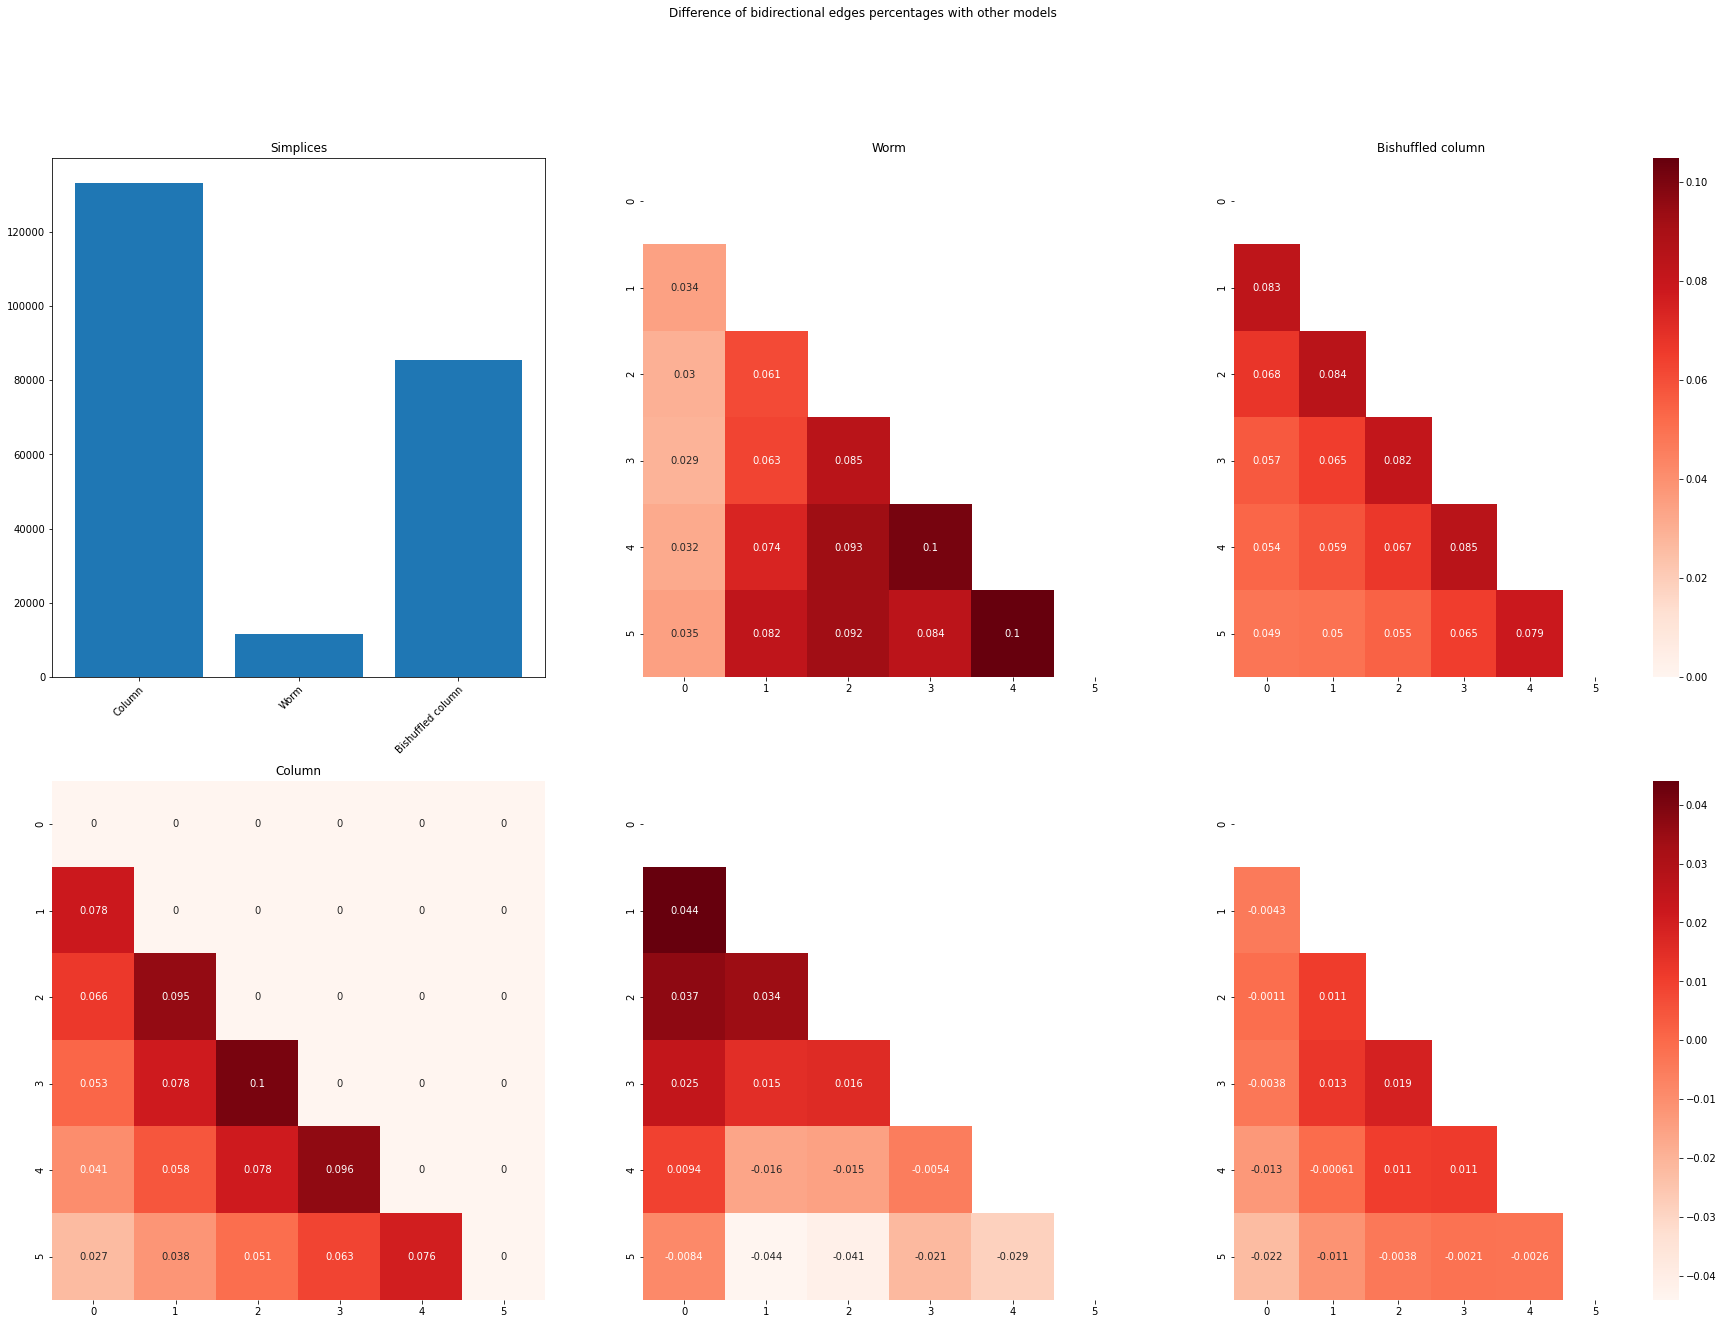

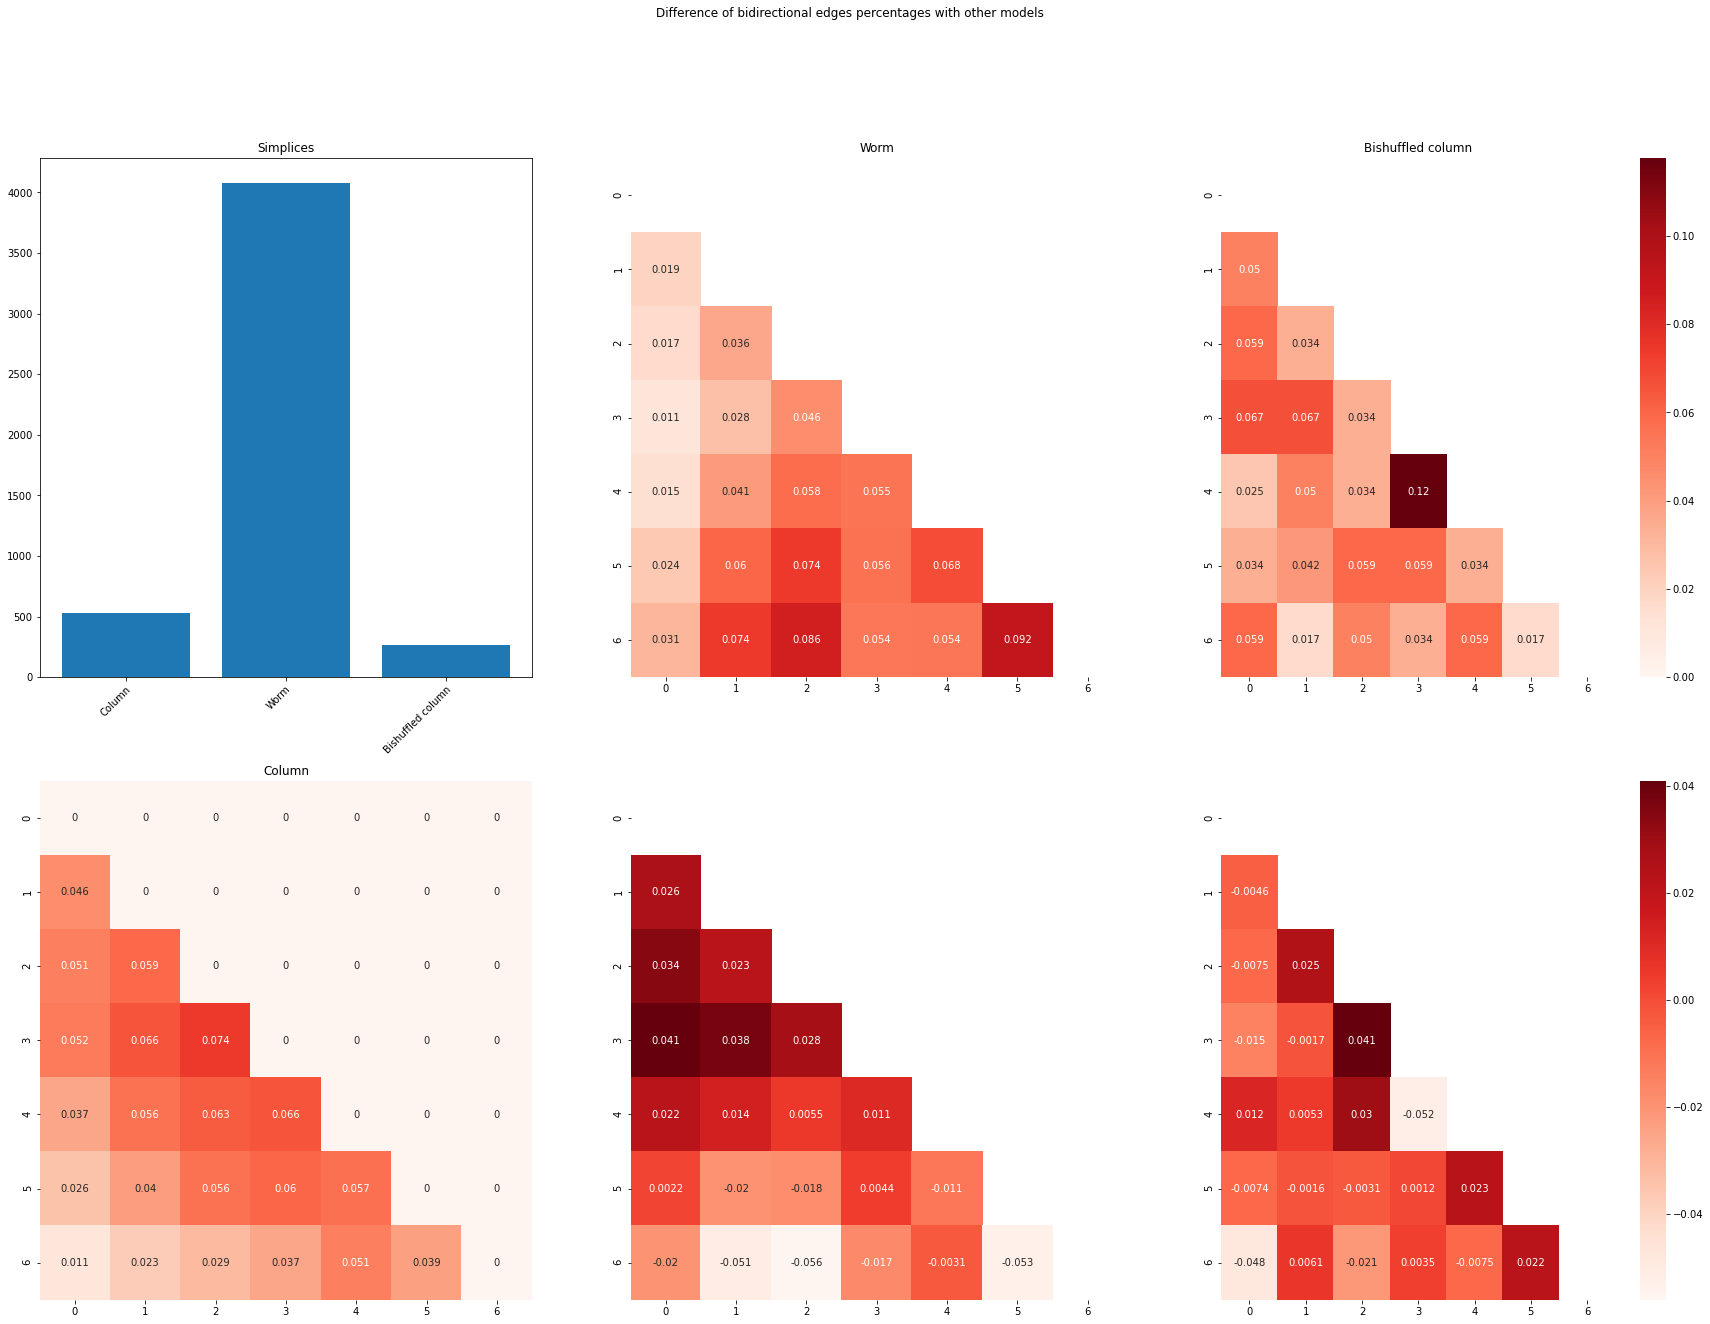

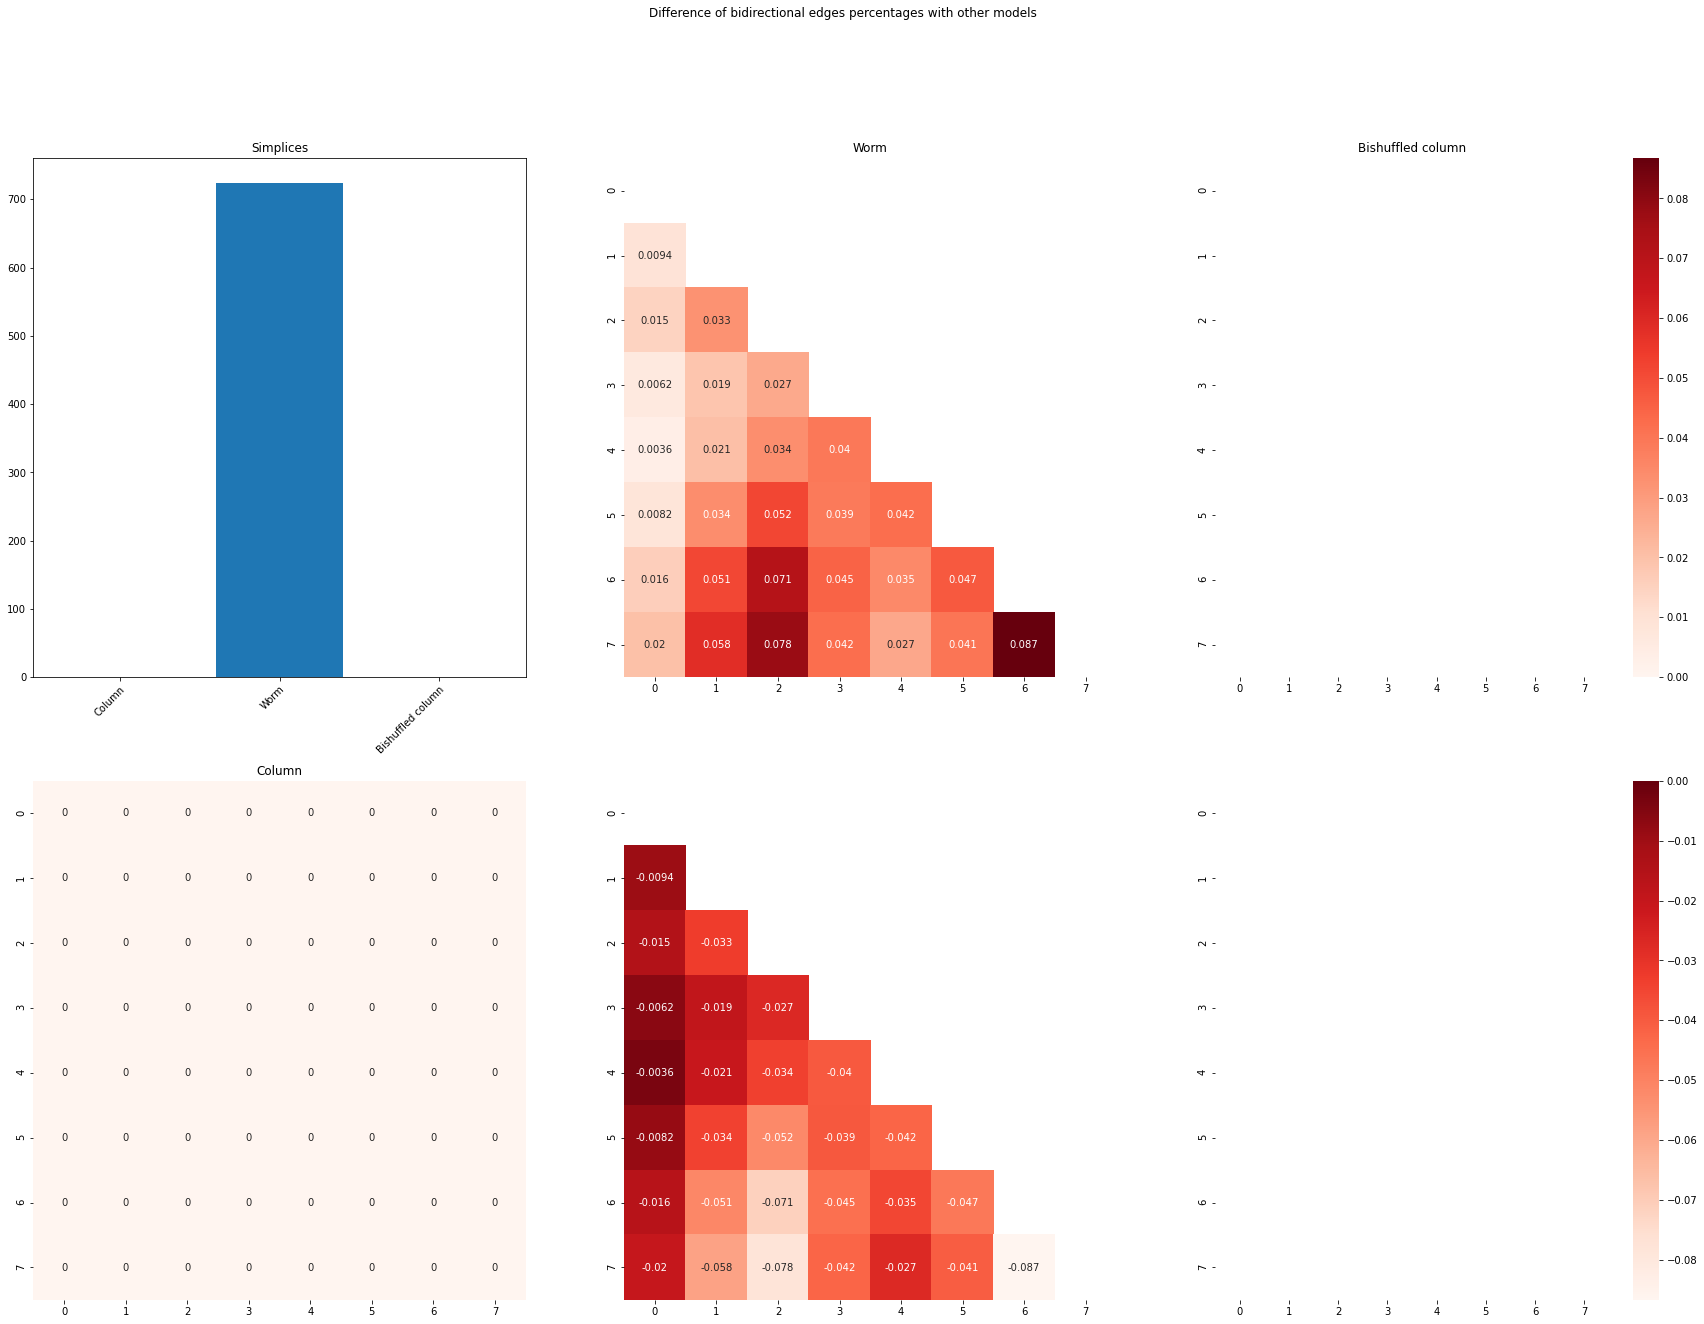

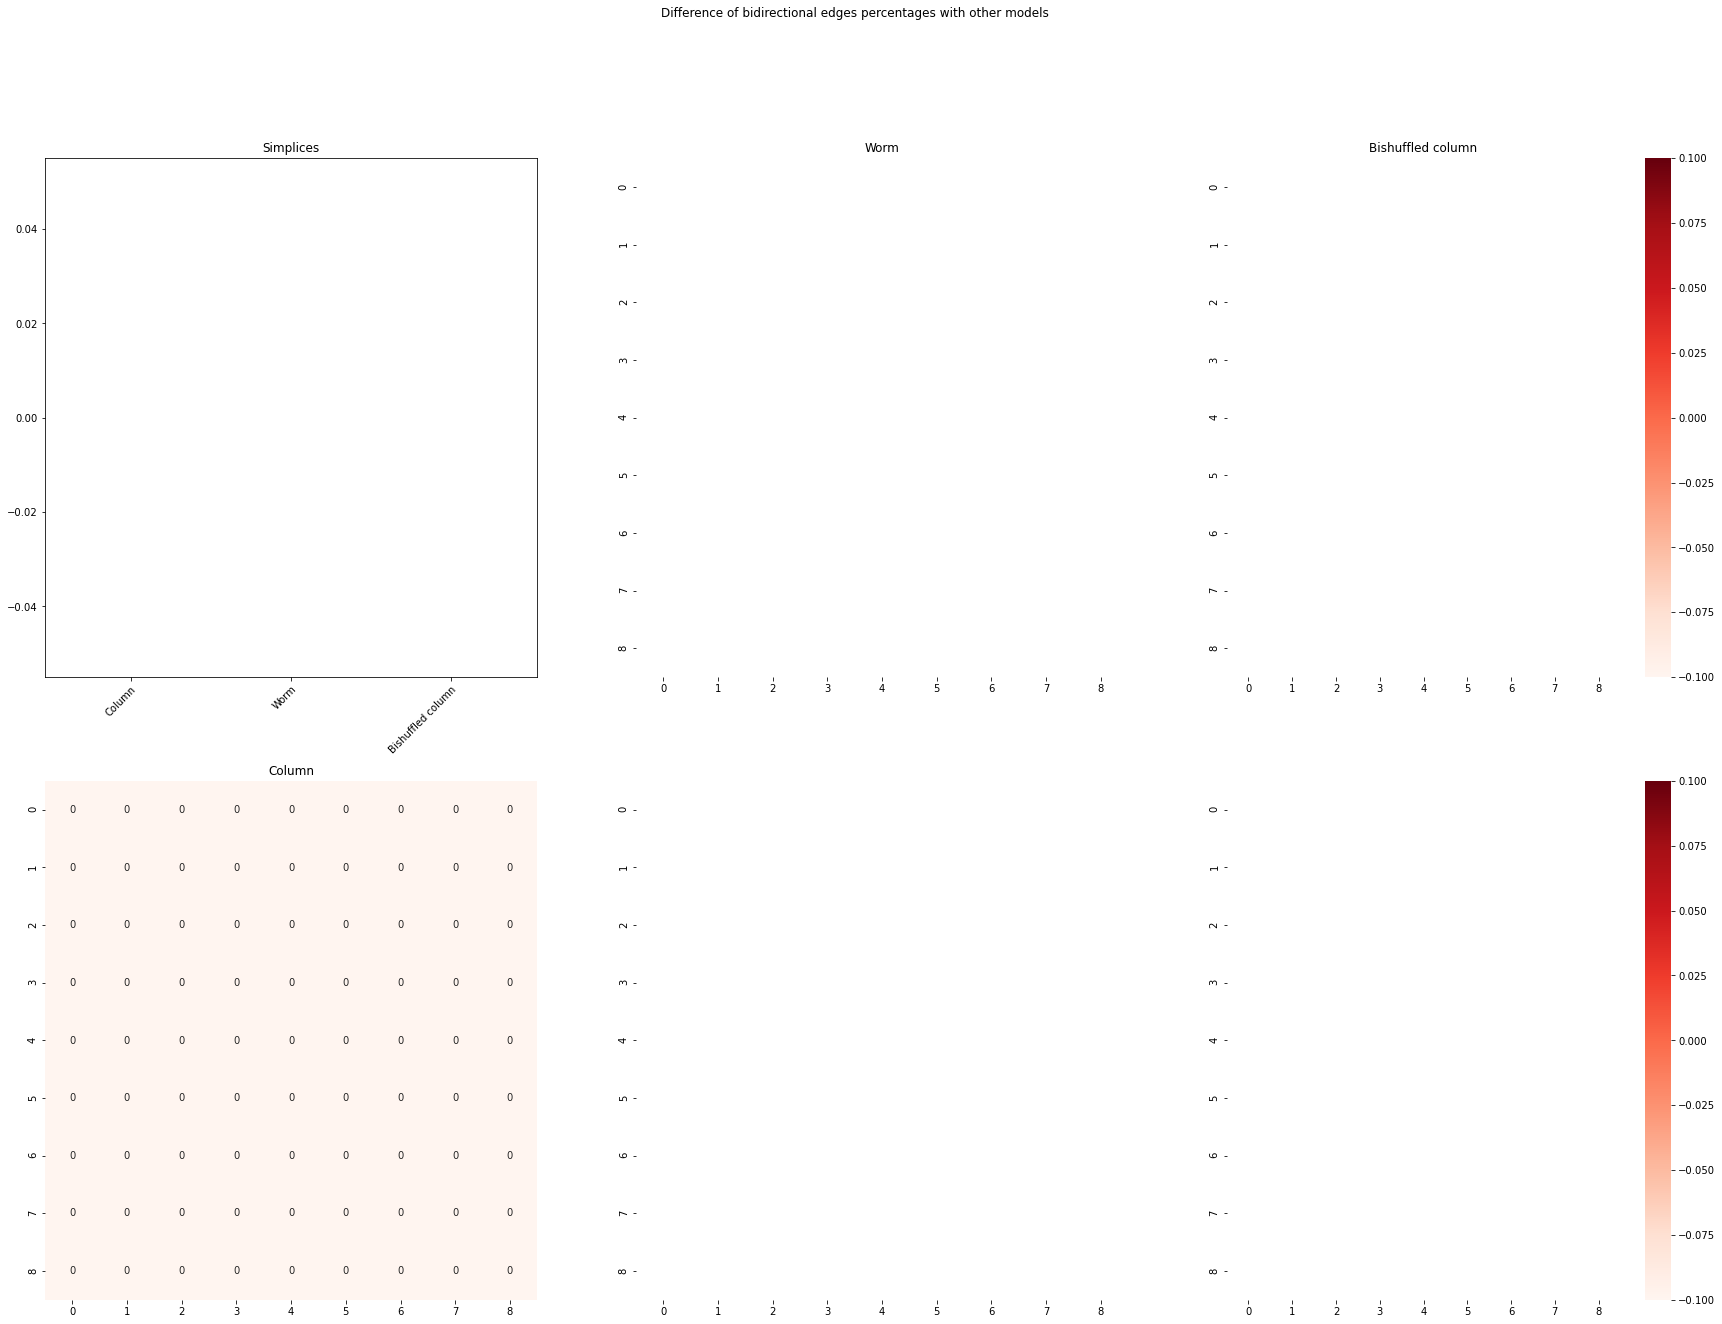

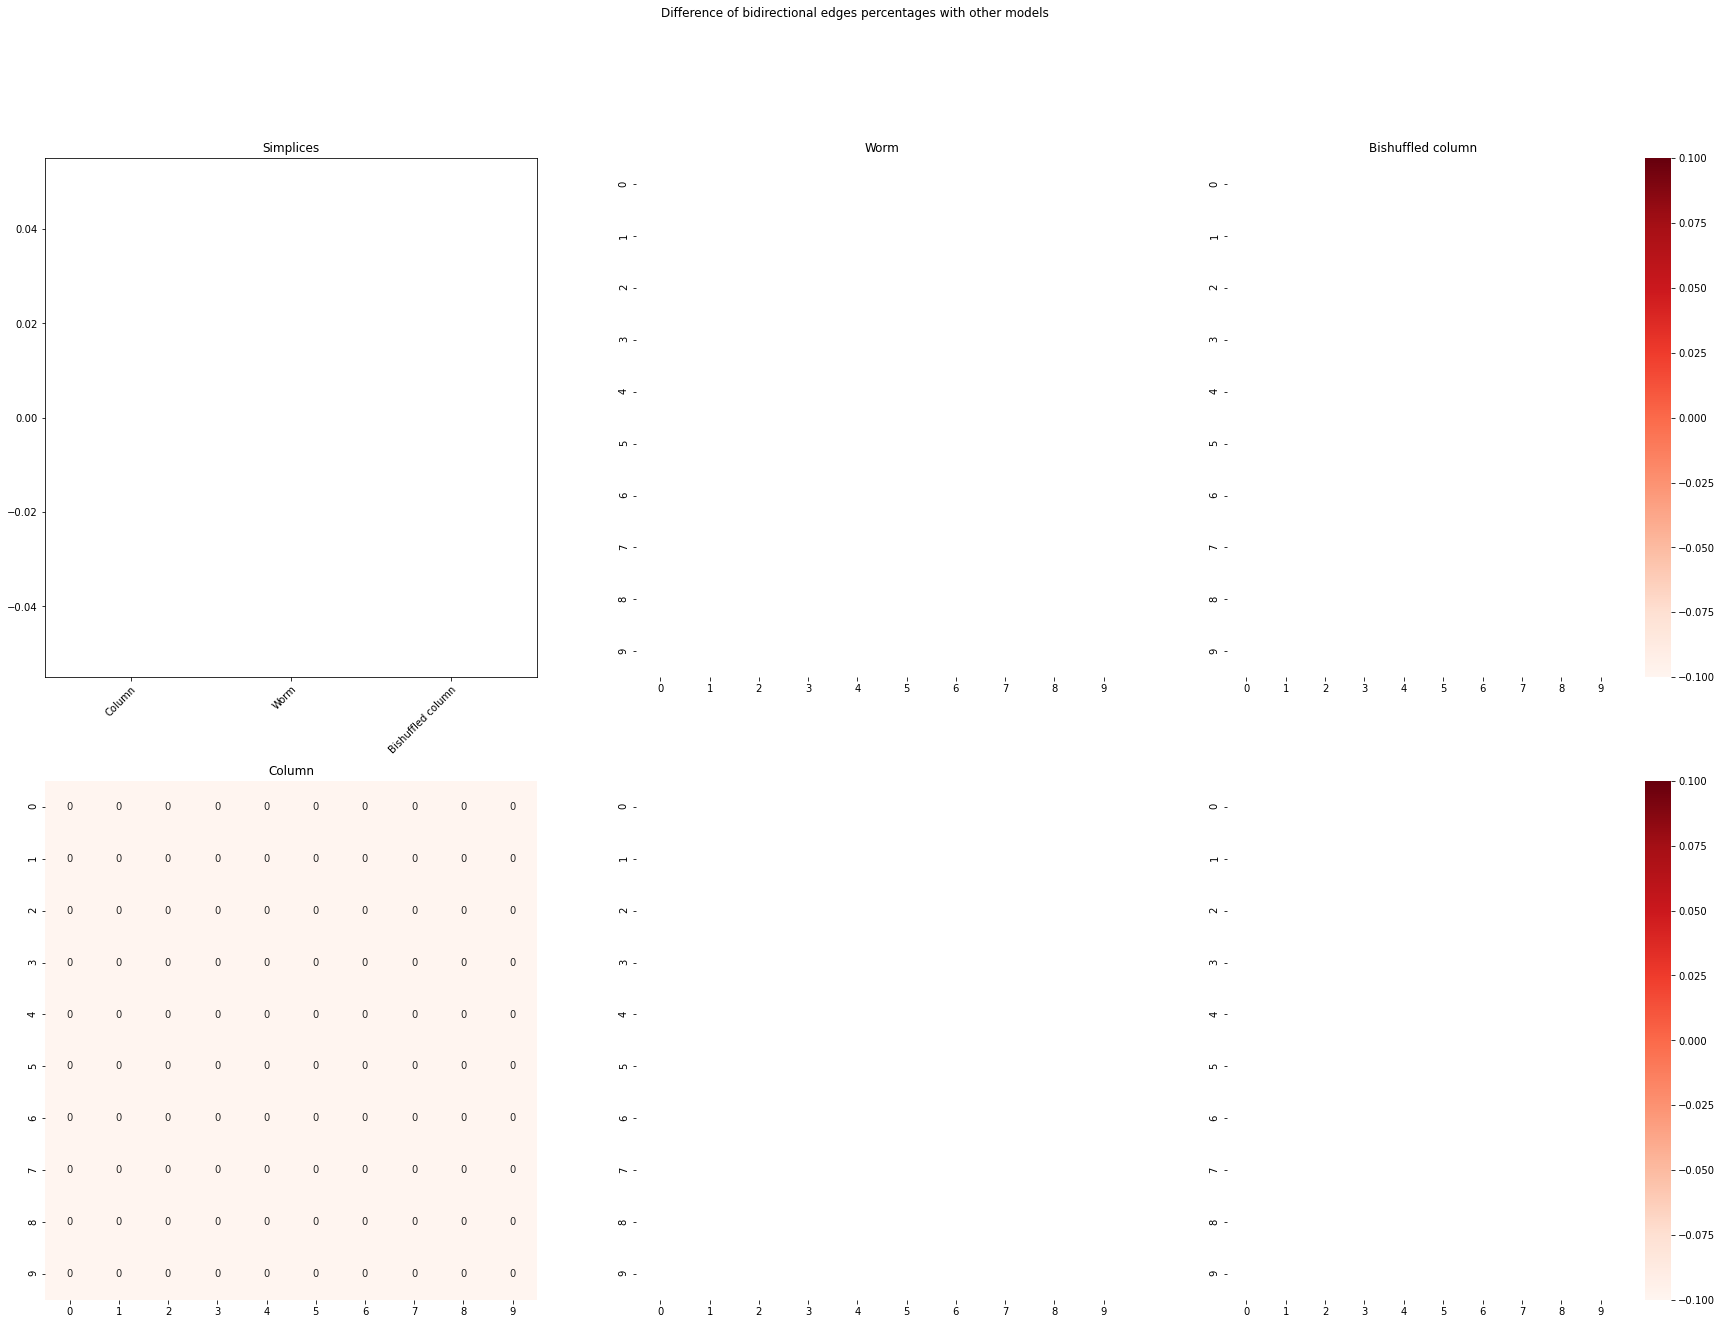

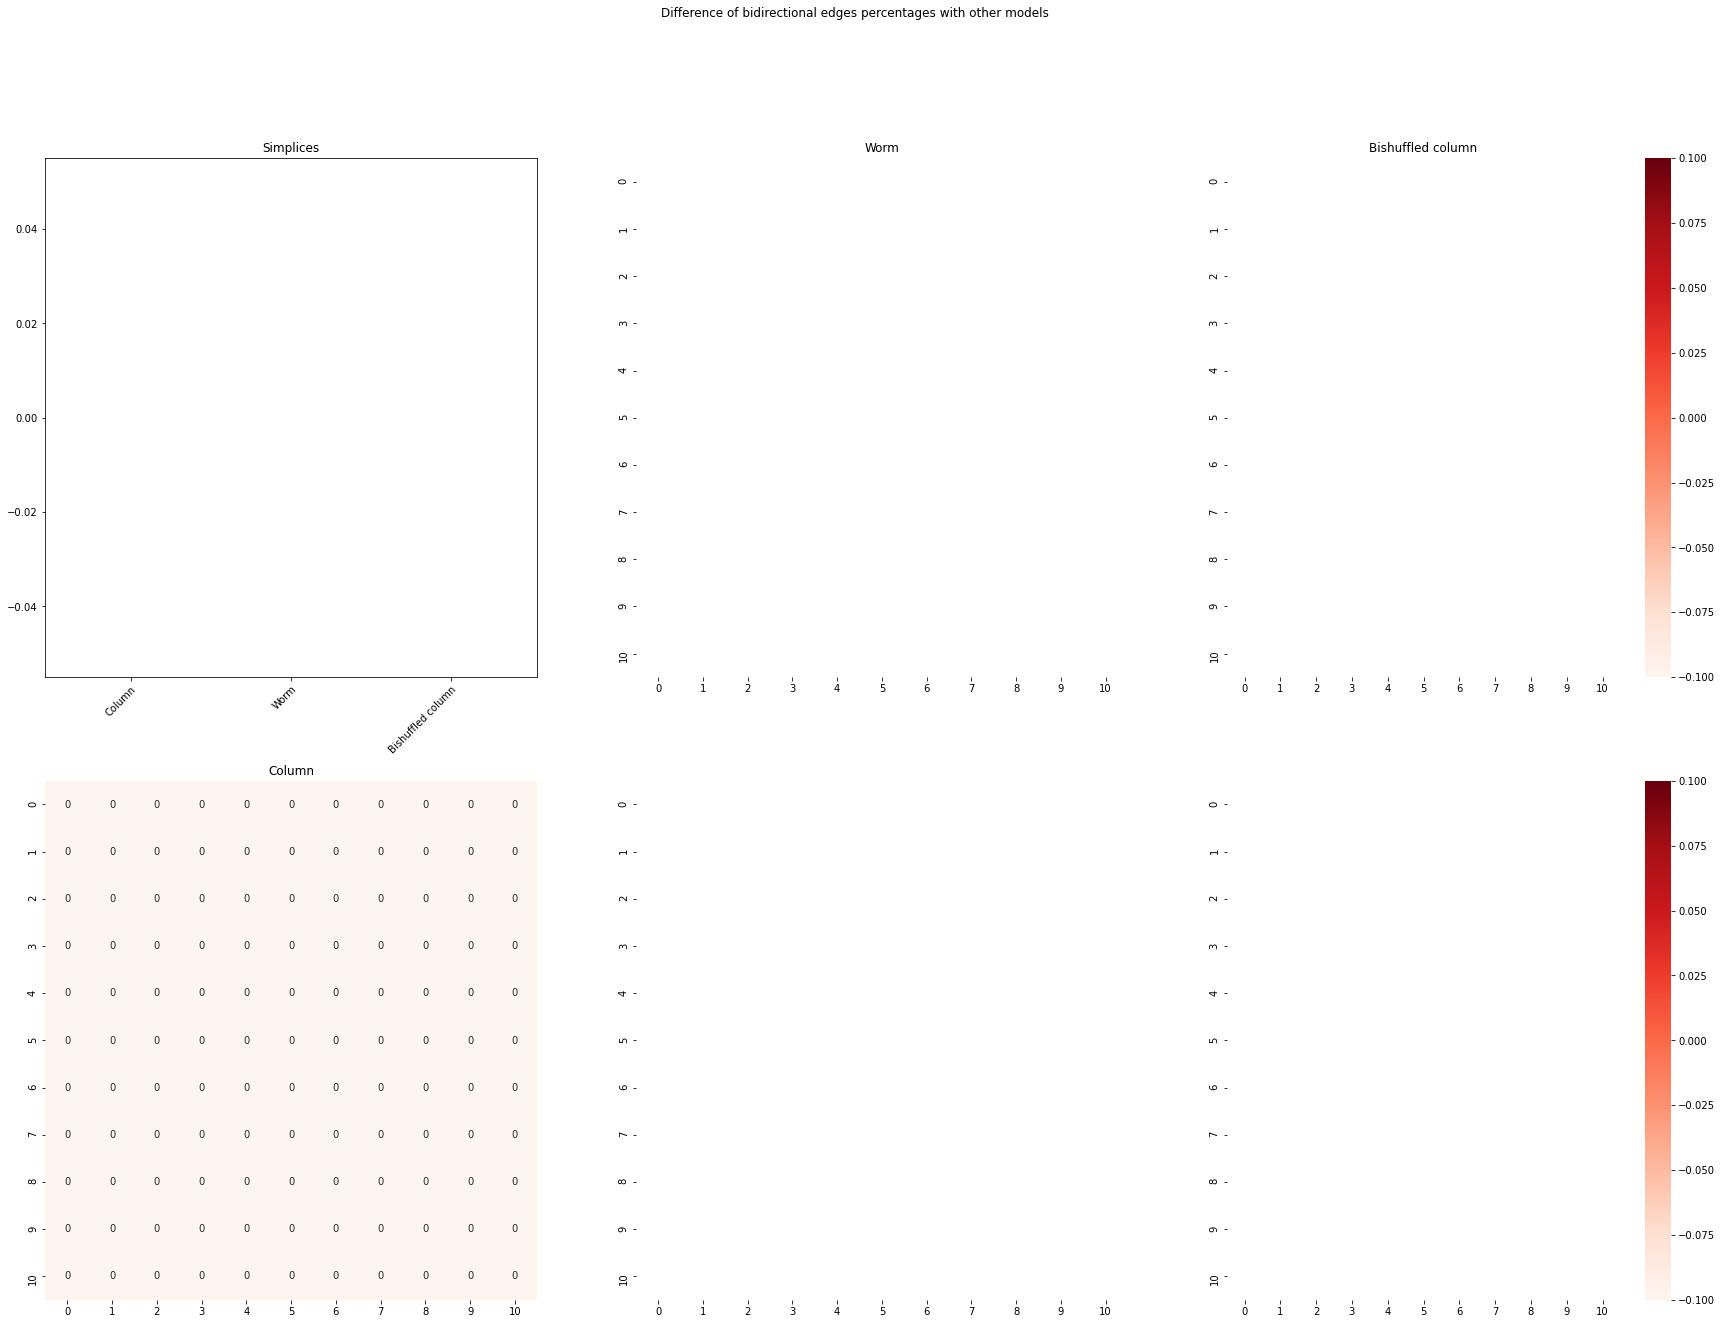

In [21]:
compare_graphs_diff_percent([a,b,c], 1, "worm_difference_percent", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])

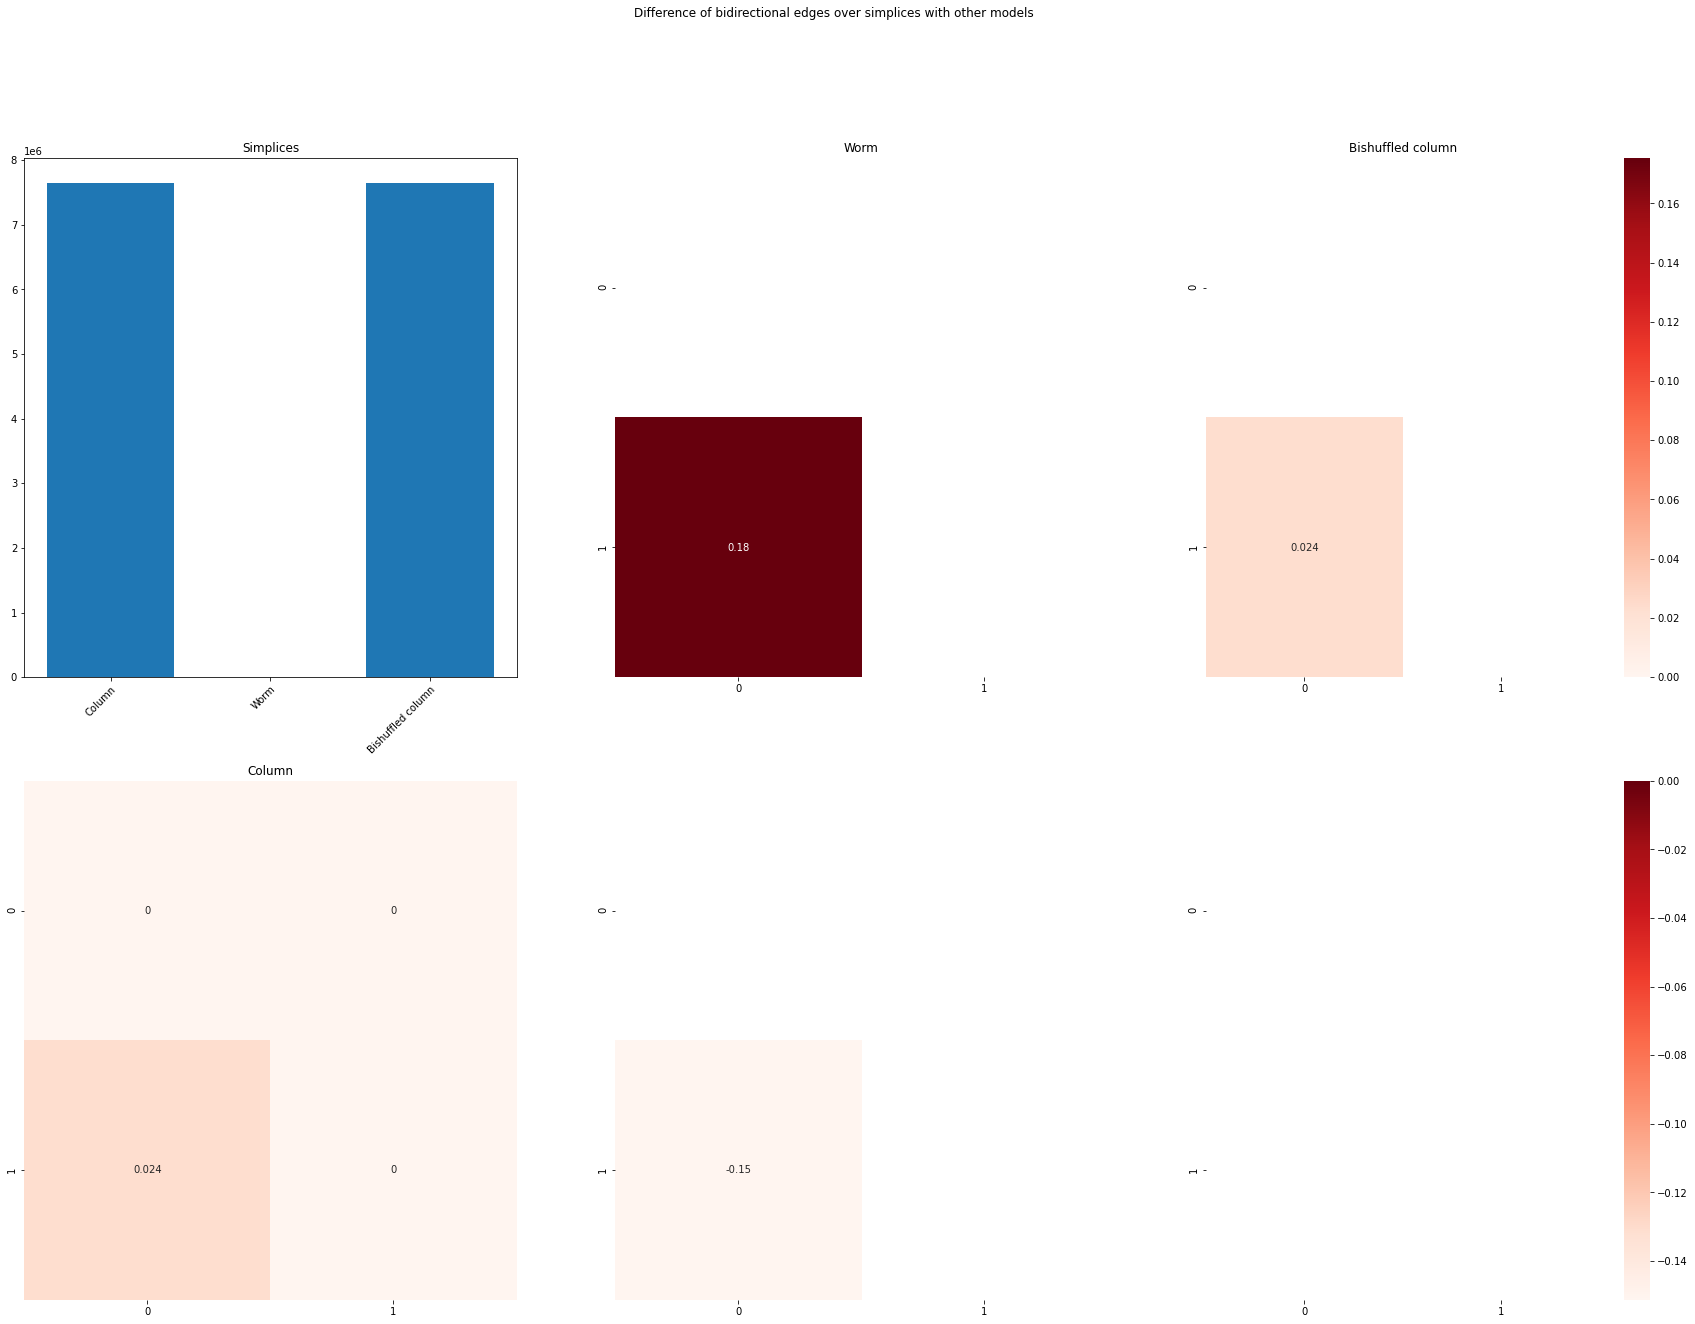

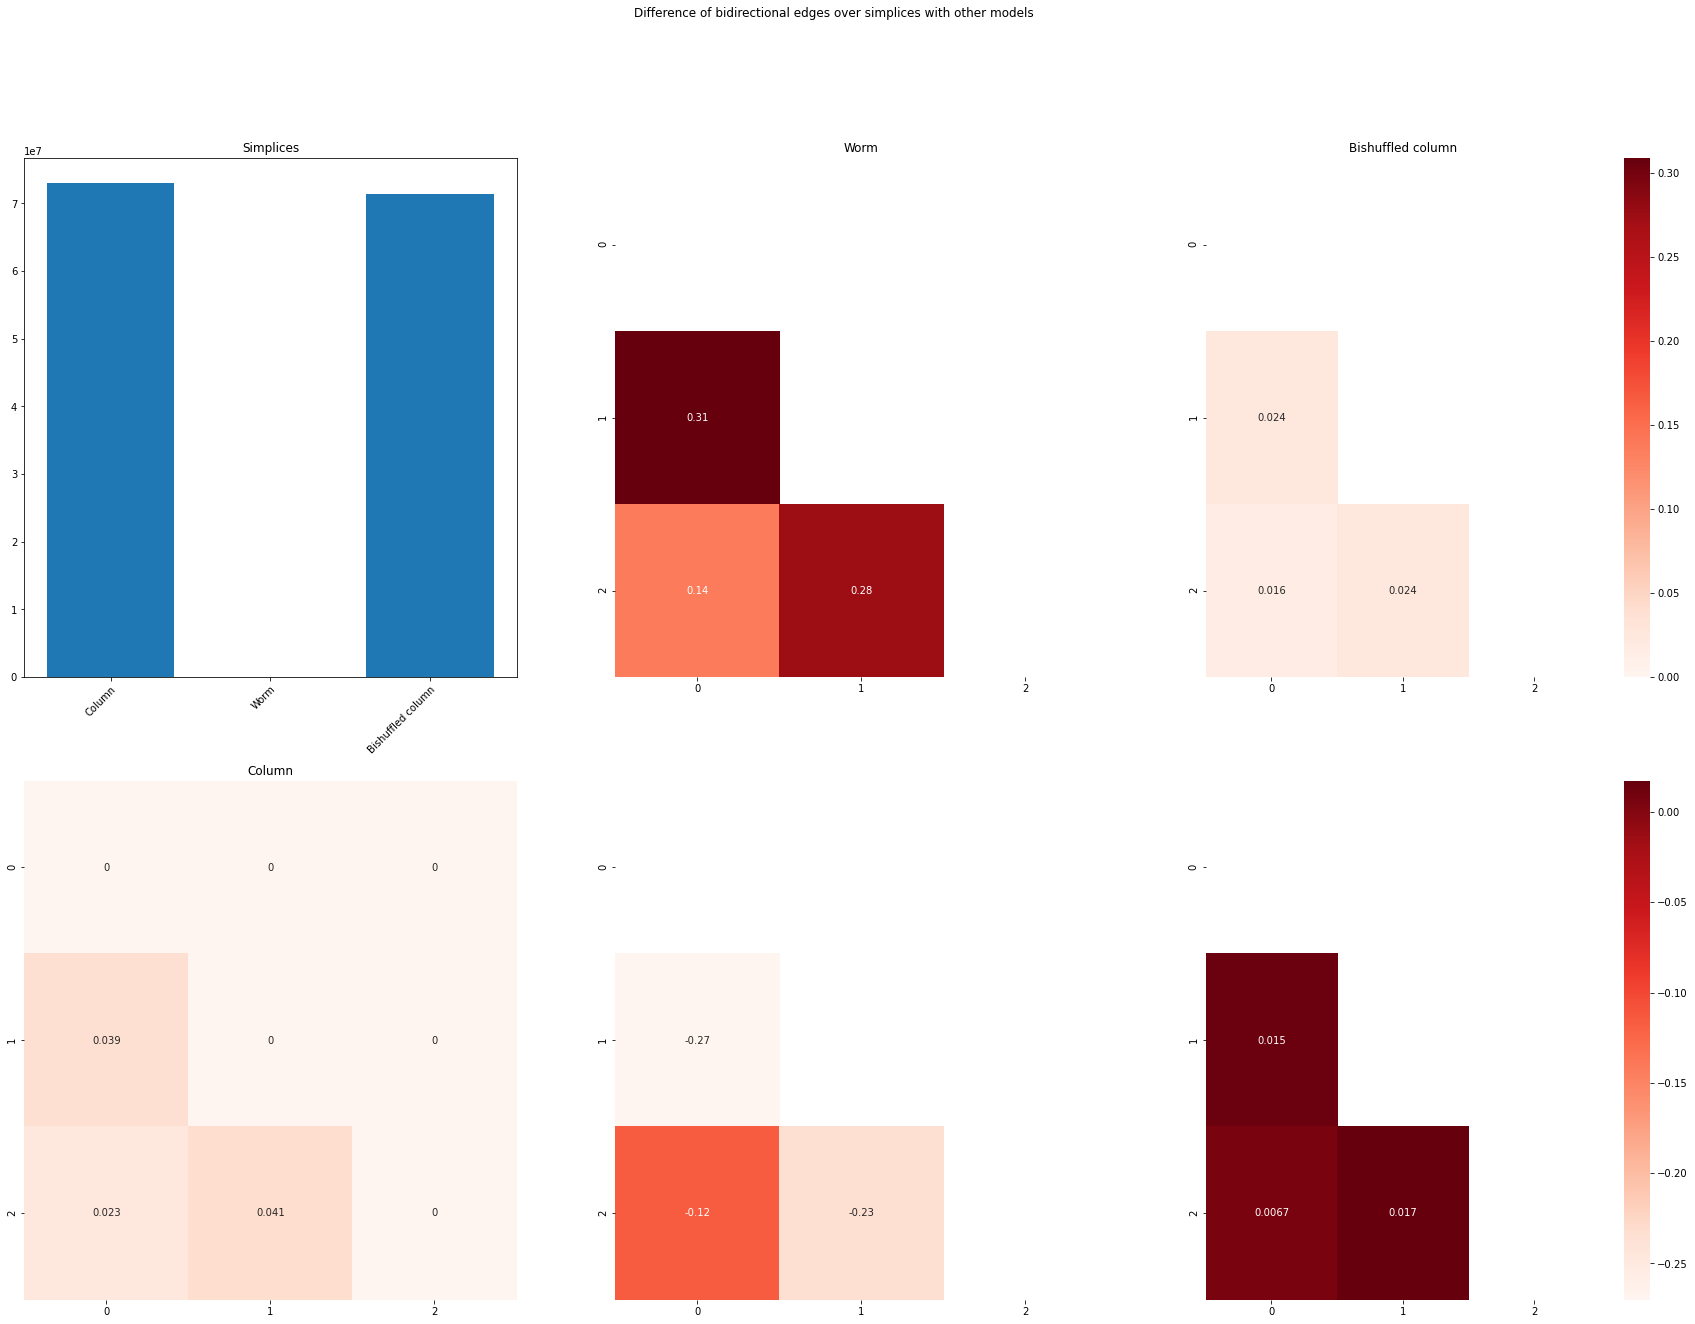

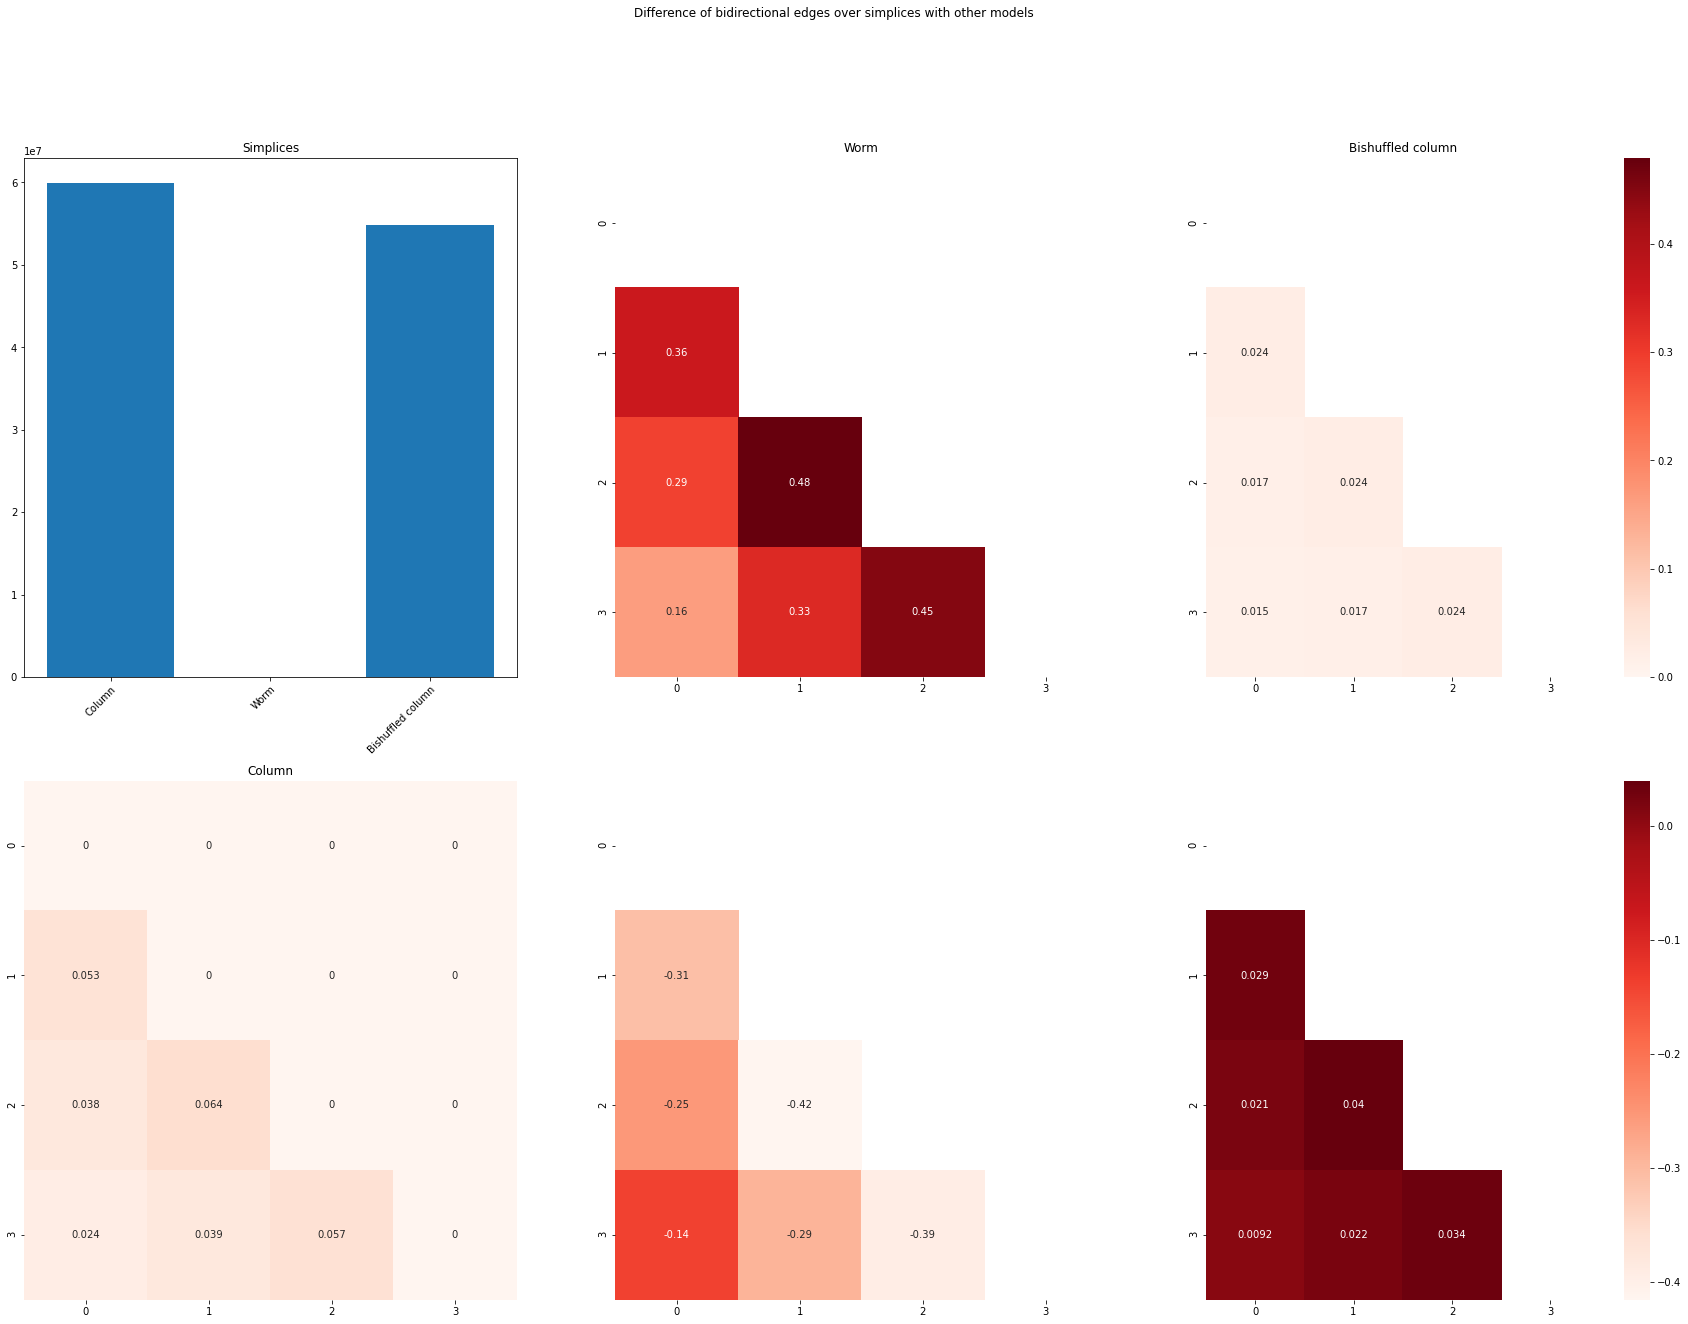

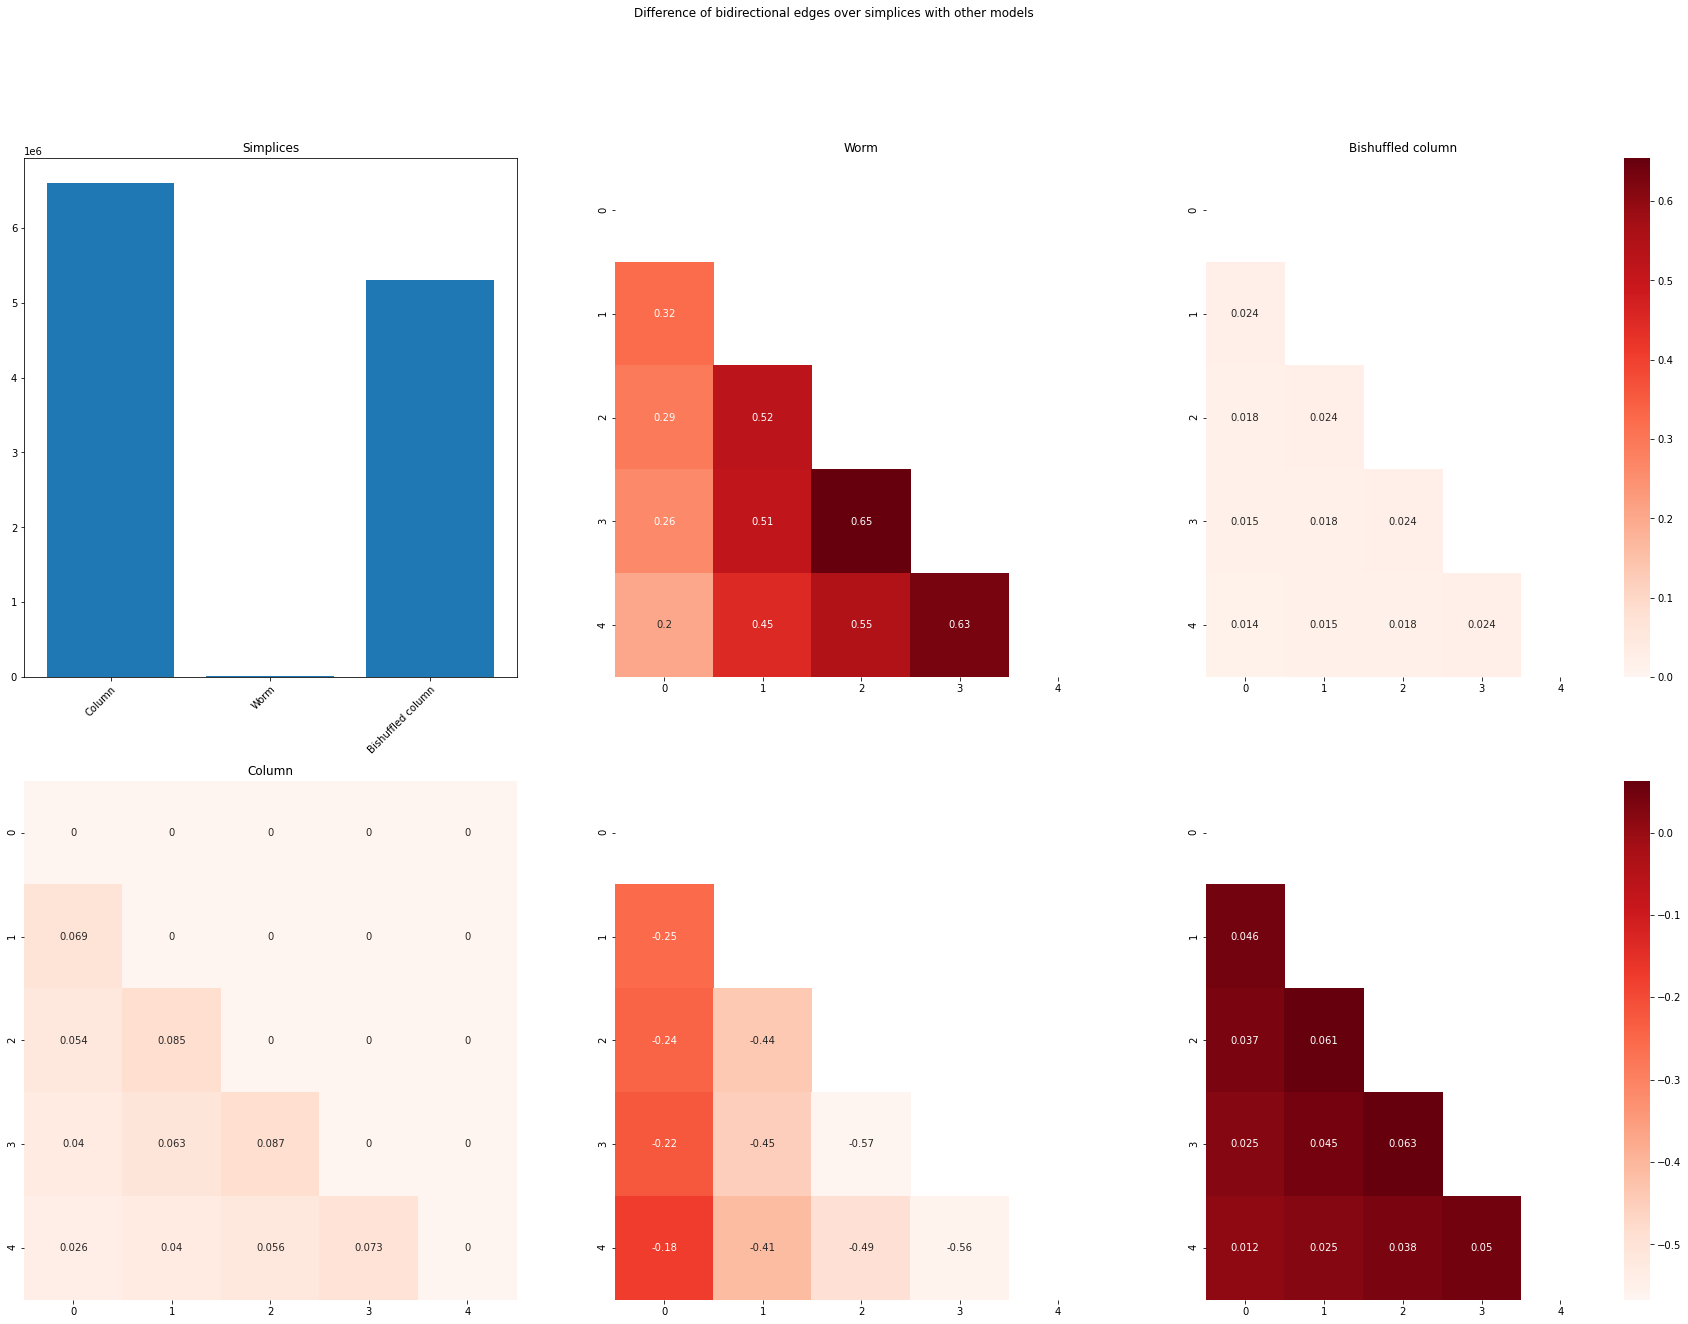

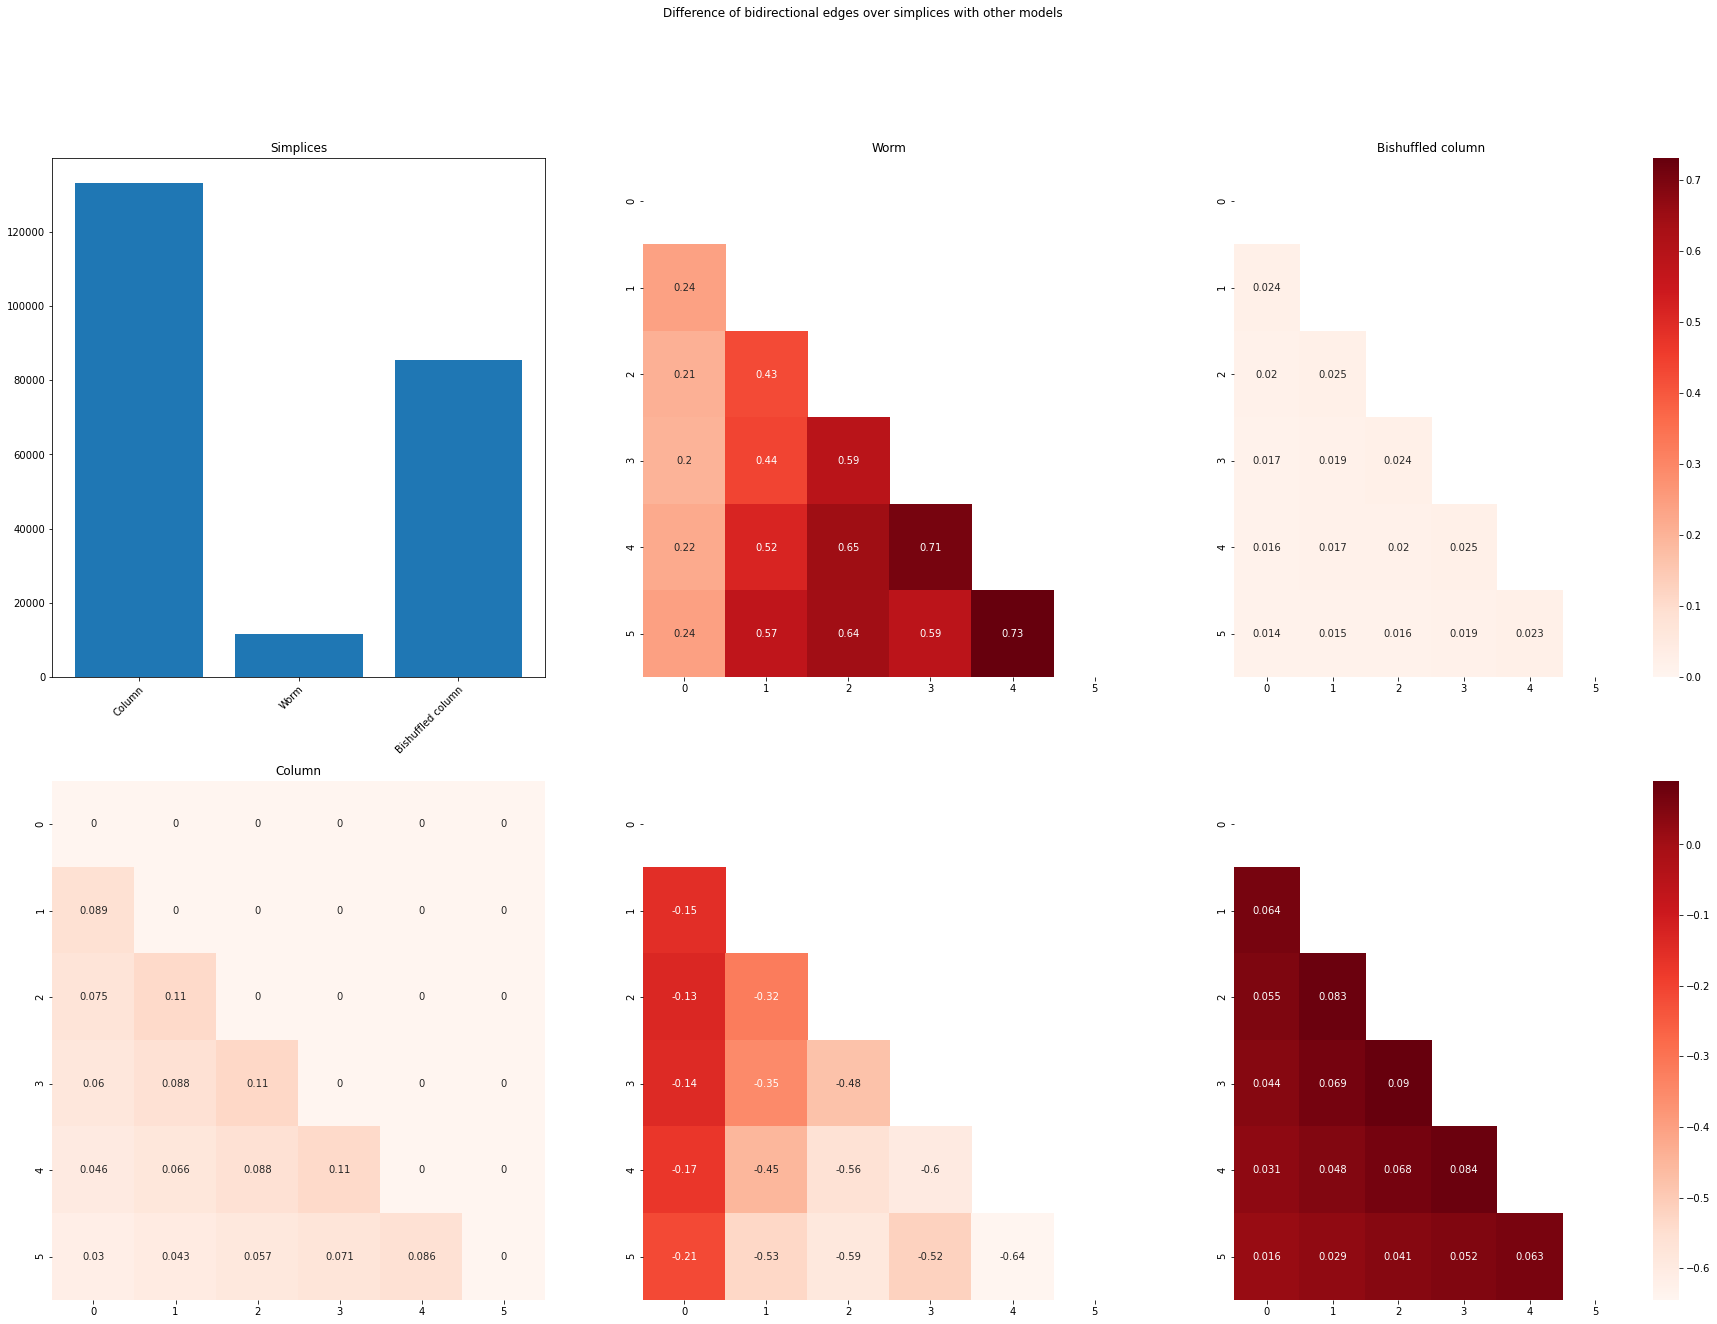

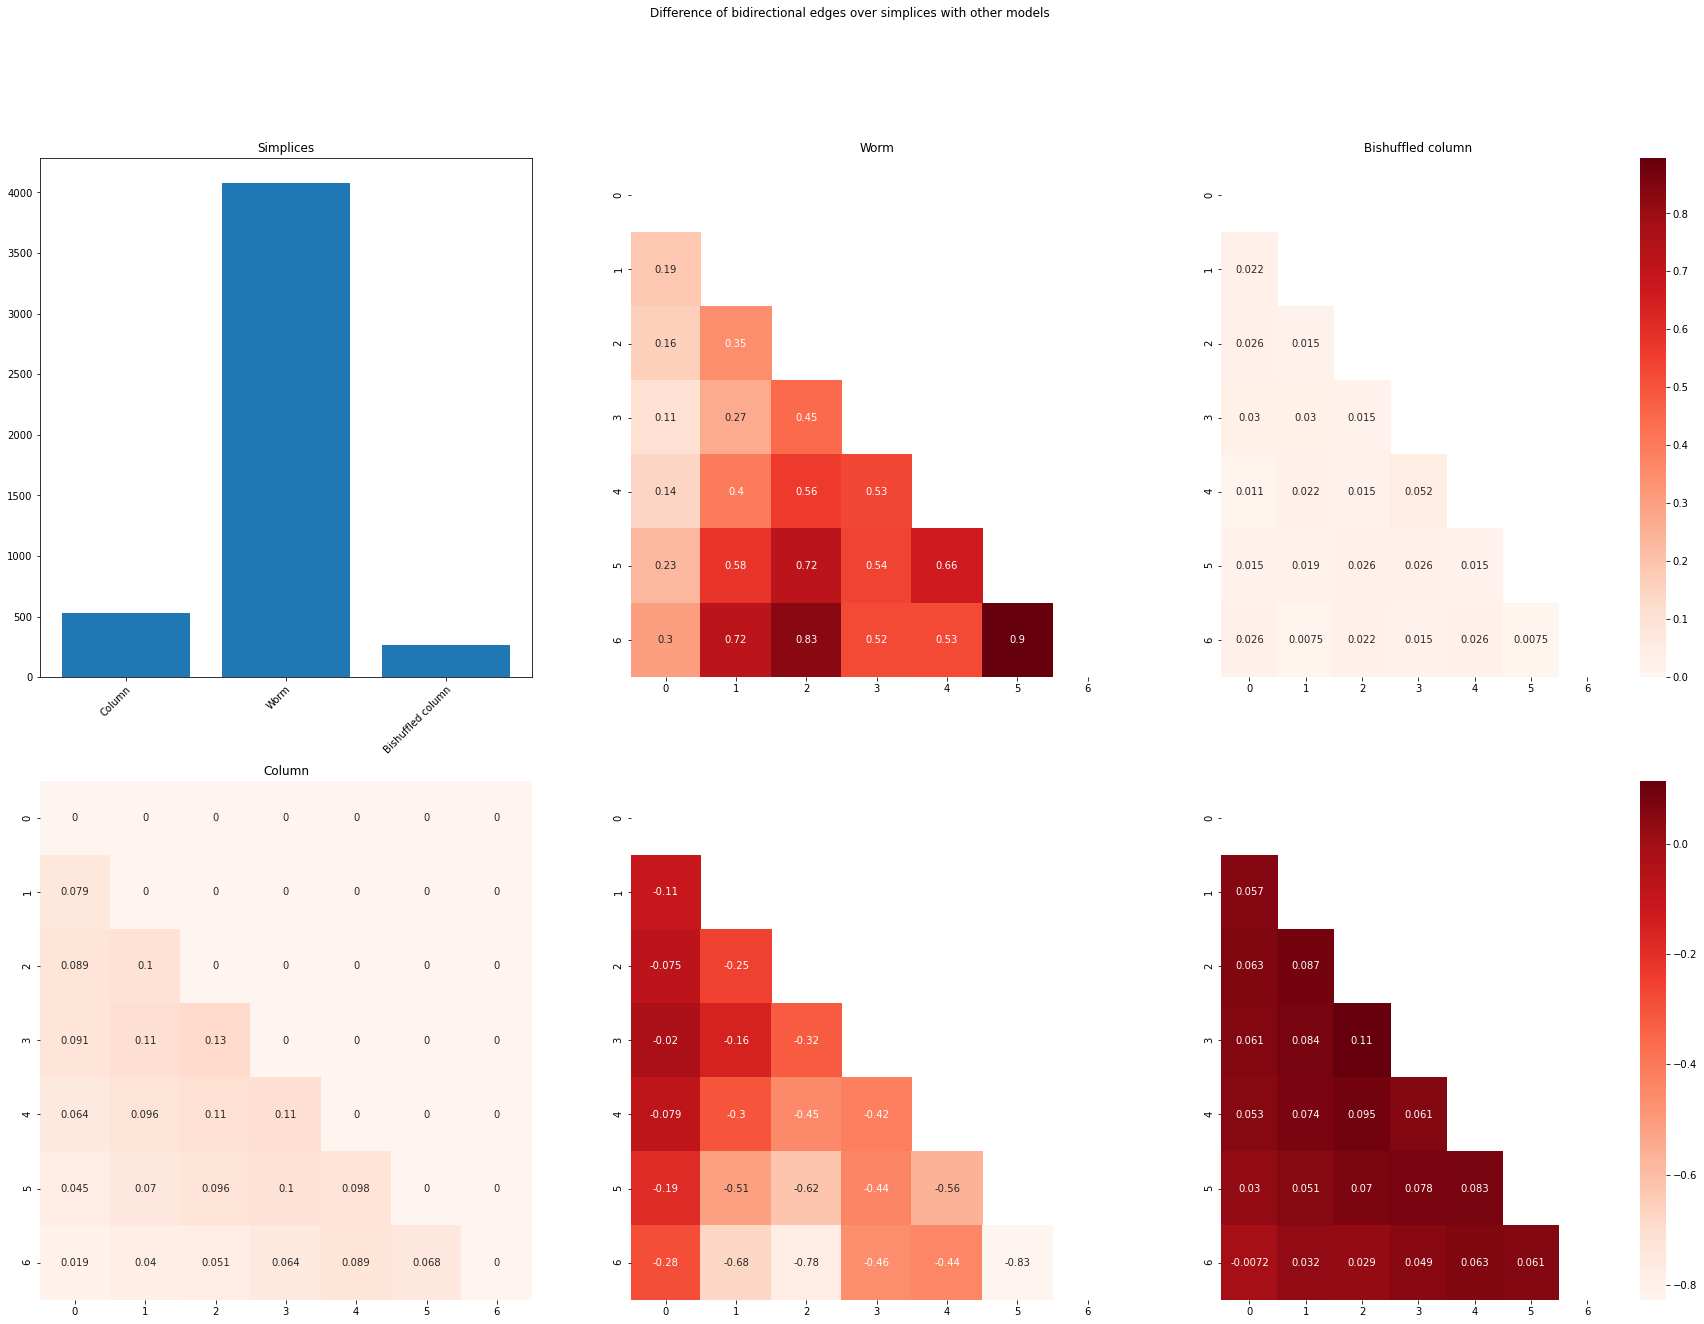

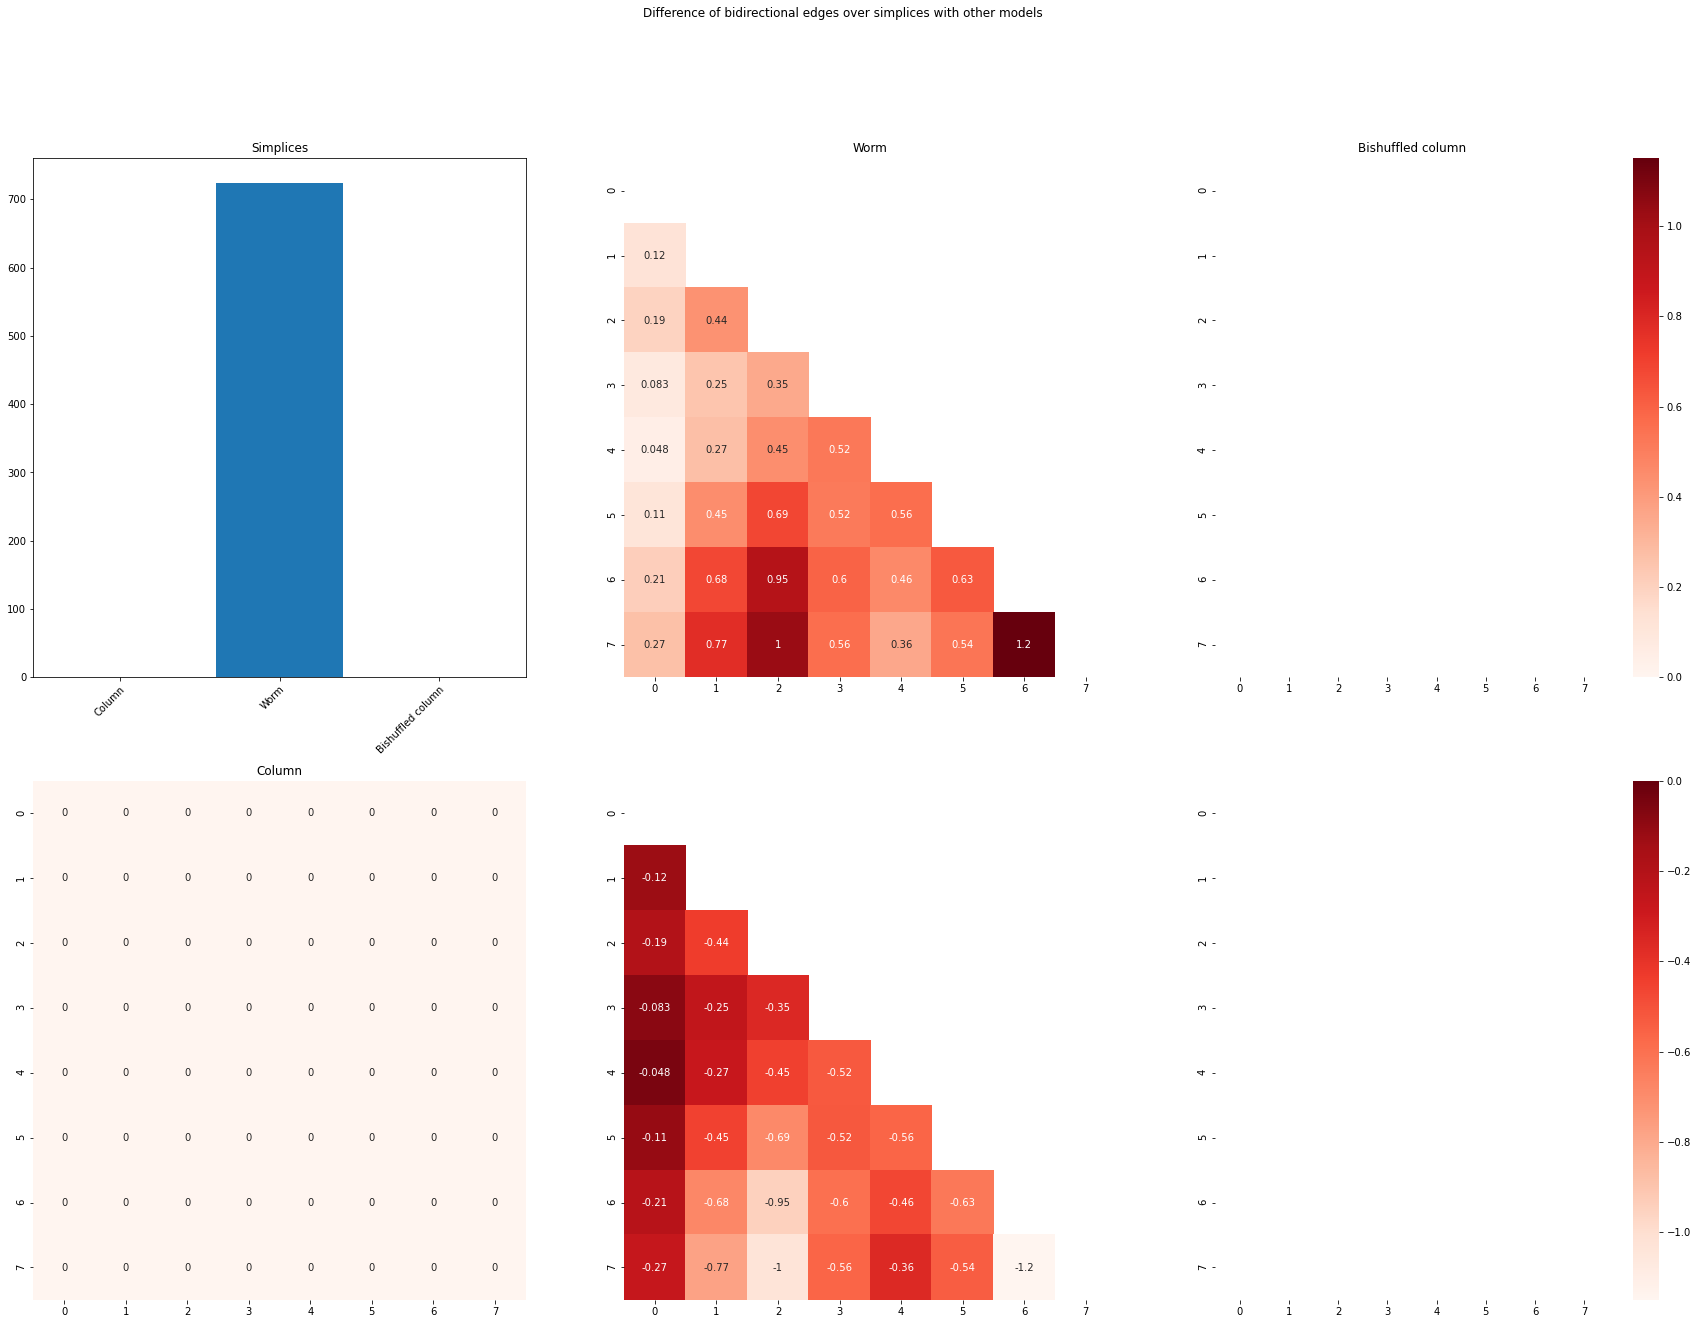

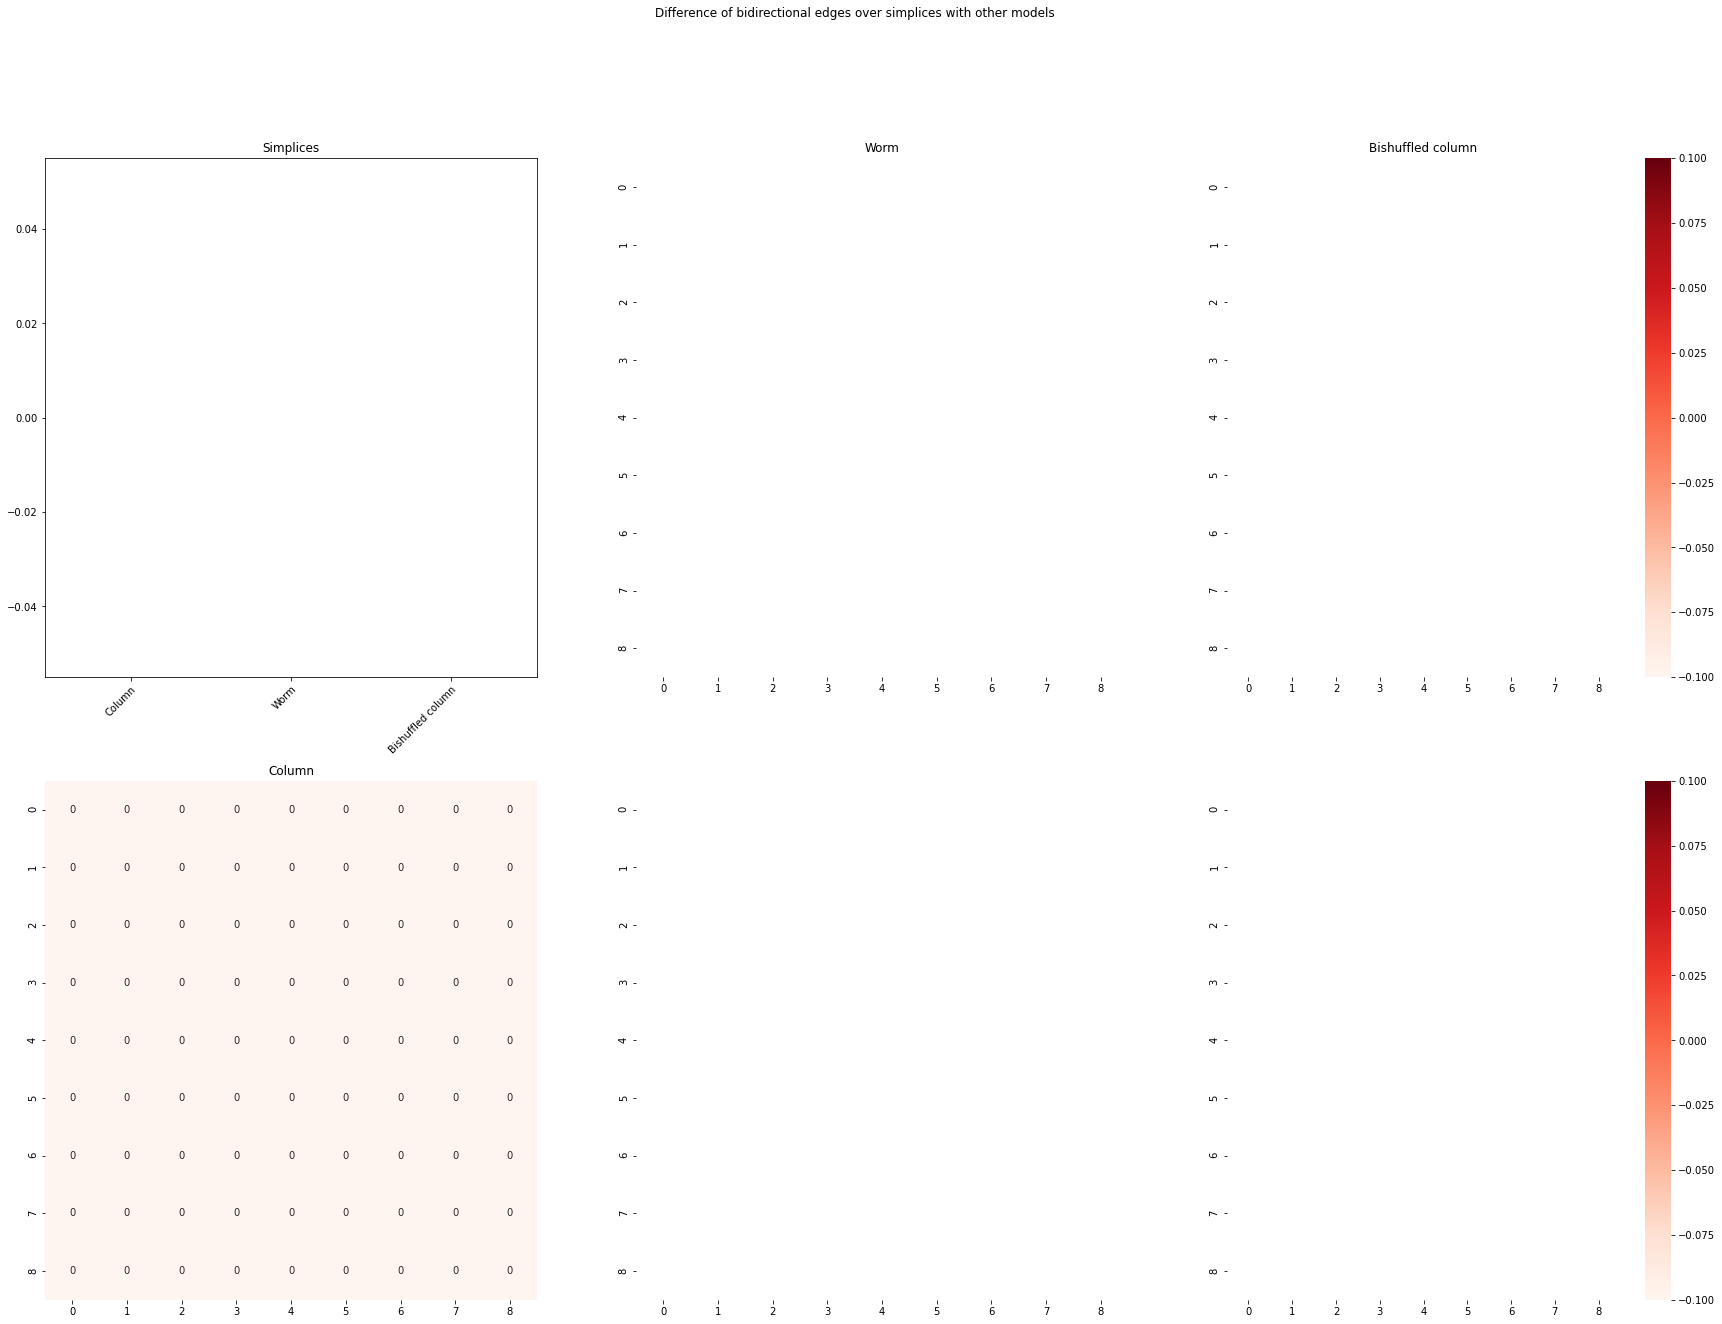

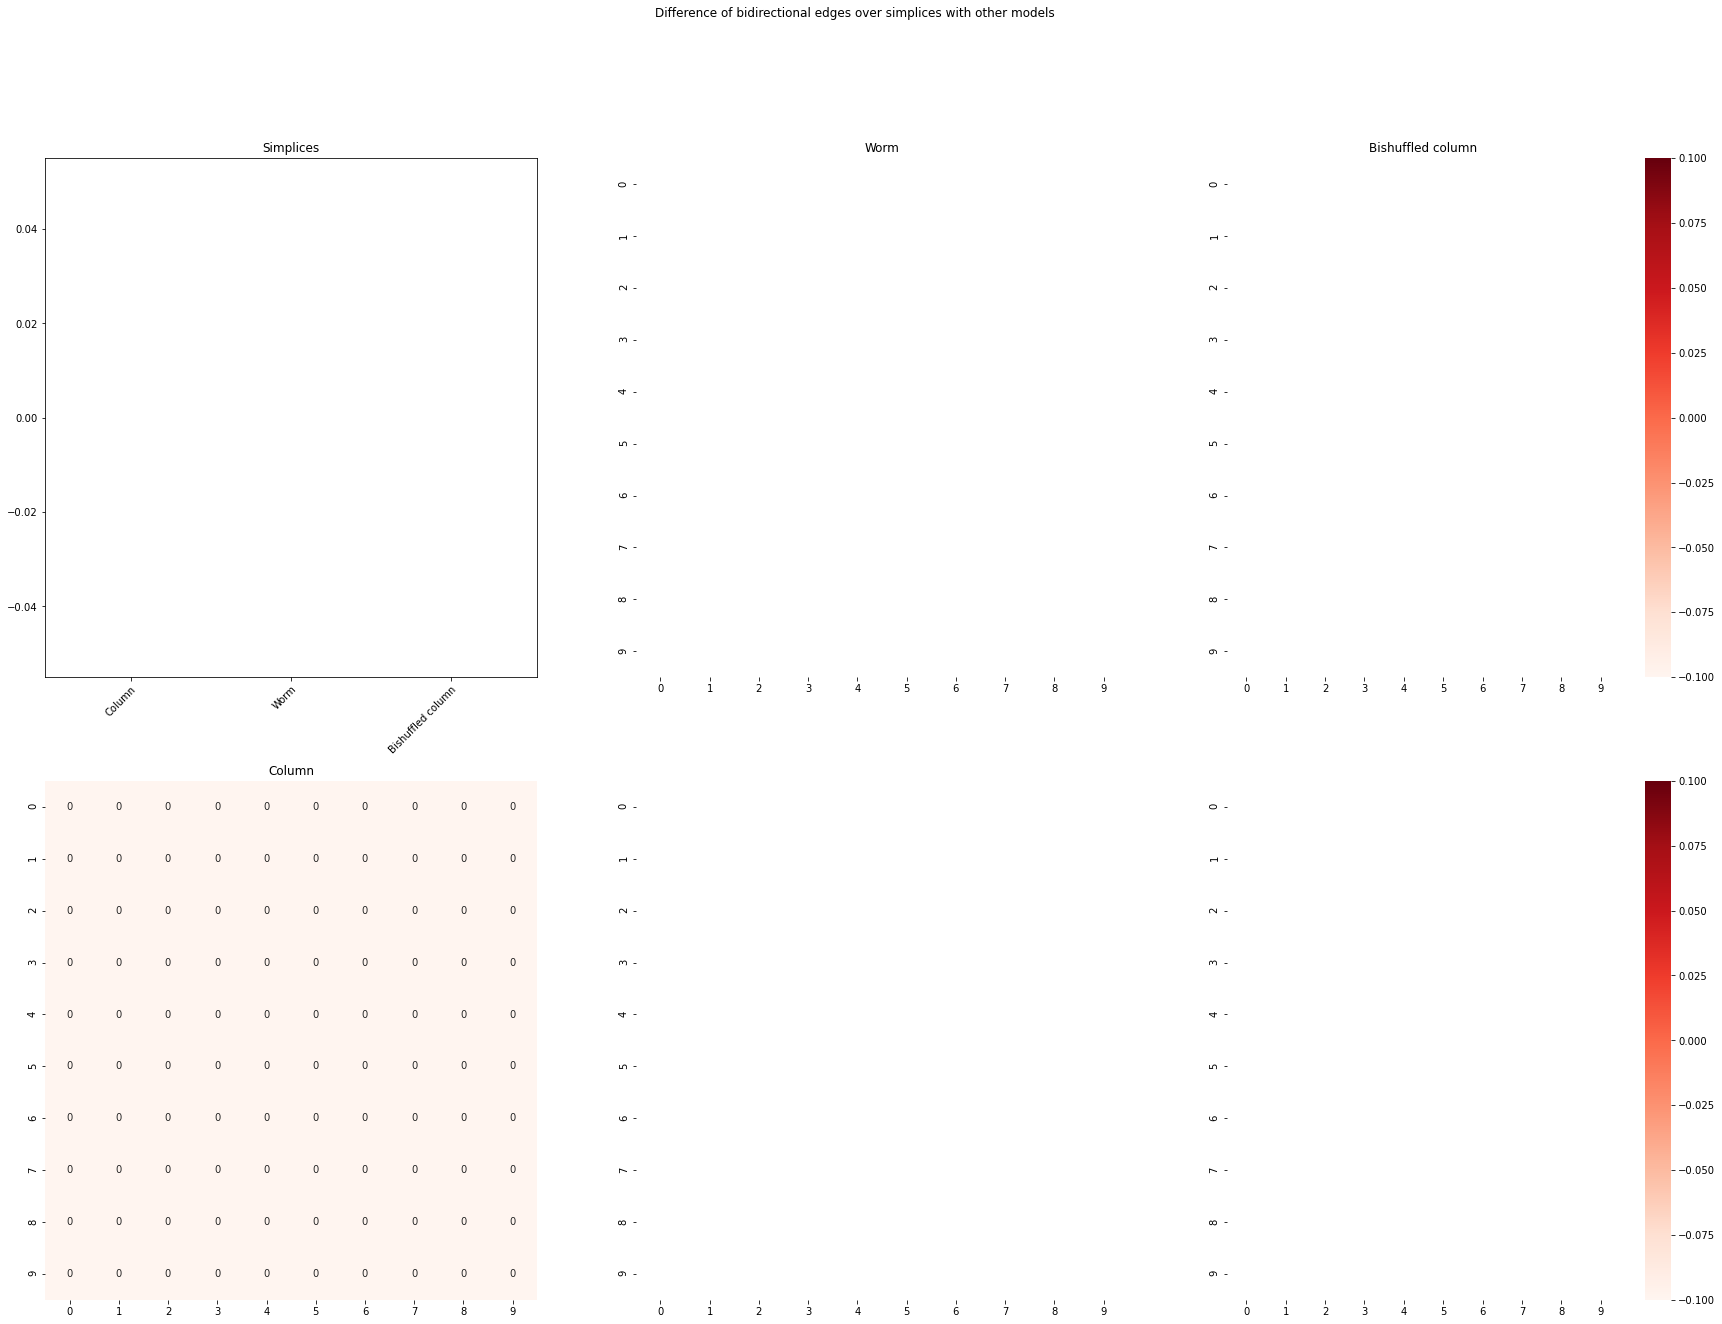

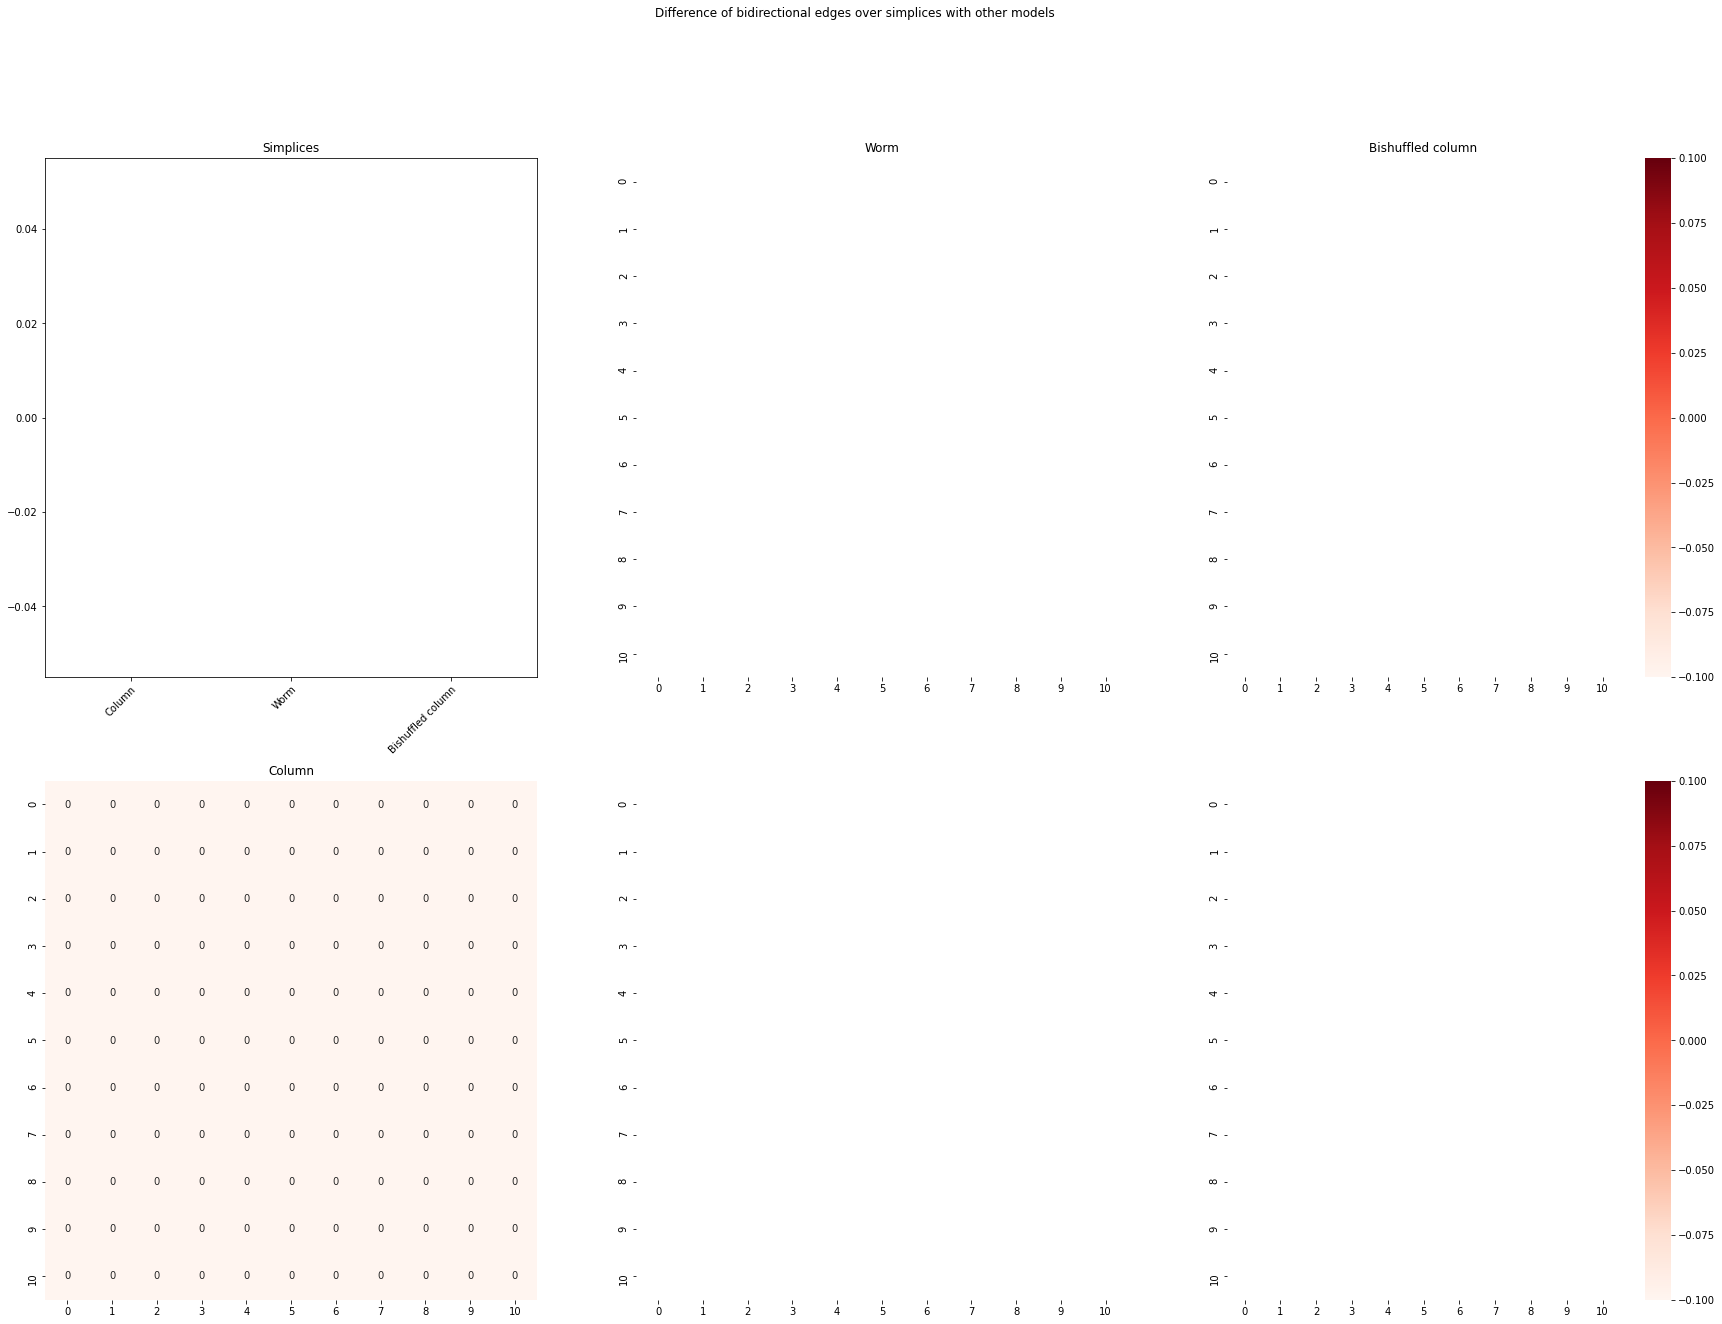

In [22]:
compare_graphs_diff_normalized([a,b,c], 1, "worm_difference_normalized", title_list = ["Simplices","Column", "Worm", "Bishuffled column"])